In [1]:
import sys
#sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot4/lib/python3.7/site-packages')
sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages')
print ( sys.path )

import numpy as np
import pandas as pd
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
from joblib import dump, load
# plt.style.use(mplhep.style.CMS)
import matplotlib.font_manager
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 18,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )
# mpl.rcParams.update(
#     {'font.size': 18,
#      'font.family': 'sans-serif',
#      'font.sans-serif': ['Helvetica'],
#      'legend.fontsize': 14,
#      'axes.labelsize': 18,
#      'xtick.labelsize': 14,
#      'ytick.labelsize': 14
#     }
#     )
print ( matplotlib.font_manager._fmcache )
mpl.rcParams

['/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/python', '/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib', '', '/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python38.zip', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python3.8', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python3.8/lib-dynload', '/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/IPython/extensions', '/scratch/antoniov/.ipython']
/tmp/antoniov/.cache/matplotlib/fontlist-v330.json


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [2]:
# run_ranges_periods, df_run_ranges, fiducial_cuts, fiducial_cuts_all, aperture_period_map, aperture_parametrisation, check_aperture, get_data, process_data_protons_multiRP
from processing import *

save_figures = False

# test_sample_ratio = 0.40

# run_tables = False

Welcome to JupyROOT 6.24/00
{'2017B': 2.360904801, '2017C1': 5.313012839, '2017C2': 3.264135878, '2017D': 4.074723964, '2017E': 8.958810514, '2017F1': 1.708478656, '2017F2': 7.877903151, '2017F3': 3.632463163}
Luminosity: 37.190432966


### Event selection

In [3]:
def select_events( df_events, label_jet=None, label_muon=None ):
#     label_jet_ = "_nom"
#     label_muon_ = "_nom"
#     label_WLep_ = "_nom"
#     label_WW_ = "_nom"
    label_jet_ = "_nom"
    if label_jet is not None: label_jet_ = label_jet
    label_muon_ = "_nom"
    if label_muon is not None: label_muon_ = label_muon
    label_WLep_ = "_nom"
    if label_muon is not None:
        label_WLep_ = label_muon
    label_WW_ = "_nom"
    if label_jet is not None:
        label_WW_ = label_jet
    elif label_muon is not None:
        label_WW_ = label_muon
    label_xiCMS_ = "_nom"
    if label_jet is not None:
        label_xiCMS_ = label_jet
    elif label_muon is not None:
        label_xiCMS_ = label_muon
        
    deltaPhi_jet_muon_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "muon0_phi"] )
    msk_dphi_ = ( deltaPhi_jet_muon_ < -np.pi )
    deltaPhi_jet_muon_.loc[ msk_dphi_ ] = deltaPhi_jet_muon_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_muon_ >= np.pi )
    deltaPhi_jet_muon_.loc[ msk_dphi_ ] = deltaPhi_jet_muon_.loc[ msk_dphi_ ] - 2*np.pi
    
    deltaEta_jet_muon_ = ( df_events.loc[ :, "jet0_eta"] - df_events.loc[ :, "muon0_eta"] )
    deltaR_jet_muon_ = np.sqrt( ( deltaPhi_jet_muon_ ) ** 2 + ( deltaEta_jet_muon_ ) ** 2 )
    
    deltaPhi_jet_met_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "met_phi"] )
    msk_dphi_ = ( deltaPhi_jet_met_ < -np.pi )
    deltaPhi_jet_met_.loc[ msk_dphi_ ] = deltaPhi_jet_met_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_met_ >= np.pi )
    deltaPhi_jet_met_.loc[ msk_dphi_ ] = deltaPhi_jet_met_.loc[ msk_dphi_ ] - 2*np.pi
    
    deltaPhi_jet_Wlep_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "WLeptonicPhi"] )
    msk_dphi_ = ( deltaPhi_jet_Wlep_ < -np.pi )
    deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] = deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_Wlep_ >= np.pi )
    deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] = deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] - 2*np.pi

    jet0_tau21_ = ( df_events.loc[ :, "jet0_tau2"] / df_events.loc[ :, "jet0_tau1"] )

    msk_All_ = np.full( df_events.shape[0], True, dtype=bool )
    msk_muon_ = ( ( df_events.loc[ :, "muon0_pt" + label_muon_ ] >= 50.0 ) &
                  ( np.abs( df_events.loc[ :, "muon0_eta"] ) <= 2.4 ) & 
                  ( df_events.loc[ :, "muon0_iso"] <= 0.10 ) )
#     msk_jet_ = ( ( df_events.loc[ :, "jet0_pt" + label_jet_] >= 200.0 ) &
#                  ( np.abs( df_events.loc[ :, "jet0_eta"] ) <= 2.4 ) )
    msk_jet_ = ( ( df_events.loc[ :, "jet0_pt" + label_jet_] >= 220.0 ) &
                 ( np.abs( df_events.loc[ :, "jet0_eta"] ) <= 2.4 ) )
    msk_jet_muon_ = ( deltaR_jet_muon_ >= np.pi/2 )
    msk_met_ = ( df_events.loc[ :, "met"] >= 40.0 )
    msk_jet_met_ = ( np.abs( deltaPhi_jet_met_ ) >= 2.0 )
    msk_pruned_mass_ = ( ( df_events.loc[ :, "jet0_corrmass" + label_jet_] >= 50.0 ) &
                         ( df_events.loc[ :, "jet0_corrmass" + label_jet_] <= 110.0 ) )
    msk_tau21_       = ( jet0_tau21_ <= 0.60 )
    msk_bjet_veto_   = ( df_events.loc[ :, "num_bjets_ak4"] == 0 )
#     msk_xiCMS_ = msk_All_.copy()
    msk_xiCMS_       = ( ( df_events.loc[ :, "xiCMS_45" + label_xiCMS_ ] <= 0.20 ) & ( df_events.loc[ :, "xiCMS_56" + label_xiCMS_ ] <= 0.20 ) )
    msk_Wlep_ = ( df_events.loc[ :, "WLeptonicPt" + label_WLep_ ] >= 200.0 )
    msk_jet_Wlep_ = ( np.abs( deltaPhi_jet_Wlep_ ) >= 2.5 )
#     msk_MWW_ = ( df_events.loc[ :, "recoMWW"] >= 500.0 )
    msk_MWW_ = ( df_events.loc[ :, "MWW" + label_WW_ ] >= 500.0 )
    msk_extra_tracks_ = ( df_events.loc[ :, "pfcand_nextracks" ] <= 4 )
#     msk_extra_tracks_ = ( df_events.loc[ :, "pfcand_nextracks" ] <= 999 )
    
    masks_ = [ msk_All_, msk_muon_, msk_jet_, msk_jet_muon_, msk_met_, msk_jet_met_,
               msk_pruned_mass_, msk_tau21_, msk_bjet_veto_, msk_xiCMS_,
               msk_Wlep_, msk_jet_Wlep_, msk_MWW_, msk_extra_tracks_ ]
    selection_keys_ = [ "All", "Muon", "Jet", "Jet_Muon", "MET", "Jet_MET",
                        "PrunedMass", "Tau21", "BJet_Veto", "Xi_CMS",
                        "WLeptonic", "Jet_WLeptonic", "MWW", "ExtraTracks" ]
    selections_ = {}
    msk_ = masks_[ 0 ].copy()
    for idx_, key_ in enumerate( selection_keys_ ):
        msk_ = msk_ & masks_[ idx_ ]
        selections_[ key_ ] = np.sum( msk_ )
        
    df_events = df_events.loc[ msk_ ]
    
    return df_events, selection_keys_, selections_

### Signal

In [4]:
# run_tables = False

# #label = "GGToWW-AQGC-test-A0W1e-6"
# #label = "GGToWW-AQGC-test-A0W2e-6"
# #label = "GGToWW-AQGC-test-A0W5e-6"
# labels_signals = [ "GGToWW-AQGC-A0W1e-6", "GGToWW-AQGC-A0W2e-6", "GGToWW-AQGC-A0W5e-6" ]

# # fileNames_signal = [
# #     #"output-GGToWW-AQGC-test-A0W1e-6.h5"
# #     #"output-GGToWW-AQGC-test-A0W2e-6.h5"
# #     "output-GGToWW-AQGC-test-A0W5e-6.h5"
# # ]
# fileNames_signals = {
#     "GGToWW-AQGC-A0W1e-6": [ "output-GGToWW-AQGC-A0W1e-6.h5" ],
#     "GGToWW-AQGC-A0W2e-6": [ "output-GGToWW-AQGC-A0W2e-6.h5" ],
#     "GGToWW-AQGC-A0W5e-6": [ "output-GGToWW-AQGC-A0W5e-6.h5" ]
#     }

# df_counts_signals = {}
# df_signals_protons_multiRP_index = {}
# df_signals_protons_multiRP_events = {}

# for label_ in labels_signals:
#     import time
#     print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
#     time_s_ = time.time()

#     #df_counts_signal, df_protons_multiRP_signal, df_protons_singleRP_signal, df_ppstracks_signal = 4 * [None]
#     #df_protons_multiRP_signal_index, df_protons_multiRP_signal_events, df_ppstracks_signal_index = 3 * [None]

#     if run_tables:
#         with pd.HDFStore( "reduced-data-store-{}.h5".format( label_ ), complevel=5 ) as store_:

#             df_counts_signal_, df_protons_multiRP_signal_, df_protons_singleRP_signal_, df_ppstracks_signal_ = get_data( fileNames_signals[ label_ ] )
#             df_protons_multiRP_signal_index_, df_protons_multiRP_signal_events_, df_ppstracks_signal_index_ = process_data_protons_multiRP( df_protons_multiRP_signal_, df_ppstracks_signal_, apply_fiducial=True, within_aperture=True, select_2protons=False, runOnMC=True )

#             store_[ "counts" ] = df_counts_signal_
#             store_[ "protons_multiRP"] = df_protons_multiRP_signal_index_
#             store_[ "events_multiRP" ] = df_protons_multiRP_signal_events_
    
#     with pd.HDFStore( "reduced-data-store-{}.h5".format( label_ ), 'r' ) as store_:
#         df_counts_signals[ label_ ] = store_[ "counts" ]
#         df_signals_protons_multiRP_index[ label_ ] = store_[ "protons_multiRP" ]
#         df_signals_protons_multiRP_events[ label_ ] = store_[ "events_multiRP" ]

#     time_e_ = time.time()
#     print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

In [5]:
load_signal = False

labels_signals = [ "GGToWW-AQGC-A0W1e-6", "GGToWW-AQGC-A0W2e-6", "GGToWW-AQGC-A0W5e-6" ]
df_counts_signals = {}
df_signals_protons_multiRP_index = {}
df_signals_protons_multiRP_events = {}
if load_signal:
    base_path_ = "output"
    for label_ in labels_signals:
        print ( label_ )
        file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )
            df_counts_signals[ label_ ] = store_[ "counts" ]
            df_signals_protons_multiRP_index[ label_ ] = store_[ "protons_multiRP" ]
            df_signals_protons_multiRP_events[ label_ ] = store_[ "events_multiRP" ]

In [6]:
# label_ = "GGToWW-AQGC-A0W1e-6"
# columns_protons_multiRP =  df_signals_protons_multiRP_index[ label_ ].columns.values
# print ( columns_protons_multiRP )
# # df_signals_protons_multiRP_index[ label_ ]
# df_signals_protons_multiRP_index[ label_ ][ [ 'run_mc', 'crossingAngle', 'period', 'within_aperture' ] ]

In [7]:
labels_samples = {
    "GGToWW-AQGC-A0W1e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 1 \times 10^{-6} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W2e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 2 \times 10^{-6} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W5e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 5 \times 10^{-6} \,\rm{GeV}^{-2}$"
}

if load_signal:
    fig = plt.figure( figsize=(12,10) )
    for label_ in labels_signals: 
        plt.hist( df_signals_protons_multiRP_index[ label_ ][ 'xi' ], histtype='step', density=False, bins=50, label=labels_samples[ label_ ] )
    plt.legend( loc='best', fontsize=14 )

### Ouf of acceptance protons

In [8]:
# df_signals_protons_multiRP_index_2protons = {}
# df_signals_protons_multiRP_index_1proton_Arm0 = {}
# df_signals_protons_multiRP_index_1proton_Arm1 = {}
# for label_ in labels_signals:
#     print ( label_ )
#     df_protons_multiRP_groupby_arm_ = df_signals_protons_multiRP_index[ label_ ][ [ "arm" ] ].groupby( ["run","lumiblock","event","slice"] )
#     msk_2protons_ = df_protons_multiRP_groupby_arm_[ "arm" ].transform( lambda s_: ( np.sum( s_ == 0 ) >= 1 ) & ( np.sum( s_ == 1 ) >= 1 ) )
#     msk_1proton_Arm0_ = df_protons_multiRP_groupby_arm_[ "arm" ].transform( lambda s_: ( np.sum( s_ == 0 ) >= 1 ) & ( np.sum( s_ == 1 ) == 0 ) )
#     msk_1proton_Arm1_ = df_protons_multiRP_groupby_arm_[ "arm" ].transform( lambda s_: ( np.sum( s_ == 0 ) == 0 ) & ( np.sum( s_ == 1 ) >= 1 ) )
#     print ( msk_2protons_ )
#     print ( msk_1proton_Arm0_ )
#     print ( msk_1proton_Arm1_ )
#     df_signals_protons_multiRP_index_2protons[ label_ ] = df_signals_protons_multiRP_index[ label_ ].loc[ msk_2protons_ ]
#     df_signals_protons_multiRP_index_1proton_Arm0[ label_ ] = df_signals_protons_multiRP_index[ label_ ].loc[ msk_1proton_Arm0_ ]
#     df_signals_protons_multiRP_index_1proton_Arm1[ label_ ] = df_signals_protons_multiRP_index[ label_ ].loc[ msk_1proton_Arm1_ ]

In [9]:
# label_ = "GGToWW-AQGC-A0W1e-6"
# df_signals_protons_multiRP_index_2protons[ label_ ]

In [10]:
# df_signals_protons_multiRP_index_1proton_Arm0[ label_ ]

In [11]:
# df_signals_protons_multiRP_index_1proton_Arm1[ label_ ]

In [12]:
# df_signals_protons_multiRP_index_ = df_signals_protons_multiRP_index_2protons
# # df_signals_protons_multiRP_index_ = df_signals_protons_multiRP_index_1proton_Arm0
# # df_signals_protons_multiRP_index_ = df_signals_protons_multiRP_index_1proton_Arm1
# fig = plt.figure( figsize=(12,10) )
# for label_ in labels_signals: 
#     plt.hist( df_signals_protons_multiRP_index_[ label_ ][ 'xi' ], histtype='step', density=False, bins=50, label=labels_samples[ label_ ] )
# plt.legend( loc='best', fontsize=16 )

### Signal with mixed protons

In [13]:
# run_tables = False

# # labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-A0W1e-6" ]
# labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-A0W1e-6", "GGToWW-AQGC-mix_protons-A0W2e-6", "GGToWW-AQGC-mix_protons-A0W5e-6" ]

# fileNames_signals = {
#     "GGToWW-AQGC-mix_protons-A0W1e-6": [ "output-GGToWW-AQGC-mix_protons-A0W1e-6.h5" ],
#     "GGToWW-AQGC-mix_protons-A0W2e-6": [ "output-GGToWW-AQGC-mix_protons-A0W2e-6.h5" ],
#     "GGToWW-AQGC-mix_protons-A0W5e-6": [ "output-GGToWW-AQGC-mix_protons-A0W5e-6.h5" ]
#     }

# df_counts_signals_mix_protons = {}
# df_signals_protons_multiRP_mix_protons_index = {}
# df_signals_protons_multiRP_mix_protons_events = {}

# for label_ in labels_signals_mix_protons:
#     import time
#     print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
#     time_s_ = time.time()

#     #df_counts_signal, df_protons_multiRP_signal, df_protons_singleRP_signal, df_ppstracks_signal = 4 * [None]
#     #df_protons_multiRP_signal_index, df_protons_multiRP_signal_events, df_ppstracks_signal_index = 3 * [None]

#     if run_tables:
#         with pd.HDFStore( "reduced-data-store-{}.h5".format( label_ ), complevel=5 ) as store_:

#             df_counts_signal_, df_protons_multiRP_signal_, df_protons_singleRP_signal_, df_ppstracks_signal_ = get_data( fileNames_signals[ label_ ] )
#             df_protons_multiRP_signal_index_, df_protons_multiRP_signal_events_, df_ppstracks_signal_index_ = process_data_protons_multiRP( df_protons_multiRP_signal_, df_ppstracks_signal_, apply_fiducial=True, within_aperture=True, mix_protons=True, select_2protons=False, runOnMC=True )

#             store_[ "counts" ] = df_counts_signal_
#             store_[ "protons_multiRP"] = df_protons_multiRP_signal_index_
#             store_[ "events_multiRP" ] = df_protons_multiRP_signal_events_
    
#     with pd.HDFStore( "reduced-data-store-{}.h5".format( label_ ), 'r' ) as store_:
#         df_counts_signals_mix_protons[ label_ ] = store_[ "counts" ]
#         df_signals_protons_multiRP_mix_protons_index[ label_ ] = store_[ "protons_multiRP" ]
#         df_signals_protons_multiRP_mix_protons_events[ label_ ] = store_[ "events_multiRP" ]

#     time_e_ = time.time()
#     print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

In [14]:
if load_signal:
    labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-A0W1e-6", "GGToWW-AQGC-mix_protons-A0W2e-6", "GGToWW-AQGC-mix_protons-A0W5e-6" ]
    df_counts_signals_mix_protons = {}
    df_signals_protons_multiRP_mix_protons_index = {}
    df_signals_protons_multiRP_mix_protons_events = {}
    base_path_ = "output"
    for label_ in labels_signals_mix_protons:
        print ( label_ )
        file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )
            df_counts_signals_mix_protons[ label_ ] = store_[ "counts" ]
            df_signals_protons_multiRP_mix_protons_index[ label_ ] = store_[ "protons_multiRP" ]
            df_signals_protons_multiRP_mix_protons_events[ label_ ] = store_[ "events_multiRP" ]

In [15]:
label_signal_to_mix_protons = {
     "GGToWW-AQGC-A0W1e-6" : "GGToWW-AQGC-mix_protons-A0W1e-6",
     "GGToWW-AQGC-A0W2e-6" : "GGToWW-AQGC-mix_protons-A0W2e-6",
     "GGToWW-AQGC-A0W5e-6" : "GGToWW-AQGC-mix_protons-A0W5e-6"
}

In [16]:
# label_ = "GGToWW-AQGC-A0W1e-6"
# df_signals_protons_multiRP_mix_protons_index[ label_signal_to_mix_protons[ label_ ] ]

In [17]:
# df_signals_protons_multiRP_mix_protons_events[ label_signal_to_mix_protons[ label_ ] ]

In [18]:
# label_ = "GGToWW-AQGC-A0W1e-6"
# label_mix_protons_ = "GGToWW-AQGC-mix_protons-A0W1e-6"

# df_sig_2protons_ = df_signals_protons_multiRP_index_2protons[ label_ ]
# msk_arm_ = ( df_sig_2protons_.loc[ :, "arm" ] == 0 )
# df_sig_2protons_arm0_ = df_sig_2protons_.loc[ msk_arm_ ]
# index_2protons_arm0_ = df_sig_2protons_arm0_.index
# msk_arm_ = ( df_sig_2protons_.loc[ :, "arm" ] == 1 )
# df_sig_2protons_arm1_ = df_sig_2protons_.loc[ msk_arm_ ]
# index_2protons_arm1_ = df_sig_2protons_arm1_.index

# df_sig_1proton_Arm0_ = df_signals_protons_multiRP_index_1proton_Arm0[ label_ ]
# index_1proton_Arm0_ = df_sig_1proton_Arm0_.index
# df_sig_1proton_Arm1_ = df_signals_protons_multiRP_index_1proton_Arm1[ label_ ]
# index_1proton_Arm1_ = df_sig_1proton_Arm1_.index

# df_mix_ = df_signals_protons_multiRP_mix_protons_index[ label_mix_protons_ ]
# msk_arm_ = ( df_mix_.loc[ :, "arm" ] == 0 )
# df_mix_arm0_ = df_mix_.loc[ msk_arm_ ]
# index_mix_arm0_ = df_mix_arm0_.index
# msk_arm_ = ( df_mix_.loc[ :, "arm" ] == 1 )
# df_mix_arm1_ = df_mix_.loc[ msk_arm_ ]
# index_mix_arm1_ = df_mix_arm1_.index

In [19]:
# msk_sig_1proton_Arm0_mix_arm1_ = index_1proton_Arm0_.isin( index_mix_arm1_ )
# msk_mix_arm1_sig_1proton_Arm0_ = index_mix_arm1_.isin( index_1proton_Arm0_ )
# print ( np.sum( msk_sig_1proton_Arm0_mix_arm1_ ) )
# print ( np.sum( msk_mix_arm1_sig_1proton_Arm0_)  )
# df_sig_1proton_Arm0_mix_arm1_ = df_sig_1proton_Arm0_.loc[ msk_sig_1proton_Arm0_mix_arm1_ ]
# df_mix_arm1_sig_1proton_Arm0_ = df_mix_arm1_.loc[ msk_mix_arm1_sig_1proton_Arm0_ ]
# df_1proton_Arm0_mix_Arm1_ = pd.concat( [ df_sig_1proton_Arm0_mix_arm1_, df_mix_arm1_sig_1proton_Arm0_ ] ).sort_index()

# msk_sig_1proton_Arm1_mix_arm0_ = index_1proton_Arm1_.isin( index_mix_arm0_ )
# msk_mix_arm0_sig_1proton_Arm1_ = index_mix_arm0_.isin( index_1proton_Arm1_ )
# print ( np.sum( msk_sig_1proton_Arm1_mix_arm0_ ) )
# print ( np.sum( msk_mix_arm0_sig_1proton_Arm1_)  )
# df_sig_1proton_Arm1_mix_arm0_ = df_sig_1proton_Arm1_.loc[ msk_sig_1proton_Arm1_mix_arm0_ ]
# df_mix_arm0_sig_1proton_Arm1_ = df_mix_arm0_.loc[ msk_mix_arm0_sig_1proton_Arm1_ ]
# df_1proton_Arm1_mix_Arm0_ = pd.concat( [ df_sig_1proton_Arm1_mix_arm0_, df_mix_arm0_sig_1proton_Arm1_ ] ).sort_index()

In [20]:
# msk_mix_arm0_sig_2protons_arm0_ = index_mix_arm0_.isin( index_2protons_arm0_ )
# msk_mix_arm0_sig_2protons_arm1_ = index_mix_arm0_.isin( index_2protons_arm1_ )
# msk_mix_arm1_sig_2protons_arm0_ = index_mix_arm1_.isin( index_2protons_arm0_ )
# msk_mix_arm1_sig_2protons_arm1_ = index_mix_arm1_.isin( index_2protons_arm1_ )
# print ( np.sum( msk_mix_arm0_sig_2protons_arm0_ ) )
# print ( np.sum( msk_mix_arm0_sig_2protons_arm1_ ) )
# print ( np.sum( msk_mix_arm1_sig_2protons_arm0_ ) )
# print ( np.sum( msk_mix_arm1_sig_2protons_arm1_ ) )
# msk_mix_arm0_sig_1proton_Arm0_ = index_mix_arm0_.isin( index_1proton_Arm0_ )
# msk_mix_arm1_sig_1proton_Arm1_ = index_mix_arm1_.isin( index_1proton_Arm1_ )
# print ( np.sum( msk_mix_arm0_sig_1proton_Arm0_ ) )
# print ( np.sum( msk_mix_arm0_sig_1proton_Arm1_)  )
# print ( np.sum( msk_mix_arm1_sig_1proton_Arm0_ ) )
# print ( np.sum( msk_mix_arm1_sig_1proton_Arm1_)  )
# msk_mix_arm0_sig_2protons_ = ( msk_mix_arm0_sig_2protons_arm0_ | msk_mix_arm0_sig_2protons_arm1_ )
# msk_mix_arm1_sig_2protons_ = ( msk_mix_arm1_sig_2protons_arm0_ | msk_mix_arm1_sig_2protons_arm1_)
# msk_mix_arm0_ = ( msk_mix_arm0_sig_2protons_ | msk_mix_arm0_sig_1proton_Arm0_ | msk_mix_arm0_sig_1proton_Arm1_ )
# msk_mix_arm1_ = ( msk_mix_arm1_sig_2protons_ | msk_mix_arm1_sig_1proton_Arm0_ | msk_mix_arm1_sig_1proton_Arm1_ )
# print ( np.sum( msk_mix_arm0_ ) )
# print ( np.sum( msk_mix_arm1_ ) )
# print ( np.sum( ~msk_mix_arm0_ ) )
# print ( np.sum( ~msk_mix_arm1_ ) )
# # df_mix_arm0_sig_0protons_ = df_mix_arm0_.loc[ ~msk_mix_arm0_ ]
# # df_mix_arm1_sig_0protons_ = df_mix_arm1_.loc[ ~msk_mix_arm1_ ]

In [21]:
# msk_sig_2protons_arm0_mix_arm1_ = index_2protons_arm0_.isin( index_mix_arm1_ )
# msk_sig_2protons_arm1_mix_arm1_ = index_2protons_arm1_.isin( index_mix_arm1_ )
# print ( np.sum( msk_sig_2protons_arm0_mix_arm1_ ) )
# print ( np.sum( msk_sig_2protons_arm1_mix_arm1_ ) )
# print ( np.sum( msk_mix_arm1_sig_2protons_arm0_ ) )
# msk_sig_2protons_arm1_mix_arm0_ = index_2protons_arm1_.isin( index_mix_arm0_ )
# msk_sig_2protons_arm0_mix_arm0_ = index_2protons_arm0_.isin( index_mix_arm0_ )
# print ( np.sum( msk_sig_2protons_arm1_mix_arm0_ ) )
# print ( np.sum( msk_sig_2protons_arm0_mix_arm0_ ) )
# print ( np.sum( msk_mix_arm0_sig_2protons_arm1_ ) )
# df_sig_2protons_arm0_mix_arm1_ = df_sig_2protons_arm0_.loc[ msk_sig_2protons_arm0_mix_arm1_ ]
# df_sig_2protons_arm1_mix_arm1_ = df_sig_2protons_arm1_.loc[ msk_sig_2protons_arm1_mix_arm1_ ]
# df_mix_arm1_sig_2protons_arm0_ = df_mix_arm1_.loc[ msk_mix_arm1_sig_2protons_ ]
# # df_mix_arm1_sig_2protons_arm0_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_2protons_arm1_.loc[ df_sig_2protons_arm0_mix_arm1_.index ].loc[ :, "eff_proton_all_weighted" ] )
# # df_mix_arm1_sig_2protons_arm0_.loc[ :, "eff_all_weighted" ] = df_mix_arm1_sig_2protons_arm0_.loc[ :, "eff_proton_all_weighted" ]
# df_mix_arm1_sig_2protons_arm0_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_2protons_arm1_mix_arm1_.loc[ :, "eff_proton_all_weighted" ] )
# df_mix_arm1_sig_2protons_arm0_.loc[ :, "eff_all_weighted" ] = df_mix_arm1_sig_2protons_arm0_.loc[ :, "eff_proton_all_weighted" ]
# df_2protons_Arm0_mix_Arm1_ = pd.concat( [ df_sig_2protons_arm0_mix_arm1_, df_mix_arm1_sig_2protons_arm0_ ] ).sort_index()
# df_sig_2protons_arm1_mix_arm0_ = df_sig_2protons_arm1_.loc[ msk_sig_2protons_arm1_mix_arm0_ ]
# df_sig_2protons_arm0_mix_arm0_ = df_sig_2protons_arm0_.loc[ msk_sig_2protons_arm0_mix_arm0_ ]
# df_mix_arm0_sig_2protons_arm1_ = df_mix_arm0_.loc[ msk_mix_arm0_sig_2protons_arm1_ ]
# # df_mix_arm0_sig_2protons_arm1_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_2protons_arm0_.loc[ df_sig_2protons_arm1_mix_arm0_.index ].loc[ :, "eff_proton_all_weighted" ] )
# # df_mix_arm0_sig_2protons_arm1_.loc[ :, "eff_all_weighted" ] = df_mix_arm0_sig_2protons_arm1_.loc[ :, "eff_proton_all_weighted" ]
# df_mix_arm0_sig_2protons_arm1_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_2protons_arm0_mix_arm0_.loc[ :, "eff_proton_all_weighted" ] )
# df_mix_arm0_sig_2protons_arm1_.loc[ :, "eff_all_weighted" ] = df_mix_arm0_sig_2protons_arm1_.loc[ :, "eff_proton_all_weighted" ]
# df_2protons_Arm1_mix_Arm0_ = pd.concat( [ df_sig_2protons_arm1_mix_arm0_, df_mix_arm0_sig_2protons_arm1_ ] ).sort_index()

In [22]:
# msk_mix_arm0_arm1_ = index_mix_arm0_.isin( index_mix_arm1_ )
# msk_mix_arm1_arm0_ = index_mix_arm1_.isin( index_mix_arm0_ )
# msk_sig_1proton_Arm0_mix_arm0_ = index_1proton_Arm0_.isin( index_mix_arm0_ )
# print ( np.sum( msk_mix_arm0_arm1_ ) )
# print ( np.sum( msk_mix_arm1_arm0_ ) )
# print ( np.sum( msk_sig_1proton_Arm0_mix_arm0_ ) )
# print ( np.sum( msk_sig_1proton_Arm0_mix_arm0_ & msk_sig_1proton_Arm0_mix_arm1_ ) )
# print ( np.sum( msk_mix_arm0_sig_1proton_Arm0_ ) )
# print ( np.sum( msk_mix_arm0_sig_1proton_Arm0_ & msk_mix_arm0_arm1_ ) )
# print ( np.sum( msk_mix_arm1_sig_1proton_Arm0_ ) )
# print ( np.sum( msk_mix_arm1_sig_1proton_Arm0_ & msk_mix_arm1_arm0_ ) )
# df_sig_1proton_Arm0_mix_arm0_arm1_ = df_sig_1proton_Arm0_.loc[ msk_sig_1proton_Arm0_mix_arm0_ & msk_sig_1proton_Arm0_mix_arm1_ ]
# df_mix_arm0_sig_1proton_Arm0_mix_arm1_ = df_mix_arm0_.loc[ msk_mix_arm0_sig_1proton_Arm0_ & msk_mix_arm0_arm1_ ]
# df_mix_arm0_sig_1proton_Arm0_mix_arm1_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_1proton_Arm0_mix_arm0_arm1_.loc[ :, "eff_proton_all_weighted" ] )
# df_mix_arm0_sig_1proton_Arm0_mix_arm1_.loc[ :, "eff_all_weighted" ] = df_mix_arm0_sig_1proton_Arm0_mix_arm1_.loc[ :, "eff_proton_all_weighted" ]
# df_mix_arm1_sig_1proton_Arm0_mix_arm0_ = df_mix_arm1_.loc[ msk_mix_arm1_sig_1proton_Arm0_ & msk_mix_arm1_arm0_ ]
# df_mix_arm1_sig_1proton_Arm0_mix_arm0_.loc[ :, "eff_proton_all_weighted" ] = 1.0
# df_mix_arm1_sig_1proton_Arm0_mix_arm0_.loc[ :, "eff_all_weighted" ] = 1.0
# df_1proton_Arm0_mix_Arm0_Arm1_ = pd.concat( [ df_mix_arm0_sig_1proton_Arm0_mix_arm1_, df_mix_arm1_sig_1proton_Arm0_mix_arm0_ ] ).sort_index()

In [23]:
# msk_sig_1proton_Arm1_mix_arm1_ = index_1proton_Arm1_.isin( index_mix_arm1_ )
# print ( np.sum( msk_sig_1proton_Arm1_mix_arm1_ ) )
# print ( np.sum( msk_sig_1proton_Arm1_mix_arm1_ & msk_sig_1proton_Arm1_mix_arm0_ ) )
# print ( np.sum( msk_mix_arm0_sig_1proton_Arm1_ ) )
# print ( np.sum( msk_mix_arm0_sig_1proton_Arm1_ & msk_mix_arm0_arm1_ ) )
# print ( np.sum( msk_mix_arm1_sig_1proton_Arm1_ ) )
# print ( np.sum( msk_mix_arm1_sig_1proton_Arm1_ & msk_mix_arm1_arm0_ ) )
# df_sig_1proton_Arm1_mix_arm1_arm0_ = df_sig_1proton_Arm1_.loc[ msk_sig_1proton_Arm1_mix_arm1_ & msk_sig_1proton_Arm1_mix_arm0_ ]
# df_mix_arm0_sig_1proton_Arm1_mix_arm1_ = df_mix_arm0_.loc[ msk_mix_arm0_sig_1proton_Arm1_ & msk_mix_arm0_arm1_ ]
# df_mix_arm0_sig_1proton_Arm1_mix_arm1_.loc[ :, "eff_proton_all_weighted" ] = 1.0
# df_mix_arm0_sig_1proton_Arm1_mix_arm1_.loc[ :, "eff_all_weighted" ] = 1.0
# df_mix_arm1_sig_1proton_Arm1_mix_arm0_ = df_mix_arm1_.loc[ msk_mix_arm1_sig_1proton_Arm1_ & msk_mix_arm1_arm0_ ]
# df_mix_arm1_sig_1proton_Arm1_mix_arm0_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_1proton_Arm1_mix_arm1_arm0_.loc[ :, "eff_proton_all_weighted" ] )
# df_mix_arm1_sig_1proton_Arm1_mix_arm0_.loc[ :, "eff_all_weighted" ] = df_mix_arm1_sig_1proton_Arm1_mix_arm0_.loc[ :, "eff_proton_all_weighted" ]
# df_1proton_Arm1_mix_Arm1_Arm0_ = pd.concat( [ df_mix_arm0_sig_1proton_Arm1_mix_arm1_, df_mix_arm1_sig_1proton_Arm1_mix_arm0_ ] ).sort_index()

In [24]:
# print ( np.sum( msk_sig_2protons_arm0_mix_arm0_ ) )
# print ( np.sum( msk_sig_2protons_arm0_mix_arm0_ & msk_sig_2protons_arm0_mix_arm1_ ) )
# print ( np.sum( msk_sig_2protons_arm1_mix_arm1_ ) )
# print ( np.sum( msk_sig_2protons_arm1_mix_arm1_ & msk_sig_2protons_arm1_mix_arm0_ ) )
# print ( np.sum( msk_mix_arm0_sig_2protons_ ) )
# print ( np.sum( msk_mix_arm0_sig_2protons_ & msk_mix_arm0_arm1_ ) )
# print ( np.sum( msk_mix_arm1_sig_2protons_ ) )
# print ( np.sum( msk_mix_arm1_sig_2protons_ & msk_mix_arm1_arm0_ ) )
# df_sig_2protons_arm0_mix_arm0_arm1_ = df_sig_2protons_arm0_.loc[ msk_sig_2protons_arm0_mix_arm0_ & msk_sig_2protons_arm0_mix_arm1_ ]
# df_sig_2protons_arm1_mix_arm1_arm0_ = df_sig_2protons_arm1_.loc[ msk_sig_2protons_arm1_mix_arm1_ & msk_sig_2protons_arm1_mix_arm0_ ]
# df_mix_arm0_sig_2protons_mix_arm1_ = df_mix_arm0_.loc[ msk_mix_arm0_sig_2protons_ & msk_mix_arm0_arm1_ ]
# df_mix_arm0_sig_2protons_mix_arm1_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_2protons_arm0_mix_arm0_arm1_.loc[ :, "eff_proton_all_weighted" ] )
# df_mix_arm0_sig_2protons_mix_arm1_.loc[ :, "eff_all_weighted" ] = df_mix_arm0_sig_2protons_mix_arm1_.loc[ :, "eff_proton_all_weighted" ]
# df_mix_arm1_sig_2protons_mix_arm0_ = df_mix_arm1_.loc[ msk_mix_arm1_sig_2protons_ & msk_mix_arm1_arm0_ ]
# df_mix_arm1_sig_2protons_mix_arm0_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_2protons_arm1_mix_arm1_arm0_.loc[ :, "eff_proton_all_weighted" ] )
# df_mix_arm1_sig_2protons_mix_arm0_.loc[ :, "eff_all_weighted" ] = df_mix_arm1_sig_2protons_mix_arm0_.loc[ :, "eff_proton_all_weighted" ]
# df_2protons_mix_Arm0_Arm1 = pd.concat( [ df_mix_arm0_sig_2protons_mix_arm1_, df_mix_arm1_sig_2protons_mix_arm0_ ] ).sort_index()

In [25]:
# def concatenate_sig_mix( label_, label_mix_protons_ ):
#     df_sig_2protons_ = df_signals_protons_multiRP_index_2protons[ label_ ]
#     msk_arm_ = ( df_sig_2protons_.loc[ :, "arm" ] == 0 )
#     df_sig_2protons_arm0_ = df_sig_2protons_.loc[ msk_arm_ ]
#     index_2protons_arm0_ = df_sig_2protons_arm0_.index
#     msk_arm_ = ( df_sig_2protons_.loc[ :, "arm" ] == 1 )
#     df_sig_2protons_arm1_ = df_sig_2protons_.loc[ msk_arm_ ]
#     index_2protons_arm1_ = df_sig_2protons_arm1_.index

#     df_sig_1proton_Arm0_ = df_signals_protons_multiRP_index_1proton_Arm0[ label_ ]
#     index_1proton_Arm0_ = df_sig_1proton_Arm0_.index
#     df_sig_1proton_Arm1_ = df_signals_protons_multiRP_index_1proton_Arm1[ label_ ]
#     index_1proton_Arm1_ = df_sig_1proton_Arm1_.index

#     df_mix_ = df_signals_protons_multiRP_mix_protons_index[ label_mix_protons_ ]
#     msk_arm_ = ( df_mix_.loc[ :, "arm" ] == 0 )
#     df_mix_arm0_ = df_mix_.loc[ msk_arm_ ]
#     index_mix_arm0_ = df_mix_arm0_.index
#     msk_arm_ = ( df_mix_.loc[ :, "arm" ] == 1 )
#     df_mix_arm1_ = df_mix_.loc[ msk_arm_ ]
#     index_mix_arm1_ = df_mix_arm1_.index
    
#     # 1 proton in Arm 0, mix in Arm 1
#     msk_sig_1proton_Arm0_mix_arm1_ = index_1proton_Arm0_.isin( index_mix_arm1_ )
#     msk_mix_arm1_sig_1proton_Arm0_ = index_mix_arm1_.isin( index_1proton_Arm0_ )
#     print ( np.sum( msk_sig_1proton_Arm0_mix_arm1_ ) )
#     print ( np.sum( msk_mix_arm1_sig_1proton_Arm0_)  )
#     df_sig_1proton_Arm0_mix_arm1_ = df_sig_1proton_Arm0_.loc[ msk_sig_1proton_Arm0_mix_arm1_ ]
#     df_mix_arm1_sig_1proton_Arm0_ = df_mix_arm1_.loc[ msk_mix_arm1_sig_1proton_Arm0_ ]
#     df_mix_arm1_sig_1proton_Arm0_.loc[ :, "eff_proton_all" ] = 1.0
#     df_mix_arm1_sig_1proton_Arm0_.loc[ :, "eff_multitrack" ] = 1.0
#     df_mix_arm1_sig_1proton_Arm0_.loc[ :, "eff_strictzero" ] = 1.0
#     df_mix_arm1_sig_1proton_Arm0_.loc[ :, "eff_proton_all_weighted" ] = 1.0
#     df_mix_arm1_sig_1proton_Arm0_.loc[ :, "eff_multitrack_weighted" ] = 1.0
#     df_mix_arm1_sig_1proton_Arm0_.loc[ :, "eff_strictzero_weighted" ] = 1.0
#     df_1proton_Arm0_mix_Arm1_ = pd.concat( [ df_sig_1proton_Arm0_mix_arm1_, df_mix_arm1_sig_1proton_Arm0_ ] ).sort_index()
    
#     # 1 proton in Arm 1, mix in Arm 0
#     msk_sig_1proton_Arm1_mix_arm0_ = index_1proton_Arm1_.isin( index_mix_arm0_ )
#     msk_mix_arm0_sig_1proton_Arm1_ = index_mix_arm0_.isin( index_1proton_Arm1_ )
#     print ( np.sum( msk_sig_1proton_Arm1_mix_arm0_ ) )
#     print ( np.sum( msk_mix_arm0_sig_1proton_Arm1_)  )
#     df_sig_1proton_Arm1_mix_arm0_ = df_sig_1proton_Arm1_.loc[ msk_sig_1proton_Arm1_mix_arm0_ ]
#     df_mix_arm0_sig_1proton_Arm1_ = df_mix_arm0_.loc[ msk_mix_arm0_sig_1proton_Arm1_ ]
#     df_mix_arm0_sig_1proton_Arm1_.loc[ :, "eff_proton_all" ] = 1.0
#     df_mix_arm0_sig_1proton_Arm1_.loc[ :, "eff_multitrack" ] = 1.0
#     df_mix_arm0_sig_1proton_Arm1_.loc[ :, "eff_strictzero" ] = 1.0
#     df_mix_arm0_sig_1proton_Arm1_.loc[ :, "eff_proton_all_weighted" ] = 1.0
#     df_mix_arm0_sig_1proton_Arm1_.loc[ :, "eff_multitrack_weighted" ] = 1.0
#     df_mix_arm0_sig_1proton_Arm1_.loc[ :, "eff_strictzero_weighted" ] = 1.0
#     df_1proton_Arm1_mix_Arm0_ = pd.concat( [ df_sig_1proton_Arm1_mix_arm0_, df_mix_arm0_sig_1proton_Arm1_ ] ).sort_index()
    
#     # 0 protons
#     msk_mix_arm0_sig_2protons_arm0_ = index_mix_arm0_.isin( index_2protons_arm0_ )
#     msk_mix_arm0_sig_2protons_arm1_ = index_mix_arm0_.isin( index_2protons_arm1_ )
#     msk_mix_arm1_sig_2protons_arm0_ = index_mix_arm1_.isin( index_2protons_arm0_ )
#     msk_mix_arm1_sig_2protons_arm1_ = index_mix_arm1_.isin( index_2protons_arm1_ )
#     print ( np.sum( msk_mix_arm0_sig_2protons_arm0_ ) )
#     print ( np.sum( msk_mix_arm0_sig_2protons_arm1_ ) )
#     print ( np.sum( msk_mix_arm1_sig_2protons_arm0_ ) )
#     print ( np.sum( msk_mix_arm1_sig_2protons_arm1_ ) )
#     msk_mix_arm0_sig_1proton_Arm0_ = index_mix_arm0_.isin( index_1proton_Arm0_ )
#     msk_mix_arm1_sig_1proton_Arm1_ = index_mix_arm1_.isin( index_1proton_Arm1_ )
#     print ( np.sum( msk_mix_arm0_sig_1proton_Arm0_ ) )
#     print ( np.sum( msk_mix_arm0_sig_1proton_Arm1_)  )
#     print ( np.sum( msk_mix_arm1_sig_1proton_Arm0_ ) )
#     print ( np.sum( msk_mix_arm1_sig_1proton_Arm1_)  )
#     msk_mix_arm0_sig_2protons_ = ( msk_mix_arm0_sig_2protons_arm0_ | msk_mix_arm0_sig_2protons_arm1_ )
#     msk_mix_arm1_sig_2protons_ = ( msk_mix_arm1_sig_2protons_arm0_ | msk_mix_arm1_sig_2protons_arm1_)
#     msk_mix_arm0_ = ( msk_mix_arm0_sig_2protons_ | msk_mix_arm0_sig_1proton_Arm0_ | msk_mix_arm0_sig_1proton_Arm1_ )
#     msk_mix_arm1_ = ( msk_mix_arm1_sig_2protons_ | msk_mix_arm1_sig_1proton_Arm0_ | msk_mix_arm1_sig_1proton_Arm1_ )
#     print ( np.sum( msk_mix_arm0_ ) )
#     print ( np.sum( msk_mix_arm1_ ) )
#     print ( np.sum( ~msk_mix_arm0_ ) )
#     print ( np.sum( ~msk_mix_arm1_ ) )
#     df_mix_arm0_sig_0protons_ = df_mix_arm0_.loc[ ~msk_mix_arm0_ ]
#     df_mix_arm1_sig_0protons_ = df_mix_arm1_.loc[ ~msk_mix_arm1_ ]   
#     df_0protons_mix_Arm0_Arm1_ = pd.concat( [ df_mix_arm0_sig_0protons_, df_mix_arm1_sig_0protons_ ] ).sort_index()
#     df_0protons_mix_Arm0_Arm1_.loc[ :, "eff_proton_all" ] = 1.0
#     df_0protons_mix_Arm0_Arm1_.loc[ :, "eff_multitrack" ] = 1.0
#     df_0protons_mix_Arm0_Arm1_.loc[ :, "eff_strictzero" ] = 1.0
#     df_0protons_mix_Arm0_Arm1_.loc[ :, "eff_proton_all_weighted" ] = 1.0
#     df_0protons_mix_Arm0_Arm1_.loc[ :, "eff_multitrack_weighted" ] = 1.0
#     df_0protons_mix_Arm0_Arm1_.loc[ :, "eff_strictzero_weighted" ] = 1.0

#     # 2 protons, 1 misreconstructed
#     msk_sig_2protons_arm0_mix_arm1_ = index_2protons_arm0_.isin( index_mix_arm1_ )
#     msk_sig_2protons_arm1_mix_arm1_ = index_2protons_arm1_.isin( index_mix_arm1_ )
#     print ( np.sum( msk_sig_2protons_arm0_mix_arm1_ ) )
#     print ( np.sum( msk_sig_2protons_arm1_mix_arm1_ ) )
#     print ( np.sum( msk_mix_arm1_sig_2protons_arm0_ ) )
#     msk_sig_2protons_arm1_mix_arm0_ = index_2protons_arm1_.isin( index_mix_arm0_ )
#     msk_sig_2protons_arm0_mix_arm0_ = index_2protons_arm0_.isin( index_mix_arm0_ )
#     print ( np.sum( msk_sig_2protons_arm1_mix_arm0_ ) )
#     print ( np.sum( msk_sig_2protons_arm0_mix_arm0_ ) )
#     print ( np.sum( msk_mix_arm0_sig_2protons_arm1_ ) )
#     df_sig_2protons_arm0_mix_arm1_ = df_sig_2protons_arm0_.loc[ msk_sig_2protons_arm0_mix_arm1_ ]
#     df_sig_2protons_arm1_mix_arm1_ = df_sig_2protons_arm1_.loc[ msk_sig_2protons_arm1_mix_arm1_ ]
#     df_mix_arm1_sig_2protons_arm0_ = df_mix_arm1_.loc[ msk_mix_arm1_sig_2protons_ ]
# #     df_mix_arm1_sig_2protons_arm0_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_2protons_arm1_.loc[ df_sig_2protons_arm0_mix_arm1_.index ].loc[ :, "eff_proton_all_weighted" ] )
# #     df_mix_arm1_sig_2protons_arm0_.loc[ :, "eff_all_weighted" ] = df_mix_arm1_sig_2protons_arm0_.loc[ :, "eff_proton_all_weighted" ]
# #     df_mix_arm1_sig_2protons_arm0_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_2protons_arm1_mix_arm1_.loc[ :, "eff_proton_all_weighted" ] )
# #     df_mix_arm1_sig_2protons_arm0_.loc[ :, "eff_all_weighted" ] = df_mix_arm1_sig_2protons_arm0_.loc[ :, "eff_proton_all_weighted" ]
#     df_mix_arm1_sig_2protons_arm0_.loc[ :, "eff_proton_all" ] = ( 1. - df_sig_2protons_arm1_mix_arm1_.loc[ :, "eff_proton_all" ] )
#     df_mix_arm1_sig_2protons_arm0_.loc[ :, "eff_multitrack" ] = 1.0
#     df_mix_arm1_sig_2protons_arm0_.loc[ :, "eff_strictzero" ] = 1.0
#     df_mix_arm1_sig_2protons_arm0_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_2protons_arm1_mix_arm1_.loc[ :, "eff_proton_all_weighted" ] )
#     df_mix_arm1_sig_2protons_arm0_.loc[ :, "eff_multitrack_weighted" ] = 1.0
#     df_mix_arm1_sig_2protons_arm0_.loc[ :, "eff_strictzero_weighted" ] = 1.0
#     df_2protons_Arm0_mix_Arm1_ = pd.concat( [ df_sig_2protons_arm0_mix_arm1_, df_mix_arm1_sig_2protons_arm0_ ] ).sort_index()
#     df_sig_2protons_arm1_mix_arm0_ = df_sig_2protons_arm1_.loc[ msk_sig_2protons_arm1_mix_arm0_ ]
#     df_sig_2protons_arm0_mix_arm0_ = df_sig_2protons_arm0_.loc[ msk_sig_2protons_arm0_mix_arm0_ ]
#     df_mix_arm0_sig_2protons_arm1_ = df_mix_arm0_.loc[ msk_mix_arm0_sig_2protons_arm1_ ]
# #     df_mix_arm0_sig_2protons_arm1_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_2protons_arm0_.loc[ df_sig_2protons_arm1_mix_arm0_.index ].loc[ :, "eff_proton_all_weighted" ] )
# #     df_mix_arm0_sig_2protons_arm1_.loc[ :, "eff_all_weighted" ] = df_mix_arm0_sig_2protons_arm1_.loc[ :, "eff_proton_all_weighted" ]
# #     df_mix_arm0_sig_2protons_arm1_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_2protons_arm0_mix_arm0_.loc[ :, "eff_proton_all_weighted" ] )
# #     df_mix_arm0_sig_2protons_arm1_.loc[ :, "eff_all_weighted" ] = df_mix_arm0_sig_2protons_arm1_.loc[ :, "eff_proton_all_weighted" ]
#     df_mix_arm0_sig_2protons_arm1_.loc[ :, "eff_proton_all" ] = ( 1. - df_sig_2protons_arm0_mix_arm0_.loc[ :, "eff_proton_all" ] )
#     df_mix_arm0_sig_2protons_arm1_.loc[ :, "eff_multitrack" ] = 1.0
#     df_mix_arm0_sig_2protons_arm1_.loc[ :, "eff_strictzero" ] = 1.0
#     df_mix_arm0_sig_2protons_arm1_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_2protons_arm0_mix_arm0_.loc[ :, "eff_proton_all_weighted" ] )
#     df_mix_arm0_sig_2protons_arm1_.loc[ :, "eff_multitrack_weighted" ] = 1.0
#     df_mix_arm0_sig_2protons_arm1_.loc[ :, "eff_strictzero_weighted" ] = 1.0
#     df_2protons_Arm1_mix_Arm0_ = pd.concat( [ df_sig_2protons_arm1_mix_arm0_, df_mix_arm0_sig_2protons_arm1_ ] ).sort_index()

#     # 1 proton in Arm 0 misreconstructed, mix in Arm 1
#     msk_mix_arm0_arm1_ = index_mix_arm0_.isin( index_mix_arm1_ )
#     msk_mix_arm1_arm0_ = index_mix_arm1_.isin( index_mix_arm0_ )
#     msk_sig_1proton_Arm0_mix_arm0_ = index_1proton_Arm0_.isin( index_mix_arm0_ )
#     print ( np.sum( msk_mix_arm0_arm1_ ) )
#     print ( np.sum( msk_mix_arm1_arm0_ ) )
#     print ( np.sum( msk_sig_1proton_Arm0_mix_arm0_ ) )
#     print ( np.sum( msk_sig_1proton_Arm0_mix_arm0_ & msk_sig_1proton_Arm0_mix_arm1_ ) )
#     print ( np.sum( msk_mix_arm0_sig_1proton_Arm0_ ) )
#     print ( np.sum( msk_mix_arm0_sig_1proton_Arm0_ & msk_mix_arm0_arm1_ ) )
#     print ( np.sum( msk_mix_arm1_sig_1proton_Arm0_ ) )
#     print ( np.sum( msk_mix_arm1_sig_1proton_Arm0_ & msk_mix_arm1_arm0_ ) )
#     df_sig_1proton_Arm0_mix_arm0_arm1_ = df_sig_1proton_Arm0_.loc[ msk_sig_1proton_Arm0_mix_arm0_ & msk_sig_1proton_Arm0_mix_arm1_ ]
#     df_mix_arm0_sig_1proton_Arm0_mix_arm1_ = df_mix_arm0_.loc[ msk_mix_arm0_sig_1proton_Arm0_ & msk_mix_arm0_arm1_ ]
# #     df_mix_arm0_sig_1proton_Arm0_mix_arm1_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_1proton_Arm0_mix_arm0_arm1_.loc[ :, "eff_proton_all_weighted" ] )
# #     df_mix_arm0_sig_1proton_Arm0_mix_arm1_.loc[ :, "eff_all_weighted" ] = df_mix_arm0_sig_1proton_Arm0_mix_arm1_.loc[ :, "eff_proton_all_weighted" ]
#     df_mix_arm0_sig_1proton_Arm0_mix_arm1_.loc[ :, "eff_proton_all" ] = ( 1. - df_sig_1proton_Arm0_mix_arm0_arm1_.loc[ :, "eff_proton_all" ] )
#     df_mix_arm0_sig_1proton_Arm0_mix_arm1_.loc[ :, "eff_multitrack" ] = 1.0
#     df_mix_arm0_sig_1proton_Arm0_mix_arm1_.loc[ :, "eff_strictzero" ] = 1.0
#     df_mix_arm0_sig_1proton_Arm0_mix_arm1_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_1proton_Arm0_mix_arm0_arm1_.loc[ :, "eff_proton_all_weighted" ] )
#     df_mix_arm0_sig_1proton_Arm0_mix_arm1_.loc[ :, "eff_multitrack_weighted" ] = 1.0
#     df_mix_arm0_sig_1proton_Arm0_mix_arm1_.loc[ :, "eff_strictzero_weighted" ] = 1.0
#     df_mix_arm1_sig_1proton_Arm0_mix_arm0_ = df_mix_arm1_.loc[ msk_mix_arm1_sig_1proton_Arm0_ & msk_mix_arm1_arm0_ ]
# #     df_mix_arm1_sig_1proton_Arm0_mix_arm0_.loc[ :, "eff_proton_all_weighted" ] = 1.0
# #     df_mix_arm1_sig_1proton_Arm0_mix_arm0_.loc[ :, "eff_all_weighted" ] = 1.0
#     df_mix_arm1_sig_1proton_Arm0_mix_arm0_.loc[ :, "eff_proton_all" ] = 1.0
#     df_mix_arm1_sig_1proton_Arm0_mix_arm0_.loc[ :, "eff_multitrack" ] = 1.0
#     df_mix_arm1_sig_1proton_Arm0_mix_arm0_.loc[ :, "eff_strictzero" ] = 1.0
#     df_mix_arm1_sig_1proton_Arm0_mix_arm0_.loc[ :, "eff_proton_all_weighted" ] = 1.0
#     df_mix_arm1_sig_1proton_Arm0_mix_arm0_.loc[ :, "eff_multitrack_weighted" ] = 1.0
#     df_mix_arm1_sig_1proton_Arm0_mix_arm0_.loc[ :, "eff_strictzero_weighted" ] = 1.0
#     df_1proton_Arm0_mix_Arm0_Arm1_ = pd.concat( [ df_mix_arm0_sig_1proton_Arm0_mix_arm1_, df_mix_arm1_sig_1proton_Arm0_mix_arm0_ ] ).sort_index()
    
#     # 1 proton in Arm 1 misreconstructed, mix in Arm 0
#     msk_sig_1proton_Arm1_mix_arm1_ = index_1proton_Arm1_.isin( index_mix_arm1_ )
#     print ( np.sum( msk_sig_1proton_Arm1_mix_arm1_ ) )
#     print ( np.sum( msk_sig_1proton_Arm1_mix_arm1_ & msk_sig_1proton_Arm1_mix_arm0_ ) )
#     print ( np.sum( msk_mix_arm0_sig_1proton_Arm1_ ) )
#     print ( np.sum( msk_mix_arm0_sig_1proton_Arm1_ & msk_mix_arm0_arm1_ ) )
#     print ( np.sum( msk_mix_arm1_sig_1proton_Arm1_ ) )
#     print ( np.sum( msk_mix_arm1_sig_1proton_Arm1_ & msk_mix_arm1_arm0_ ) )
#     df_sig_1proton_Arm1_mix_arm1_arm0_ = df_sig_1proton_Arm1_.loc[ msk_sig_1proton_Arm1_mix_arm1_ & msk_sig_1proton_Arm1_mix_arm0_ ]
#     df_mix_arm0_sig_1proton_Arm1_mix_arm1_ = df_mix_arm0_.loc[ msk_mix_arm0_sig_1proton_Arm1_ & msk_mix_arm0_arm1_ ]
# #     df_mix_arm0_sig_1proton_Arm1_mix_arm1_.loc[ :, "eff_proton_all_weighted" ] = 1.0
# #     df_mix_arm0_sig_1proton_Arm1_mix_arm1_.loc[ :, "eff_all_weighted" ] = 1.0
#     df_mix_arm0_sig_1proton_Arm1_mix_arm1_.loc[ :, "eff_proton_all" ] = 1.0
#     df_mix_arm0_sig_1proton_Arm1_mix_arm1_.loc[ :, "eff_multitrack" ] = 1.0
#     df_mix_arm0_sig_1proton_Arm1_mix_arm1_.loc[ :, "eff_strictzero" ] = 1.0
#     df_mix_arm0_sig_1proton_Arm1_mix_arm1_.loc[ :, "eff_proton_all_weighted" ] = 1.0
#     df_mix_arm0_sig_1proton_Arm1_mix_arm1_.loc[ :, "eff_multitrack_weighted" ] = 1.0
#     df_mix_arm0_sig_1proton_Arm1_mix_arm1_.loc[ :, "eff_strictzero_weighted" ] = 1.0
#     df_mix_arm1_sig_1proton_Arm1_mix_arm0_ = df_mix_arm1_.loc[ msk_mix_arm1_sig_1proton_Arm1_ & msk_mix_arm1_arm0_ ]
# #     df_mix_arm1_sig_1proton_Arm1_mix_arm0_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_1proton_Arm1_mix_arm1_arm0_.loc[ :, "eff_proton_all_weighted" ] )
# #     df_mix_arm1_sig_1proton_Arm1_mix_arm0_.loc[ :, "eff_all_weighted" ] = df_mix_arm1_sig_1proton_Arm1_mix_arm0_.loc[ :, "eff_proton_all_weighted" ]
#     df_mix_arm1_sig_1proton_Arm1_mix_arm0_.loc[ :, "eff_proton_all" ] = ( 1. - df_sig_1proton_Arm1_mix_arm1_arm0_.loc[ :, "eff_proton_all" ] )
#     df_mix_arm1_sig_1proton_Arm1_mix_arm0_.loc[ :, "eff_multitrack" ] = 1.0
#     df_mix_arm1_sig_1proton_Arm1_mix_arm0_.loc[ :, "eff_strictzero" ] = 1.0
#     df_mix_arm1_sig_1proton_Arm1_mix_arm0_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_1proton_Arm1_mix_arm1_arm0_.loc[ :, "eff_proton_all_weighted" ] )
#     df_mix_arm1_sig_1proton_Arm1_mix_arm0_.loc[ :, "eff_multitrack_weighted" ] = 1.0
#     df_mix_arm1_sig_1proton_Arm1_mix_arm0_.loc[ :, "eff_strictzero_weighted" ] = 1.0
#     df_1proton_Arm1_mix_Arm1_Arm0_ = pd.concat( [ df_mix_arm0_sig_1proton_Arm1_mix_arm1_, df_mix_arm1_sig_1proton_Arm1_mix_arm0_ ] ).sort_index()    
    
#     # 2 protons, both misreconstructed
#     print ( np.sum( msk_sig_2protons_arm0_mix_arm0_ ) )
#     print ( np.sum( msk_sig_2protons_arm0_mix_arm0_ & msk_sig_2protons_arm0_mix_arm1_ ) )
#     print ( np.sum( msk_sig_2protons_arm1_mix_arm1_ ) )
#     print ( np.sum( msk_sig_2protons_arm1_mix_arm1_ & msk_sig_2protons_arm1_mix_arm0_ ) )
#     print ( np.sum( msk_mix_arm0_sig_2protons_ ) )
#     print ( np.sum( msk_mix_arm0_sig_2protons_ & msk_mix_arm0_arm1_ ) )
#     print ( np.sum( msk_mix_arm1_sig_2protons_ ) )
#     print ( np.sum( msk_mix_arm1_sig_2protons_ & msk_mix_arm1_arm0_ ) )
#     df_sig_2protons_arm0_mix_arm0_arm1_ = df_sig_2protons_arm0_.loc[ msk_sig_2protons_arm0_mix_arm0_ & msk_sig_2protons_arm0_mix_arm1_ ]
#     df_sig_2protons_arm1_mix_arm1_arm0_ = df_sig_2protons_arm1_.loc[ msk_sig_2protons_arm1_mix_arm1_ & msk_sig_2protons_arm1_mix_arm0_ ]
#     df_mix_arm0_sig_2protons_mix_arm1_ = df_mix_arm0_.loc[ msk_mix_arm0_sig_2protons_ & msk_mix_arm0_arm1_ ]
# #     df_mix_arm0_sig_2protons_mix_arm1_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_2protons_arm0_mix_arm0_arm1_.loc[ :, "eff_proton_all_weighted" ] )
# #     df_mix_arm0_sig_2protons_mix_arm1_.loc[ :, "eff_all_weighted" ] = df_mix_arm0_sig_2protons_mix_arm1_.loc[ :, "eff_proton_all_weighted" ]
#     df_mix_arm0_sig_2protons_mix_arm1_.loc[ :, "eff_proton_all" ] = ( 1. - df_sig_2protons_arm0_mix_arm0_arm1_.loc[ :, "eff_proton_all" ] )
#     df_mix_arm0_sig_2protons_mix_arm1_.loc[ :, "eff_multitrack" ] = 1.0
#     df_mix_arm0_sig_2protons_mix_arm1_.loc[ :, "eff_strictzero" ] = 1.0
#     df_mix_arm0_sig_2protons_mix_arm1_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_2protons_arm0_mix_arm0_arm1_.loc[ :, "eff_proton_all_weighted" ] )
#     df_mix_arm0_sig_2protons_mix_arm1_.loc[ :, "eff_multitrack_weighted" ] = 1.0
#     df_mix_arm0_sig_2protons_mix_arm1_.loc[ :, "eff_strictzero_weighted" ] = 1.0
#     df_mix_arm1_sig_2protons_mix_arm0_ = df_mix_arm1_.loc[ msk_mix_arm1_sig_2protons_ & msk_mix_arm1_arm0_ ]
# #     df_mix_arm1_sig_2protons_mix_arm0_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_2protons_arm1_mix_arm1_arm0_.loc[ :, "eff_proton_all_weighted" ] )
# #     df_mix_arm1_sig_2protons_mix_arm0_.loc[ :, "eff_all_weighted" ] = df_mix_arm1_sig_2protons_mix_arm0_.loc[ :, "eff_proton_all_weighted" ]
#     df_mix_arm1_sig_2protons_mix_arm0_.loc[ :, "eff_proton_all" ] = ( 1. - df_sig_2protons_arm1_mix_arm1_arm0_.loc[ :, "eff_proton_all" ] )
#     df_mix_arm1_sig_2protons_mix_arm0_.loc[ :, "eff_multitrack" ] = 1.0
#     df_mix_arm1_sig_2protons_mix_arm0_.loc[ :, "eff_strictzero" ] = 1.0
#     df_mix_arm1_sig_2protons_mix_arm0_.loc[ :, "eff_proton_all_weighted" ] = ( 1. - df_sig_2protons_arm1_mix_arm1_arm0_.loc[ :, "eff_proton_all_weighted" ] )
#     df_mix_arm1_sig_2protons_mix_arm0_.loc[ :, "eff_multitrack_weighted" ] = 1.0
#     df_mix_arm1_sig_2protons_mix_arm0_.loc[ :, "eff_strictzero_weighted" ] = 1.0
#     df_2protons_mix_Arm0_Arm1_ = pd.concat( [ df_mix_arm0_sig_2protons_mix_arm1_, df_mix_arm1_sig_2protons_mix_arm0_ ] ).sort_index()
    
#     return ( df_1proton_Arm0_mix_Arm1_,
#              df_1proton_Arm1_mix_Arm0_,
#              df_0protons_mix_Arm0_Arm1_,
#              df_2protons_Arm0_mix_Arm1_,
#              df_2protons_Arm1_mix_Arm0_,
#              df_1proton_Arm0_mix_Arm0_Arm1_,
#              df_1proton_Arm1_mix_Arm1_Arm0_,
#              df_2protons_mix_Arm0_Arm1_
#            )

In [26]:
# label_ = "GGToWW-AQGC-A0W1e-6"
# label_mix_protons_ = label_signal_to_mix_protons[ label_ ]
# df_1proton_Arm0_mix_Arm1_, df_1proton_Arm1_mix_Arm0_, df_0protons_mix_Arm0_Arm1_, df_2protons_Arm0_mix_Arm1_, df_2protons_Arm1_mix_Arm0_, df_1proton_Arm0_mix_Arm0_Arm1_, df_1proton_Arm1_mix_Arm1_Arm0_, df_2protons_mix_Arm0_Arm1_ = concatenate_sig_mix( label_, label_mix_protons_ )

In [27]:
# df_1proton_Arm0_mix_Arm1_
# # df_1proton_Arm0_mix_Arm1_[ [ "eff_proton_all", "eff_multitrack" ] ]

In [28]:
# df_1proton_Arm1_mix_Arm0_
# # df_1proton_Arm1_mix_Arm0_[ [ "eff_proton_all_weighted", "eff_all_weighted" ] ]

In [29]:
# df_0protons_mix_Arm0_Arm1_
# # df_0protons_mix_Arm0_Arm1_[ [ "eff_proton_all_weighted", "eff_all_weighted" ] ]

In [30]:
# df_2protons_Arm0_mix_Arm1_
# # df_2protons_Arm0_mix_Arm1_[ [ "eff_proton_all_weighted", "eff_all_weighted" ] ]

In [31]:
# df_2protons_Arm1_mix_Arm0_
# # df_2protons_Arm1_mix_Arm0_[ [ "eff_proton_all_weighted", "eff_all_weighted" ] ]

In [32]:
# df_1proton_Arm0_mix_Arm0_Arm1_

In [33]:
# df_1proton_Arm1_mix_Arm1_Arm0_

In [34]:
# df_2protons_mix_Arm0_Arm1_[ ['crossingAngle', 'crossingAngle_rnd'] ]

In [35]:
# labels_out_acceptance_misreconstructed_ = ( "1proton_Arm0_mix_Arm1", "1proton_Arm1_mix_Arm0", "0protons_mix_Arm0_Arm1",
#                                             "2protons_Arm0_mix_Arm1", "2protons_Arm1_mix_Arm0",
#                                             "1proton_Arm0_mix_Arm0_Arm1", "1proton_Arm1_mix_Arm1_Arm0", "2protons_mix_Arm0_Arm1" )

# df_signals_protons_multiRP_out_acceptance_misreconstructed = {}

# for label_ in labels_signals:
#     print ( label_ )
#     label_mix_protons_ = label_signal_to_mix_protons[ label_ ]
#     df_signals_protons_multiRP_out_acceptance_misreconstructed__ = concatenate_sig_mix( label_, label_mix_protons_ )
#     df_signals_protons_multiRP_out_acceptance_misreconstructed[ label_ ] = {}
#     for idx_, df__ in enumerate( df_signals_protons_multiRP_out_acceptance_misreconstructed__ ):
#         print ( labels_out_acceptance_misreconstructed_[ idx_ ] )
#         df_signals_protons_multiRP_out_acceptance_misreconstructed[ label_ ][ labels_out_acceptance_misreconstructed_[ idx_ ] ] = df__

In [36]:
# label_ = "GGToWW-AQGC-A0W1e-6"
# fig = plt.figure( figsize=(12,10) )
# for key_ in df_signals_protons_multiRP_out_acceptance_misreconstructed[ label_ ]:
#     print ( key_ )
#     df__ = df_signals_protons_multiRP_out_acceptance_misreconstructed[ label_ ][ key_ ]
#     plt.hist( df__[ 'xi' ], histtype='step', bins=50, label=key_ )
# plt.legend( loc='best', fontsize=16 )

In [37]:
# label_ = "GGToWW-AQGC-A0W1e-6"
# columns_ = df_signals_protons_multiRP_index[ label_ ].columns
# columns_eff_ = columns_[ [ key_[ : len('eff') ] == 'eff' for key_ in columns_ ] ]

# columns_drop_ = [ "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm", "random",
#                   "trackx1", "tracky1", "trackpixshift1", "rpid1",
#                   "trackx2", "tracky2", "trackpixshift2", "rpid2" ]
# columns_drop_eff_ = columns_drop_.copy()
# columns_drop_eff_.extend( columns_eff_ )

# df_signals_protons_multiRP_out_acceptance_misreconstructed_events = {}
# for label_ in labels_signals:
#     print ( label_ )
#     df_signals_protons_multiRP_out_acceptance_misreconstructed_events[ label_ ] = {}
#     for key_ in df_signals_protons_multiRP_out_acceptance_misreconstructed[ label_ ]: 
#         print ( key_ )
#         columns_drop__ = columns_drop_ if key_ in ( '0protons_mix_Arm0_Arm1', '1proton_Arm0_mix_Arm0_Arm1', '1proton_Arm1_mix_Arm1_Arm0', '2protons_mix_Arm0_Arm1' ) else columns_drop_eff_
#         df__ = df_signals_protons_multiRP_out_acceptance_misreconstructed[ label_ ][ key_ ]
#         df_protons_multiRP_events__, df_protons_multiRP_index_2protons__ = process_events( df__, runOnMC=True, mix_protons=False, columns_drop=columns_drop__ )
#         df_signals_protons_multiRP_out_acceptance_misreconstructed_events[ label_ ][ key_ ] = df_protons_multiRP_events__

### Signal with event mixing

In [38]:
# df_signals_protons_multiRP_eff_sel_index = {}
# df_signals_protons_multiRP_sig_plus_mix_index = {}

# np.random.seed( 12345 )

# for label_ in labels_signals:
#     print ( label_ )
#     df_signals_protons_multiRP_mix_protons_index[ label_signal_to_mix_protons[ label_ ] ].loc[ :, "eff_proton_all" ] = 1.0
#     df_signals_protons_multiRP_mix_protons_index[ label_signal_to_mix_protons[ label_ ] ].loc[ :, "eff_multitrack" ] = 1.0
#     df_signals_protons_multiRP_mix_protons_index[ label_signal_to_mix_protons[ label_ ] ].loc[ :, "eff_strictzero" ] = 1.0
#     df_signals_protons_multiRP_mix_protons_index[ label_signal_to_mix_protons[ label_ ] ].loc[ :, "eff_proton_all_weighted" ] = 1.0
#     df_signals_protons_multiRP_mix_protons_index[ label_signal_to_mix_protons[ label_ ] ].loc[ :, "eff_multitrack_weighted" ] = 1.0
#     df_signals_protons_multiRP_mix_protons_index[ label_signal_to_mix_protons[ label_ ] ].loc[ :, "eff_strictzero_weighted" ] = 1.0
#     df_signals_protons_multiRP_mix_protons_index[ label_signal_to_mix_protons[ label_ ] ].loc[ :, "eff_proton_unc" ] = 0.0
    
#     # Random selection by efficiency weights
#     msk_eff_proton_ = np.random.rand( df_signals_protons_multiRP_index[ label_ ].shape[0] ) < df_signals_protons_multiRP_index[ label_ ].loc[ :, "eff_proton_all" ]
#     print ( msk_eff_proton_ )
#     df_signals_protons_multiRP_eff_sel_index[ label_ ] = df_signals_protons_multiRP_index[ label_ ].loc[ msk_eff_proton_ ]

# #     df_signals_protons_multiRP_sig_plus_mix_index[ label_ ] = pd.concat(
# #         [ df_signals_protons_multiRP_index[ label_ ],
# #           df_signals_protons_multiRP_mix_protons_index[ label_signal_to_mix_protons[ label_ ] ] ] ).sort_index()
#     df_signals_protons_multiRP_sig_plus_mix_index[ label_ ] = pd.concat(
#         [ df_signals_protons_multiRP_eff_sel_index[ label_ ],
#           df_signals_protons_multiRP_mix_protons_index[ label_signal_to_mix_protons[ label_ ] ] ] ).sort_index()

In [39]:
# label_ = "GGToWW-AQGC-A0W2e-6"
# df_signals_protons_multiRP_index[ label_ ]

In [40]:
# df_signals_protons_multiRP_eff_sel_index[ label_ ]

In [41]:
# df_signals_protons_multiRP_mix_protons_index[ label_signal_to_mix_protons[ label_ ] ]

In [42]:
# # df_signals_protons_multiRP_sig_plus_mix_index[ label_ ]
# df_signals_protons_multiRP_sig_plus_mix_index[ label_ ][ [ 'run_mc', 'run_rnd', 'period', 'crossingAngle', 'crossingAngle_rnd', 'eff_proton_all' ] ]

In [43]:
# df_signals_protons_multiRP_sig_plus_mix_2protons = {}
# for label_ in labels_signals:
#     print ( label_ )
#     df_protons_multiRP_groupby_arm_ = df_signals_protons_multiRP_sig_plus_mix_index[ label_ ][ [ "arm" ] ].groupby( ["run","lumiblock","event","slice"] )
#     msk_2protons_single_proton_ = df_protons_multiRP_groupby_arm_[ "arm" ].transform( lambda s_: ( np.sum( s_ == 0 ) == 1 ) & ( np.sum( s_ == 1 ) == 1 ) )
#     print ( msk_2protons_single_proton_, np.sum( msk_2protons_single_proton_ ) )
#     df_signals_protons_multiRP_sig_plus_mix_2protons[ label_ ] = df_signals_protons_multiRP_sig_plus_mix_index[ label_ ].loc[ msk_2protons_single_proton_ ]

In [44]:
# label_ = "GGToWW-AQGC-A0W2e-6"
# # df_signals_protons_multiRP_sig_plus_mix_2protons[ label_ ]
# df_signals_protons_multiRP_sig_plus_mix_2protons[ label_ ][ [ 'run_mc', 'run_rnd', 'period', 'crossingAngle', 'crossingAngle_rnd', 'eff_proton_all' ] ]

In [45]:
# df_signals_protons_multiRP_sig_plus_mix_2protons_sig = {}
# df_signals_protons_multiRP_sig_plus_mix_1proton_sig_Arm0 = {}
# df_signals_protons_multiRP_sig_plus_mix_1proton_sig_Arm1 = {}
# df_signals_protons_multiRP_sig_plus_mix_2protons_mix = {}
# for label_ in labels_signals:
#     print ( label_ )
# #     df_protons_multiRP_groupby_random_ = df_signals_protons_multiRP_sig_plus_mix_2protons[ label_ ][ [ "random" ] ].groupby( ["run","lumiblock","event","slice"] )
# #     msk_2protons_ = df_protons_multiRP_groupby_random_[ "random" ].transform( lambda s_: ( np.sum( s_ == 0 ) == 2 ) )
# #     msk_1proton_sig_ = df_protons_multiRP_groupby_random_[ "random" ].transform( lambda s_: ( np.sum( s_ == 0 ) == 1 ) )
# #     msk_2protons_mix_ = df_protons_multiRP_groupby_random_[ "random" ].transform( lambda s_: ( np.sum( s_ == 0 ) == 0 ) )
# #     print ( msk_2protons_, np.sum( msk_2protons_ ) )
# #     print ( msk_1proton_sig_, np.sum( msk_1proton_sig_ ) )
# #     print ( msk_2protons_mix_, np.sum( msk_2protons_mix_ ) )
    
#     df__ = df_signals_protons_multiRP_sig_plus_mix_2protons[ label_ ]
#     df_protons_multiRP_groupby__ = df__[ [ "arm", "random" ] ].groupby( ["run","lumiblock","event","slice"] )
#     msk_sig_Arm0_ = df_protons_multiRP_groupby__.apply( lambda __df: np.sum( ( __df[ 'arm' ] == 0 ) & ( __df[ 'random' ] == 0 ) ) == 1 )
#     msk_sig_Arm1_ = df_protons_multiRP_groupby__.apply( lambda __df: np.sum( ( __df[ 'arm' ] == 1 ) & ( __df[ 'random' ] == 0 ) ) == 1 )
#     msk_2protons_ = ( msk_sig_Arm0_ & msk_sig_Arm1_ )
#     msk_1proton_sig_Arm0_ = ( msk_sig_Arm0_ & ~msk_sig_Arm1_ )
#     msk_1proton_sig_Arm1_ = ( ~msk_sig_Arm0_ & msk_sig_Arm1_ )
#     msk_2protons_mix_ = ( ~msk_sig_Arm0_ & ~msk_sig_Arm1_ )
#     print ( msk_2protons_, np.sum( msk_2protons_ ) )
#     print ( msk_1proton_sig_Arm0_, np.sum( msk_1proton_sig_Arm0_ ) )
#     print ( msk_1proton_sig_Arm1_, np.sum( msk_1proton_sig_Arm1_ ) )
#     print ( msk_2protons_mix_, np.sum( msk_2protons_mix_ ) )
    
#     df_signals_protons_multiRP_sig_plus_mix_2protons_sig[ label_ ] = df__.loc[ msk_2protons_ ]
#     df_signals_protons_multiRP_sig_plus_mix_1proton_sig_Arm0[ label_ ] = df__.loc[ msk_1proton_sig_Arm0_ ]
#     df_signals_protons_multiRP_sig_plus_mix_1proton_sig_Arm1[ label_ ] = df__.loc[ msk_1proton_sig_Arm1_ ]
#     df_signals_protons_multiRP_sig_plus_mix_2protons_mix[ label_ ] = df__.loc[ msk_2protons_mix_ ]

In [46]:
# label_ = "GGToWW-AQGC-A0W2e-6"
# # df_signals_protons_multiRP_sig_plus_mix_2protons_sig[ label_ ]
# df_signals_protons_multiRP_sig_plus_mix_2protons_sig[ label_ ][ [ 'run_mc', 'period', 'arm', 'random', 'crossingAngle', 'crossingAngle_rnd', 'eff_proton_all' ] ]

In [47]:
# # df_signals_protons_multiRP_sig_plus_mix_1proton_sig_Arm0[ label_ ]
# df_signals_protons_multiRP_sig_plus_mix_1proton_sig_Arm0[ label_ ][ [ 'run_mc', 'period', 'arm', 'random', 'crossingAngle', 'crossingAngle_rnd', 'eff_proton_all' ] ]

In [48]:
# # df_signals_protons_multiRP_sig_plus_mix_1proton_sig_Arm1[ label_ ]
# df_signals_protons_multiRP_sig_plus_mix_1proton_sig_Arm1[ label_ ][ [ 'run_mc', 'period', 'arm', 'random', 'crossingAngle', 'crossingAngle_rnd', 'eff_proton_all' ] ]

In [49]:
# # df_signals_protons_multiRP_sig_plus_mix_2protons_mix[ label_ ]
# df_signals_protons_multiRP_sig_plus_mix_2protons_mix[ label_ ][ [ 'run_mc', 'period', 'arm', 'random', 'crossingAngle', 'crossingAngle_rnd', 'eff_proton_all' ] ]

In [50]:
# run_tables = False

# # label_ = "GGToWW-AQGC-A0W1e-6"
# # columns_ = df_signals_protons_multiRP_sig_plus_mix_index[ label_ ].columns
# columns_ = columns_protons_multiRP
# columns_eff_ = columns_[ [ key_[ : len('eff') ] == 'eff' for key_ in columns_ ] ]
# columns_xi_  = columns_[ [ key_[ : len('xi_') ] == 'xi_' for key_ in columns_ ] ]

# columns_drop_ = [ "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm", "random",
#                   "trackx1", "tracky1", "trackpixshift1", "rpid1",
#                   "trackx2", "tracky2", "trackpixshift2", "rpid2" ]
# columns_drop_eff_xi_ = columns_drop_.copy()
# columns_drop_eff_xi_.extend( columns_eff_ )
# columns_drop_eff_xi_.extend( columns_xi_ )

# df_signals_protons_multiRP_sig_plus_mix_2protons_events = {}
# # df_signals_protons_multiRP_sig_plus_mix_2protons_sig_events = {}
# # df_signals_protons_multiRP_sig_plus_mix_1proton_sig_Arm0_events = {}
# # df_signals_protons_multiRP_sig_plus_mix_1proton_sig_Arm1_events = {}
# # df_signals_protons_multiRP_sig_plus_mix_2protons_mix_events = {}
# df_signals_protons_multiRP_sig_plus_mix_events_categories = {}

# for label_ in labels_signals:
#     print ( label_ )
#     if run_tables:
#         with pd.HDFStore( "data-store-signal-plus-mix-events-{}.h5".format( label_ ), complevel=5 ) as store_:
#             df__ = df_signals_protons_multiRP_sig_plus_mix_2protons[ label_ ]
#             df_protons_multiRP_events__, df_protons_multiRP_index_2protons__ = process_events( df__, runOnMC=True, mix_protons=False, columns_drop=columns_drop_eff_xi_ )
#             df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ] = df_protons_multiRP_events__

#             df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ] = {}
#             print ( "2protons_sig" )
#             df__ = df_signals_protons_multiRP_sig_plus_mix_2protons_sig[ label_ ]
#             df_protons_multiRP_events__, df_protons_multiRP_index_2protons__ = process_events( df__, runOnMC=True, mix_protons=False, columns_drop=columns_drop_eff_xi_ )
#         #     df_signals_protons_multiRP_sig_plus_mix_2protons_sig_events[ label_ ] = df_protons_multiRP_events__
#             df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_sig' ] = df_protons_multiRP_events__
#             print ( "1proton_sig_Arm0" )
#             df__ = df_signals_protons_multiRP_sig_plus_mix_1proton_sig_Arm0[ label_ ]
#             df_protons_multiRP_events__, df_protons_multiRP_index_2protons__ = process_events( df__, runOnMC=True, mix_protons=False, columns_drop=columns_drop_eff_xi_ )
#         #     df_signals_protons_multiRP_sig_plus_mix_1proton_sig_Arm0_events[ label_ ] = df_protons_multiRP_events__
#             df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm0' ] = df_protons_multiRP_events__
#             print ( "1proton_sig_Arm1" )
#             df__ = df_signals_protons_multiRP_sig_plus_mix_1proton_sig_Arm1[ label_ ]
#             df_protons_multiRP_events__, df_protons_multiRP_index_2protons__ = process_events( df__, runOnMC=True, mix_protons=False, columns_drop=columns_drop_eff_xi_ )
#         #     df_signals_protons_multiRP_sig_plus_mix_1proton_sig_Arm1_events[ label_ ] = df_protons_multiRP_events__
#             df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm1' ] = df_protons_multiRP_events__
#             print ( "2protons_mix" )
#             df__ = df_signals_protons_multiRP_sig_plus_mix_2protons_mix[ label_ ]
#             df_protons_multiRP_events__, df_protons_multiRP_index_2protons__ = process_events( df__, runOnMC=True, mix_protons=False, columns_drop=columns_drop_eff_xi_ )
#         #     df_signals_protons_multiRP_sig_plus_mix_2protons_mix_events[ label_ ] = df_protons_multiRP_events__
#             df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_mix' ] = df_protons_multiRP_events__
            
#             store_[ "events_multiRP/all" ] = df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ]
#             for key_ in df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ]:
#                 store_[ "events_multiRP/{}".format( key_ ) ] = df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ key_ ]
#     else:
#         with pd.HDFStore( "data-store-signal-plus-mix-events-{}.h5".format( label_ ), 'r' ) as store_:
#             df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ] = store_[ "/events_multiRP/all" ]
#             df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ] = {}
#             for key_ in [ '2protons_sig', '1proton_sig_Arm0', '1proton_sig_Arm1', '2protons_mix' ]:
#                 print ( key_ )
#                 df_protons_multiRP_events__ = store_[ "events_multiRP/{}".format( key_ ) ]
#                 df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ key_ ] = df_protons_multiRP_events__

In [51]:
# # Save data frames
# if save_tables:
#     for label_ in labels_signals:
#         with pd.HDFStore( "data-store-signal-plus-mix-events-{}.h5".format( label_ ), complevel=5 ) as store_:
#             store_[ "events_multiRP/all" ] = df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ]
#             for key_ in df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ]:
#                 store_[ "events_multiRP/{}".format( key_ ) ] = df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ key_ ]

In [52]:
# if run_tables:
#     for label_ in labels_signals:
#         with pd.HDFStore( "data-store-signal-plus-mix-events-{}.h5".format( label_ ), 'r' ) as store_:
#             print ( list( store_ ) )

In [53]:
df_signals_protons_multiRP_sig_plus_mix_2protons_events = {}
df_signals_protons_multiRP_sig_plus_mix_events_categories = {}
base_path_ = "output"
for label_ in labels_signals:
    print ( label_ )
    file_path_ = "{}/data-store-signal-plus-mix-events-{}.h5".format( base_path_, label_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ] = store_[ "/events_multiRP/all" ]
        df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ] = {}
        for key_ in [ '2protons_sig', '1proton_sig_Arm0', '1proton_sig_Arm1', '2protons_mix' ]:
            print ( key_ )
            df_protons_multiRP_events__ = store_[ "events_multiRP/{}".format( key_ ) ]
            df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ key_ ] = df_protons_multiRP_events__

GGToWW-AQGC-A0W1e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-A0W2e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-A0W5e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix


In [54]:
label_ = "GGToWW-AQGC-A0W2e-6"
df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ]

crossingAngle  betaStar  instLumi     jet0_pt  \
run lumiblock event  slice                                                  
1   1         85     0              150.0       0.4       0.0  292.329102   
    4         372    0              120.0       0.4       0.0  522.366577   
    5         431    0              130.0       0.4       0.0  868.438232   
    6         552    0              150.0       0.4       0.0  505.099701   
    12        1101   0              150.0       0.4       0.0  626.280396   
...                                   ...       ...       ...         ...   
    9989      498896 0              150.0       0.4       0.0  666.062500   
    9990      498951 0              120.0       0.4       0.0  682.922791   
    9993      499263 0              130.0       0.4       0.0  550.229675   
    9997      499619 0              130.0       0.4       0.0  781.405151   
    9998      499741 0              130.0       0.4       0.0  341.007080   

                            jet0_eta  jet0_phi  jet0_energy   jet0_mass  \
run lumiblock event  slice                                                
1   1         85     0     -1.370340 -2.405407   618.772949   77.435585   
    4         372    0     -0.607320  1.361257   632.124695   63.424374   
    5         431    0      0.229818 -1.289610   901.881104  105.312241   
    6         552    0     -0.244319 -2.987137   529.891418   51.252953   
    12        1101   0      0.007916 -0.859873   641.465332   77.130974   
...                              ...       ...          ...         ...   
    9989      498896 0     -0.069453  1.961888   675.735291   78.027023   
    9990      498951 0     -0.303786  1.679384   724.765625   72.130859   
    9993      499263 0     -0.334465 -2.357311   592.635803   70.275391   
    9997      499619 0     -0.254592 -0.870142   813.300964   75.814064   
    9998      499741 0      0.770184 -0.130827   451.788330    1.614486   

                            jet0_corrmass  jet0_tau1  ...  \
run lumiblock event  slice                            ...   
1   1         85     0          84.867462   0.334325  ...   
    4         372    0          67.280876   0.214222  ...   
    5         431    0         110.760979   0.150870  ...   
    6         552    0          54.142612   0.168884  ...   
    12        1101   0          81.306465   0.131254  ...   
...                                   ...        ...  ...   
    9989      498896 0          82.292984   0.124871  ...   
    9990      498951 0          76.184074   0.170042  ...   
    9993      499263 0          74.250587   0.170067  ...   
    9997      499619 0          80.055313   0.103712  ...   
    9998      499741 0           1.710450   0.063000  ...   

                            Diff_YWW_YX_m100_m100  eff_proton_all_weighted  \
run lumiblock event  slice                                                   
1   1         85     0                   0.392746                 0.789258   
    4         372    0                   0.103002                 0.798357   
    5         431    0                  -0.287035                 1.000000   
    6         552    0                   0.400093                 0.793900   
    12        1101   0                  -0.027897                 0.477762   
...                                           ...                      ...   
    9989      498896 0                   0.087058                 0.682268   
    9990      498951 0                   0.208402                 0.796903   
    9993      499263 0                   0.021346                 0.471067   
    9997      499619 0                  -0.086081                 0.798596   
    9998      499741 0                   0.110592                 0.506912   

                            eff_multitrack_weighted  eff_strictzero_weighted  \
run lumiblock event  slice                                                     
1   1         85     0                     0.538512                 0.411265   
 

In [55]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_sig' ]

crossingAngle  betaStar  instLumi     jet0_pt  \
run lumiblock event  slice                                                  
1   12        1101   0              150.0       0.4       0.0  626.280396   
              1146   0              150.0       0.4       0.0  531.726685   
              1148   0              150.0       0.4       0.0  625.606140   
    14        1382   0              140.0       0.4       0.0  714.721130   
    27        2643   0              150.0       0.4       0.0  802.721436   
...                                   ...       ...       ...         ...   
    9977      497661 0              120.0       0.4       0.0  336.003021   
    9984      498323 0              150.0       0.4       0.0  776.158447   
              498333 0              150.0       0.4       0.0  689.205994   
    9993      499263 0              130.0       0.4       0.0  550.229675   
    9998      499741 0              130.0       0.4       0.0  341.007080   

                            jet0_eta  jet0_phi  jet0_energy  jet0_mass  \
run lumiblock event  slice                                               
1   12        1101   0      0.007916 -0.859873   641.465332  77.130974   
              1146   0      0.207914 -1.368373   556.386353  69.945885   
              1148   0     -0.381098  1.502783   680.520569  84.556168   
    14        1382   0     -0.255638  2.105812   744.720337  73.447014   
    27        2643   0     -0.485001  2.522259   905.139587  74.891663   
...                              ...       ...          ...        ...   
    9977      497661 0     -0.645698  3.022433   411.556519   4.550577   
    9984      498323 0      0.456462 -1.613336   865.387390   8.957323   
              498333 0     -0.251697  2.908294   719.794006  73.058212   
    9993      499263 0     -0.334465 -2.357311   592.635803  70.275391   
    9998      499741 0      0.770184 -0.130827   451.788330   1.614486   

                            jet0_corrmass  jet0_tau1  ...  \
run lumiblock event  slice                            ...   
1   12        1101   0          81.306465   0.131254  ...   
              1146   0          73.750671   0.136601  ...   
              1148   0          89.471550   0.177805  ...   
    14        1382   0          77.586876   0.091786  ...   
    27        2643   0          79.392395   0.137017  ...   
...                                   ...        ...  ...   
    9977      497661 0           4.813837   0.049186  ...   
    9984      498323 0           9.481309   0.051987  ...   
              498333 0          77.189438   0.164465  ...   
    9993      499263 0          74.250587   0.170067  ...   
    9998      499741 0           1.710450   0.063000  ...   

                            Diff_YWW_YX_m100_m100  eff_proton_all_weighted  \
run lumiblock event  slice                                                   
1   12        1101   0                  -0.027897                 0.477762   
              1146   0                   0.180727                 0.456822   
              1148   0                  -0.022699                 0.486333   
    14        1382   0                   0.019129                 0.562806   
    27        2643   0                  -0.030261                 0.540333   
...                                           ...                      ...   
    9977      497661 0                  -0.094252                 0.532509   
    9984      498323 0                   0.019042                 0.525991   
              498333 0                   0.188460                 0.465385   
    9993      499263 0                   0.021346                 0.471067   
    9998      499741 0                   0.110592                 0.506912   

                            eff_multitrack_weighted  eff_strictzero_weighted  \
run lumiblock event  slice                                                     
1   12        1101   0                     0.305169                 0.195724   
              

In [56]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm0' ]

crossingAngle  betaStar  instLumi     jet0_pt  \
run lumiblock event  slice                                                  
1   24        2374   0              130.0       0.4       0.0  704.494019   
    27        2608   0              150.0       0.4       0.0  259.658325   
              2661   0              150.0       0.4       0.0  932.944580   
    37        3675   0              140.0       0.4       0.0  547.458130   
    39        3823   0              130.0       0.4       0.0  965.323242   
...                                   ...       ...       ...         ...   
    9959      495816 0              140.0       0.4       0.0  860.707642   
    9969      496847 0              150.0       0.4       0.0  768.353882   
    9970      496924 0              120.0       0.4       0.0  238.710342   
    9977      497665 0              120.0       0.4       0.0  217.860794   
    9989      498896 0              150.0       0.4       0.0  666.062500   

                            jet0_eta  jet0_phi  jet0_energy  jet0_mass  \
run lumiblock event  slice                                               
1   24        2374   0      0.338493  2.273802   758.114990  84.787056   
    27        2608   0      1.369432 -2.325721   551.505554  72.702011   
              2661   0     -0.003132  1.883879   947.173889  86.557831   
    37        3675   0      0.959333 -1.057934   829.557068  72.100273   
    39        3823   0     -0.007551 -0.914966   974.714600  15.877335   
...                              ...       ...          ...        ...   
    9959      495816 0     -0.566383 -2.192210  1012.937195  69.620216   
    9969      496847 0      0.264837  2.980819   802.732422  69.680550   
    9970      496924 0      1.101150  1.697862   410.299896  82.979385   
    9977      497665 0     -0.049736  0.132921   241.677383  85.139374   
    9989      498896 0     -0.069453  1.961888   675.735291  78.027023   

                            jet0_corrmass  jet0_tau1  ...  \
run lumiblock event  slice                            ...   
1   24        2374   0          89.528328   0.167636  ...   
    27        2608   0          79.811928   0.300027  ...   
              2661   0          91.035355   0.157219  ...   
    37        3675   0          77.610008   0.162523  ...   
    39        3823   0          16.696669   0.061570  ...   
...                                   ...        ...  ...   
    9959      495816 0          73.703041   0.134492  ...   
    9969      496847 0          73.582024   0.116260  ...   
    9970      496924 0          89.818741   0.340716  ...   
    9977      497665 0          89.842995   0.470806  ...   
    9989      498896 0          82.292984   0.124871  ...   

                            Diff_YWW_YX_m100_m100  eff_proton_all_weighted  \
run lumiblock event  slice                                                   
1   24        2374   0                  -0.615442                 0.639977   
    27        2608   0                   0.573682                 0.676217   
              2661   0                   0.080639                 0.664627   
    37        3675   0                  -0.388223                 0.324392   
    39        3823   0                  -0.380149                 0.668788   
...                                           ...                      ...   
    9959      495816 0                  -0.064095                 0.681681   
    9969      496847 0                  -0.088748                 0.668986   
    9970      496924 0                   0.417763                 0.681484   
    9977      497665 0                   0.311391                 0.684711   
    9989      498896 0                   0.087058                 0.682268   

                            eff_multitrack_weighted  eff_strictzero_weighted  \
run lumiblock event  slice                                                     
1   24        2374   0                      0.56669                 0.596504   
    27        

In [57]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm1' ]

crossingAngle  betaStar  instLumi      jet0_pt  \
run lumiblock event  slice                                                   
1   1         85     0              150.0       0.4       0.0   292.329102   
    4         372    0              120.0       0.4       0.0   522.366577   
    6         552    0              150.0       0.4       0.0   505.099701   
    12        1120   0              150.0       0.4       0.0   578.222473   
    18        1747   0              150.0       0.4       0.0  1033.890869   
...                                   ...       ...       ...          ...   
    9980      497989 0              120.0       0.4       0.0   986.257751   
    9988      498732 0              130.0       0.4       0.0   651.909424   
    9989      498838 0              150.0       0.4       0.0  1119.578613   
    9990      498951 0              120.0       0.4       0.0   682.922791   
    9997      499619 0              130.0       0.4       0.0   781.405151   

                            jet0_eta  jet0_phi  jet0_energy  jet0_mass  \
run lumiblock event  slice                                               
1   1         85     0     -1.370340 -2.405407   618.772949  77.435585   
    4         372    0     -0.607320  1.361257   632.124695  63.424374   
    6         552    0     -0.244319 -2.987137   529.891418  51.252953   
    12        1120   0     -1.010073 -2.267343   907.443176  80.971123   
    18        1747   0     -0.252031  1.387655  1078.616943  88.419167   
...                              ...       ...          ...        ...   
    9980      497989 0      0.190218  0.727784  1018.908875  94.779999   
    9988      498732 0     -0.361612 -1.454187   708.099426  77.834023   
    9989      498838 0     -0.026041 -1.830229  1126.642944  63.670666   
    9990      498951 0     -0.303786  1.679384   724.765625  72.130859   
    9997      499619 0     -0.254592 -0.870142   813.300964  75.814064   

                            jet0_corrmass  jet0_tau1  ...  \
run lumiblock event  slice                            ...   
1   1         85     0          84.867462   0.334325  ...   
    4         372    0          67.280876   0.214222  ...   
    6         552    0          54.142612   0.168884  ...   
    12        1120   0          87.177612   0.184520  ...   
    18        1747   0          92.962997   0.081499  ...   
...                                   ...        ...  ...   
    9980      497989 0          99.598457   0.112397  ...   
    9988      498732 0          82.358658   0.201581  ...   
    9989      498838 0          66.878998   0.064231  ...   
    9990      498951 0          76.184074   0.170042  ...   
    9997      499619 0          80.055313   0.103712  ...   

                            Diff_YWW_YX_m100_m100  eff_proton_all_weighted  \
run lumiblock event  slice                                                   
1   1         85     0                   0.392746                 0.789258   
    4         372    0                   0.103002                 0.798357   
    6         552    0                   0.400093                 0.793900   
    12        1120   0                   0.050512                 0.794134   
    18        1747   0                   0.329650                 0.791387   
...                                           ...                      ...   
    9980      497989 0                   0.230096                 0.840331   
    9988      498732 0                   0.248660                 0.784126   
    9989      498838 0                   0.304547                 0.835384   
    9990      498951 0                   0.208402                 0.796903   
    9997      499619 0                  -0.086081                 0.798596   

                            eff_multitrack_weighted  eff_strictzero_weighted  \
run lumiblock event  slice                                                     
1   1         85     0                     0.538512                 0.411265   
 

In [58]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_mix' ]

crossingAngle  betaStar  instLumi      jet0_pt  \
run lumiblock event  slice                                                   
1   5         431    0              130.0       0.4       0.0   868.438232   
    57        5682   0              150.0       0.4       0.0   635.867004   
    74        7400   0              130.0       0.4       0.0   731.233276   
    83        8221   0              130.0       0.4       0.0  1045.384277   
    91        9035   0              120.0       0.4       0.0   205.509750   
...                                   ...       ...       ...          ...   
    9962      496113 0              130.0       0.4       0.0   510.249939   
    9971      497012 0              120.0       0.4       0.0  1080.696899   
    9975      497406 0              140.0       0.4       0.0   802.265991   
    9976      497514 0              130.0       0.4       0.0  1059.966187   
    9985      498499 0              130.0       0.4       0.0   898.168152   

                            jet0_eta  jet0_phi  jet0_energy   jet0_mass  \
run lumiblock event  slice                                                
1   5         431    0      0.229818 -1.289610   901.881104  105.312241   
    57        5682   0     -1.075161 -2.572442  1046.558960   77.621796   
    74        7400   0      0.745581 -1.393711   950.044434   72.647171   
    83        8221   0     -0.183603  1.736722  1070.927002   60.084538   
    91        9035   0     -0.460989 -0.718386   248.242035   92.085434   
...                              ...       ...          ...         ...   
    9962      496113 0     -1.134737  1.512776   882.090271   73.919609   
    9971      497012 0      0.037448 -2.945163  1088.577637   75.817039   
    9975      497406 0     -0.925062 -1.407890  1177.038330   73.878693   
    9976      497514 0     -0.348090  2.378556  1133.330444   78.696419   
    9985      498499 0     -0.572196  2.248460  1058.331543   86.302139   

                            jet0_corrmass  jet0_tau1  ...  \
run lumiblock event  slice                            ...   
1   5         431    0         110.760979   0.150870  ...   
    57        5682   0          84.049423   0.173580  ...   
    74        7400   0          77.064346   0.140665  ...   
    83        8221   0          63.175323   0.096430  ...   
    91        9035   0          97.518089   0.510822  ...   
...                                   ...        ...  ...   
    9962      496113 0          80.836327   0.163262  ...   
    9971      497012 0          79.536827   0.115436  ...   
    9975      497406 0          79.112320   0.081954  ...   
    9976      497514 0          83.000053   0.067977  ...   
    9985      498499 0          91.352020   0.092905  ...   

                            Diff_YWW_YX_m100_m100  eff_proton_all_weighted  \
run lumiblock event  slice                                                   
1   5         431    0                  -0.287035                      1.0   
    57        5682   0                   0.037441                      1.0   
    74        7400   0                   0.229355                      1.0   
    83        8221   0                  -0.158237                      1.0   
    91        9035   0                  -1.544548                      1.0   
...                                           ...                      ...   
    9962      496113 0                   0.012909                      1.0   
    9971      497012 0                  -0.056653                      1.0   
    9975      497406 0                   0.401762                      1.0   
    9976      497514 0                   0.266149                      1.0   
    9985      498499 0                  -0.087950                      1.0   

                            eff_multitrack_weighted  eff_strictzero_weighted  \
run lumiblock event  slice                                                     
1   5         431    0                          1.0                 

### Select events

In [59]:
# selection_keys_signals = {}
# selections_signals = {}
# for label_ in labels_signals:
#     print ( df_signals_protons_multiRP_events[ label_ ].shape[0] )
#     df_signals_protons_multiRP_events[ label_ ], selection_keys_signals[ label_ ], selections_signals[ label_ ] = select_events( df_signals_protons_multiRP_events[ label_ ] )
#     print ( df_signals_protons_multiRP_events[ label_ ].shape[0] )

In [60]:
# print ( selection_keys_signals )
# print ( selections_signals )

In [61]:
# label_ = "GGToWW-AQGC-A0W2e-6"

# fig = plt.figure( figsize=(10,8) )

# plt.hist( df_signals_protons_multiRP_events[ label_ ].loc[ :, "jet0_pt_nom" ], histtype='step', color="darkblue", linestyle="-", bins=100, range=( 0., 1000. ) )

In [62]:
# df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events = {}
# for label_ in labels_signals:
#     df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ] = {}
#     for key_ in df_signals_protons_multiRP_out_acceptance_misreconstructed_events[ label_ ]: 
#         print ( key_ )
#         df_events__ = df_signals_protons_multiRP_out_acceptance_misreconstructed_events[ label_ ][ key_ ]
#         print ( df_events__.shape[0] )
#         df_selected_events__, selection_keys__, selections__ = select_events( df_events__ )
#         print ( df_selected_events__.shape[0] )
#         print ( selection_keys__ )
#         print ( selections__ )
#         df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ][ key_ ] = df_selected_events__

In [63]:
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events = {}
# df_signals_protons_multiRP_sig_plus_mix_2protons_sig_selected_events = {}
# df_signals_protons_multiRP_sig_plus_mix_1proton_sig_Arm0_selected_events = {}
# df_signals_protons_multiRP_sig_plus_mix_1proton_sig_Arm1_selected_events = {}
# df_signals_protons_multiRP_sig_plus_mix_2protons_mix_selected_events = {}
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories = {}

variations_ = { "jet": [ "_jes_up", "_jes_dw", "_jer_up", "_jer_dw" ] }
for label_ in labels_signals:
    print ( label_ )
    df_events__ = df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ]
    print ( df_events__.shape[0] )
    df_selected_events__, selection_keys__, selections__  = select_events( df_events__ )
    print ( df_selected_events__.shape[0] )
    print ( selection_keys__ )
    print ( selections__ )
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ] = {}
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ] = df_selected_events__
    for var_label__ in variations_:
        print ( var_label__ )
        for variation__ in variations_[ var_label__ ]:
            opt__ = { "label_" + var_label__ : variation__ }
            print ( opt__ )
            df_selected_events__, selection_keys__, selections__  = select_events( df_events__, **opt__ )
            print ( df_selected_events__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ )
            df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ] = df_selected_events__
            
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ] = {}
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ]:
        print ( cat__ )
        df_events__ = df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ cat__ ]
        print ( df_events__.shape[0] )
        df_selected_events__, selection_keys__, selections__  = select_events( df_events__ )
        print ( df_selected_events__.shape[0] )
        print ( selection_keys__ )
        print ( selections__ )
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ] = {}
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ "_nom" ] = df_selected_events__
        for var_label__ in variations_:
            print ( var_label__ )
            for variation__ in variations_[ var_label__ ]:
                opt__ = { "label_" + var_label__ : variation__ }
                print ( opt__ )
                df_selected_events__, selection_keys__, selections__  = select_events( df_events__, **opt__ )
                print ( df_selected_events__.shape[0] )
                print ( selection_keys__ )
                print ( selections__ )
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ] = df_selected_events__

GGToWW-AQGC-A0W1e-6
2121
859
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 2121, 'Muon': 2121, 'Jet': 1989, 'Jet_Muon': 1989, 'MET': 1825, 'Jet_MET': 1746, 'PrunedMass': 1308, 'Tau21': 1195, 'BJet_Veto': 1194, 'Xi_CMS': 1153, 'WLeptonic': 1142, 'Jet_WLeptonic': 1142, 'MWW': 1137, 'ExtraTracks': 859}
jet
{'label_jet': '_jes_up'}
858
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 2121, 'Muon': 2121, 'Jet': 1998, 'Jet_Muon': 1998, 'MET': 1832, 'Jet_MET': 1753, 'PrunedMass': 1315, 'Tau21': 1201, 'BJet_Veto': 1200, 'Xi_CMS': 1155, 'WLeptonic': 1143, 'Jet_WLeptonic': 1143, 'MWW': 1136, 'ExtraTracks': 858}
{'label_jet': '_jes_dw'}
860
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'Ex

{'label_jet': '_jes_up'}
146
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 359, 'Muon': 359, 'Jet': 352, 'Jet_Muon': 352, 'MET': 325, 'Jet_MET': 311, 'PrunedMass': 231, 'Tau21': 206, 'BJet_Veto': 206, 'Xi_CMS': 188, 'WLeptonic': 188, 'Jet_WLeptonic': 188, 'MWW': 187, 'ExtraTracks': 146}
{'label_jet': '_jes_dw'}
146
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 359, 'Muon': 359, 'Jet': 351, 'Jet_Muon': 351, 'MET': 324, 'Jet_MET': 310, 'PrunedMass': 230, 'Tau21': 205, 'BJet_Veto': 205, 'Xi_CMS': 188, 'WLeptonic': 188, 'Jet_WLeptonic': 188, 'MWW': 188, 'ExtraTracks': 146}
{'label_jet': '_jer_up'}
145
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 359, 'Muon

300
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 797, 'Muon': 797, 'Jet': 782, 'Jet_Muon': 782, 'MET': 743, 'Jet_MET': 704, 'PrunedMass': 538, 'Tau21': 487, 'BJet_Veto': 487, 'Xi_CMS': 424, 'WLeptonic': 419, 'Jet_WLeptonic': 419, 'MWW': 419, 'ExtraTracks': 300}
{'label_jet': '_jes_dw'}
302
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 797, 'Muon': 797, 'Jet': 779, 'Jet_Muon': 779, 'MET': 740, 'Jet_MET': 701, 'PrunedMass': 536, 'Tau21': 485, 'BJet_Veto': 485, 'Xi_CMS': 430, 'WLeptonic': 425, 'Jet_WLeptonic': 425, 'MWW': 425, 'ExtraTracks': 302}
{'label_jet': '_jer_up'}
300
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 797, 'Muon': 797, 'Jet': 780, 'Jet_

929
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 2124, 'Muon': 2124, 'Jet': 2106, 'Jet_Muon': 2106, 'MET': 1992, 'Jet_MET': 1883, 'PrunedMass': 1427, 'Tau21': 1283, 'BJet_Veto': 1283, 'Xi_CMS': 1168, 'WLeptonic': 1168, 'Jet_WLeptonic': 1168, 'MWW': 1168, 'ExtraTracks': 929}
jet
{'label_jet': '_jes_up'}
919
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 2124, 'Muon': 2124, 'Jet': 2107, 'Jet_Muon': 2107, 'MET': 1993, 'Jet_MET': 1884, 'PrunedMass': 1429, 'Tau21': 1284, 'BJet_Veto': 1284, 'Xi_CMS': 1158, 'WLeptonic': 1157, 'Jet_WLeptonic': 1157, 'MWW': 1157, 'ExtraTracks': 919}
{'label_jet': '_jes_dw'}
937
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 2124,

In [64]:
import json
samples_info = json.load( open( 'samples_info.json' ) )
samples_info

{'QCD_Pt_170to300_TuneCP5_13TeV_pythia8': [29829920.0, 103500, 2],
 'ExclusiveWW_a0w1e-6-SingleLepton-2017': [15000.0, 0.062086, 6],
 'GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6': [993000.0, 0.148132, 6],
 'GGToWWToJJENu_PtL-15_13TeV-fpmc-herwig6': [295401.0, 0.0049534, 1],
 'QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8': [2923941.0, 0.08743, 2],
 'DYJetsToLL_1J_TuneCP5_13TeV-amcatnloFXFX-pythia8': [95629091.0, 859.59, 12],
 'GGToWW_bSM-ACW5e-6_13TeV-fpmc-herwig6': [99500.0, 0.0487, 6],
 'QCD_Pt-300to470_MuEnrichedPt5_TuneCP5_13TeV_pythia8': [15679722.0,
  797.3526899999999,
  2],
 'ZZ_TuneCP5_13TeV-pythia8': [1949768.0, 16.523, 3],
 'QCD_Pt-170to300_MuEnrichedPt5_TuneCP5_13TeV_pythia8': [46438676.0,
  8654.49315,
  2],
 'WJetsToLNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8': [20258624.0,
  1.02333,
  862],
 'W1JetsToLNu_LHEWpT_100-150_TuneCP5_13TeV-amcnloFXFX-pythia8': [73508344.0,
  286.1,
  862],
 'ST_t-channel_antitop_4f_inclusiveDecays_TuneCP5_13TeV-powhegV2-madspin-pythia8': [3939990

In [65]:
lumi = np.sum( list( lumi_periods.values() ) )
print ( lumi )

#labels_signals = [ "GGToWW-AQGC-test-A0W1e-6", "GGToWW-AQGC-test-A0W2e-6", "GGToWW-AQGC-test-A0W5e-6" ]
sample_names = {}
sample_names[ "GGToWW-AQGC-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
sample_names[ "GGToWW-AQGC-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
sample_names[ "GGToWW-AQGC-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"

norm_factors = {}
for label_ in labels_signals:
    print ( label_ )
    sample_nevents_, sample_cross_section_, _ = samples_info[ sample_names[ label_ ] ]
    norm_factors[ label_ ] = np.array( [ lumi / ( sample_nevents_ ), sample_cross_section_*1000, 1.0 ] )
    print ( samples_info[ sample_names[ label_] ] )
    print ( norm_factors[ label_ ] )
    norm_factors_product_ = np.product( norm_factors[ label_ ] )
#     df_signals_protons_multiRP_events[ label_ ].loc[ :, "norm" ] = norm_factors_product_
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ].loc[ :, "norm" ] = norm_factors_product_
    for variation__ in df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ]:
        print ( variation__ )
        df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
        print ( cat__ )
#     for cat__ in df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ]:
#         print ( cat__ )
#         df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ][ cat__ ].loc[ :, "norm" ] = norm_factors_product_
        for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
            print ( variation__ )
            df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_

37.190432966
GGToWW-AQGC-A0W1e-6
[993700.0, 0.0453974, 6]
[3.74262181e-05 4.53974000e+01 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm1
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
GGToWW-AQGC-A0W2e-6
[880000.0, 0.0583158, 6]
[4.22618556e-05 5.83158000e+01 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw

/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)



_jer_up
_jer_dw
1proton_sig_Arm1
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
GGToWW-AQGC-A0W5e-6
[993000.0, 0.148132, 6]
[3.74526012e-05 1.48132000e+02 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm1
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw


In [66]:
label_ = "GGToWW-AQGC-A0W2e-6"

print ( df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ].columns.values )

['crossingAngle' 'betaStar' 'instLumi' 'jet0_pt' 'jet0_eta' 'jet0_phi'
 'jet0_energy' 'jet0_mass' 'jet0_corrmass' 'jet0_tau1' 'jet0_tau2'
 'jet0_vertexz' 'jet0_px' 'jet0_py' 'jet0_pz' 'muon0_pt' 'muon0_eta'
 'muon0_phi' 'muon0_energy' 'muon0_charge' 'muon0_iso' 'muon0_dxy'
 'muon0_dz' 'met' 'met_x' 'met_y' 'met_phi' 'nVertices' 'num_bjets_ak8'
 'num_bjets_ak4' 'num_jets_ak4' 'pfcand_nextracks'
 'pfcand_nextracks_noDRl' 'recoMWhad' 'recoMWlep' 'recoMWW'
 'recoRapidityWW' 'dphiWW' 'WLeptonicPt' 'WLeptonicEta' 'WLeptonicPhi'
 'run_mc' 'pileupWeight' 'mc_pu_trueinteractions' 'mcWeight'
 'jet0_jer_res' 'jet0_jer_sf' 'jet0_jer_sfup' 'jet0_jer_sfdown'
 'gen_jet0_pt' 'gen_jet0_eta' 'gen_jet0_phi' 'gen_jet0_energy' 'period'
 'jet0_unc' 'jet0_pt_unsmeared' 'C_JER_ref' 'deltaR_jet_genjet'
 'deltaPt_jet_genjet' 'match_jet_genjet' 'C_JER' 'JER_rand' 'C_JER_jer_up'
 'C_JER_jer_dw' 'jet0_pt_nom' 'jet0_energy_nom' 'jet0_mass_nom'
 'jet0_corrmass_nom' 'jet0_px_nom' 'jet0_py_nom' 'jet0_pz_nom'
 'jet0_pt

In [67]:
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_jes_up" ]

crossingAngle  betaStar  instLumi      jet0_pt  \
run lumiblock event  slice                                                   
1   1         85     0              150.0       0.4       0.0   292.329102   
    6         552    0              150.0       0.4       0.0   505.099701   
    12        1120   0              150.0       0.4       0.0   578.222473   
              1148   0              150.0       0.4       0.0   625.606140   
    14        1382   0              140.0       0.4       0.0   714.721130   
...                                   ...       ...       ...          ...   
    9989      498838 0              150.0       0.4       0.0  1119.578613   
              498896 0              150.0       0.4       0.0   666.062500   
    9990      498951 0              120.0       0.4       0.0   682.922791   
    9993      499263 0              130.0       0.4       0.0   550.229675   
    9997      499619 0              130.0       0.4       0.0   781.405151   

                            jet0_eta  jet0_phi  jet0_energy  jet0_mass  \
run lumiblock event  slice                                               
1   1         85     0     -1.370340 -2.405407   618.772949  77.435585   
    6         552    0     -0.244319 -2.987137   529.891418  51.252953   
    12        1120   0     -1.010073 -2.267343   907.443176  80.971123   
              1148   0     -0.381098  1.502783   680.520569  84.556168   
    14        1382   0     -0.255638  2.105812   744.720337  73.447014   
...                              ...       ...          ...        ...   
    9989      498838 0     -0.026041 -1.830229  1126.642944  63.670666   
              498896 0     -0.069453  1.961888   675.735291  78.027023   
    9990      498951 0     -0.303786  1.679384   724.765625  72.130859   
    9993      499263 0     -0.334465 -2.357311   592.635803  70.275391   
    9997      499619 0     -0.254592 -0.870142   813.300964  75.814064   

                            jet0_corrmass  jet0_tau1  ...  \
run lumiblock event  slice                            ...   
1   1         85     0          84.867462   0.334325  ...   
    6         552    0          54.142612   0.168884  ...   
    12        1120   0          87.177612   0.184520  ...   
              1148   0          89.471550   0.177805  ...   
    14        1382   0          77.586876   0.091786  ...   
...                                   ...        ...  ...   
    9989      498838 0          66.878998   0.064231  ...   
              498896 0          82.292984   0.124871  ...   
    9990      498951 0          76.184074   0.170042  ...   
    9993      499263 0          74.250587   0.170067  ...   
    9997      499619 0          80.055313   0.103712  ...   

                            eff_proton_all_weighted  eff_multitrack_weighted  \
run lumiblock event  slice                                                     
1   1         85     0                     0.789258                 0.538512   
    6         552    0                     0.793900                 0.538512   
    12        1120   0                     0.794134                 0.538512   
              1148   0                     0.486333                 0.305169   
    14        1382   0                     0.562806                 0.305169   
...                                             ...                      ...   
    9989      498838 0                     0.835384                 0.538512   
              498896 0                     0.682268                 0.566690   
    9990      498951 0                     0.796903                 0.538512   
    9993      499263 0                     0.471067                 0.305169   
    9997      499619 0                     0.798596                 0.538512   

                            eff_strictzero_weighted  eff_proton_all  \
run lumiblock event  slice                                            
1   1         85     0                     0.411265        0.714886   
  

In [68]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ "sf_muon_id", "sf_muon_id_up", "sf_muon_id_dw" ] ]

sf_muon_id  sf_muon_id_up  sf_muon_id_dw
run lumiblock event  slice                                          
1   12        1148   0        0.989806       0.991426       0.988185
    14        1382   0        0.989806       0.991426       0.988185
    27        2643   0        0.989806       0.991426       0.988185
    49        4896   0        0.989806       0.991426       0.988185
    51        5047   0        0.989806       0.991426       0.988185
...                                ...            ...            ...
    9950      494936 0        0.989806       0.991426       0.988185
    9960      495955 0        0.989806       0.991426       0.988185
    9972      497184 0        0.989806       0.991426       0.988185
    9984      498333 0        0.989806       0.991426       0.988185
    9993      499263 0        0.984060       0.996188       0.971933

[693 rows x 3 columns]

In [69]:
variations_weights_sf_muon_id_ = [ "sf_muon_id_up", "sf_muon_id_dw" ]
variations_weights_proton_eff_ = [ "proton_eff_up", "proton_eff_dw" ]
variations_weights_ = [ "nom" ]
variations_weights_.extend( variations_weights_sf_muon_id_ )
variations_weights_.extend( variations_weights_proton_eff_ )

var_names_sf_muon_id__ = {}
for key_ in [ "nom", "proton_eff_up", "proton_eff_dw" ]: var_names_sf_muon_id__[ key_ ] = "sf_muon_id"
var_names_sf_muon_id__[ "sf_muon_id_up" ] = "sf_muon_id_up"
var_names_sf_muon_id__[ "sf_muon_id_dw" ] = "sf_muon_id_dw"

var_names_proton_eff__ = {}
var_names_proton_eff__[ "proton_eff_up" ] = "eff_proton_var_up"
var_names_proton_eff__[ "proton_eff_dw" ] = "eff_proton_var_dw"

print ( variations_weights_ )
print ( var_names_sf_muon_id__ )
print ( var_names_proton_eff__)

weights_mc = {}
weights_sig_plus_mix_2protons = {}
weights_sig_plus_mix_categories = {}
# weights_out_acceptance_misreconstructed = {}
for label_ in labels_signals:
    print ( label_ )
    weights_mc[ label_ ] = {}
    weights_sig_plus_mix_2protons[ label_ ] = {}
    weights_sig_plus_mix_categories[ label_ ] = {}
    
    for var_weights_ in variations_weights_:
#         weights_mc[ label_ ][ var_weights_ ] = ( df_signals_protons_multiRP_events[ label_ ][ "norm" ] * 
#                                                  df_signals_protons_multiRP_events[ label_ ][ "pileupWeight" ] *
#                                                  df_signals_protons_multiRP_events[ label_ ][ var_names_sf_muon_id__[ var_weights_ ] ] *
#                                                  df_signals_protons_multiRP_events[ label_ ][ "eff_proton_all" ] *
#                                                  ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_signals_protons_multiRP_events[ label_ ][ var_names_proton_eff__[ var_weights_ ] ] ) *
#                                                  df_signals_protons_multiRP_events[ label_ ][ "eff_multitrack" ] )

    #     weights_sig_plus_mix_2protons[ label_ ] = ( df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "norm" ] * 
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "pileupWeight" ] *
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "sf_muon_id" ] *
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "eff_proton_all" ] *
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "eff_strictzero" ] )
        weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ] = {}
        for variation__ in df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ]:
            df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ]
            weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
                                                                                       df_selected_events__[ "pileupWeight" ] *
                                                                                       df_selected_events__[ var_names_sf_muon_id__[ var_weights_ ] ] *
                                                                                       ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) *
                                                                                       df_selected_events__[ "eff_strictzero" ] )

        weights_sig_plus_mix_categories[ label_ ][ var_weights_ ] = {}
        for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
            print ( cat__ )
    #         weights_sig_plus_mix_categories[ label_ ][ cat__ ] = ( df_selected_events__[ "norm" ] * 
    #                                                               df_selected_events__[ "pileupWeight" ] *
    #                                                               df_selected_events__[ "sf_muon_id" ] *
    #                                                               df_selected_events__[ "eff_proton_all" ] *
    #                                                               df_selected_events__[ "eff_strictzero" ] )
            weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ] = {}
            for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
                df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
                weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
                                                                                                      df_selected_events__[ "pileupWeight" ] *
                                                                                                      df_selected_events__[ var_names_sf_muon_id__[ var_weights_ ] ] *
                                                                                                      ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) *
                                                                                                      df_selected_events__[ "eff_strictzero" ] )

    #     weights_out_acceptance_misreconstructed[ label_ ] = {}
    #     for cat__ in df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ]:
    #         print ( cat__ )
    #         df_selected_events__ = df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ][ cat__ ]
    #         weights_out_acceptance_misreconstructed[ label_ ][ cat__ ] = ( df_selected_events__[ "norm" ] * 
    #                                                                       df_selected_events__[ "pileupWeight" ] *
    #                                                                       df_selected_events__[ "sf_muon_id" ] *
    #                                                                       df_selected_events__[ "eff_proton_all" ] *
    #                                                                       df_selected_events__[ "eff_multitrack" ] )
        
print ( weights_mc )
print ( weights_sig_plus_mix_2protons )
print ( weights_sig_plus_mix_categories )
# print ( weights_out_acceptance_misreconstructed )

['nom', 'sf_muon_id_up', 'sf_muon_id_dw', 'proton_eff_up', 'proton_eff_dw']
{'nom': 'sf_muon_id', 'proton_eff_up': 'sf_muon_id', 'proton_eff_dw': 'sf_muon_id', 'sf_muon_id_up': 'sf_muon_id_up', 'sf_muon_id_dw': 'sf_muon_id_dw'}
{'proton_eff_up': 'eff_proton_var_up', 'proton_eff_dw': 'eff_proton_var_dw'}
GGToWW-AQGC-A0W1e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-A0W2e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-A0W5e-6
2protons_sig
1proton_sig_Arm0
1prot

{'GGToWW-AQGC-A0W1e-6': {'nom': {'2protons_sig': {'_nom': run  lumiblock  event   slice
1    7          661     0        0.001114
     98         9730    0        0.000180
     138        13745   0        0.001544
     171        17026   0        0.000210
     253        25255   0        0.001168
                                   ...   
     9861       486093  0        0.000375
     9881       488006  0        0.000193
     9887       488668  0        0.000084
     9907       490626  0        0.000280
     9949       494824  0        0.000593
Length: 317, dtype: float64, '_jes_up': run  lumiblock  event   slice
1    7          661     0        0.001114
     98         9730    0        0.000180
     138        13745   0        0.001544
     171        17026   0        0.000210
     253        25255   0        0.001168
                                   ...   
     9861       486093  0        0.000375
     9881       488006  0        0.000193
     9887       488668  0        0.000084
  

In [70]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat = {}
weights_sig_plus_mix_categories_concat = {}
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig = {}
weights_sig_plus_mix_categories_concat_skip_sig = {}
for label_ in labels_signals:
    print ( label_ )
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ] = {}
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ] = {}
    weights_sig_plus_mix_categories_concat[ label_ ] = {}
    weights_sig_plus_mix_categories_concat_skip_sig[ label_ ] = {}
    for var_weights_ in variations_weights_:
        weights_sig_plus_mix_categories_concat[ label_ ][ var_weights_ ] = {}
        weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights_ ] = {}
        
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__ = {}
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__ = {}
    weights_sig_plus_mix_categories__ = {}
    weights_sig_plus_mix_categories_skip_sig__ = {}
    for var_weights_ in variations_weights_:
        weights_sig_plus_mix_categories__[ var_weights_ ] = {}
        weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ] = {}
    idx_cat__ = 0
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
        for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
            if idx_cat__ == 0:
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ] = {}
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ] = {}
                for var_weights_ in variations_weights_:
                    weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ] = {}
                    weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ] = {}
            df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ][ cat__ ] = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
            for var_weights_ in variations_weights_:
                weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ][ cat__ ] = weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ]
            if cat__ != '2protons_sig':
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ][ cat__ ] = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
                for var_weights_ in variations_weights_:
                    weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ][ cat__ ] = weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ]
        idx_cat__ += 1

    for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__:
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ] = pd.concat( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ] )
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ] = pd.concat( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ] )
        for var_weights_ in variations_weights_:
            weights_sig_plus_mix_categories_concat[ label_ ][ var_weights_ ][ variation__ ] = pd.concat( weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ] )
            weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights_ ][ variation__ ] = pd.concat( weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ] )
    
    print ( weights_sig_plus_mix_categories_concat[ label_ ] )
    print ( weights_sig_plus_mix_categories_concat_skip_sig[ label_ ] )

GGToWW-AQGC-A0W1e-6
{'nom': {'_nom':               run  lumiblock  event   slice
2protons_sig  1    7          661     0        0.001114
                   98         9730    0        0.000180
                   138        13745   0        0.001544
                   171        17026   0        0.000210
                   253        25255   0        0.001168
                                                 ...   
2protons_mix  1    9576       457516  0        0.001304
                   9657       465618  0        0.002030
                   9781       478027  0        0.001325
                   9844       484348  0        0.001485
                   9920       491912  0        0.001304
Length: 859, dtype: float64, '_jes_up':               run  lumiblock  event   slice
2protons_sig  1    7          661     0        0.001114
                   98         9730    0        0.000180
                   138        13745   0        0.001544
                   171        17026   0        0.00

{'nom': {'_nom':               run  lumiblock  event   slice
2protons_sig  1    12         1148    0        0.000245
                   14         1382    0        0.000367
                   27         2643    0        0.000277
                   49         4896    0        0.001629
                   51         5047    0        0.000513
                                                 ...   
2protons_mix  1    9934       493317  0        0.002463
                   9962       496113  0        0.002337
                   9975       497406  0        0.003495
                   9976       497514  0        0.003742
                   9985       498499  0        0.003079
Length: 1903, dtype: float64, '_jes_up':               run  lumiblock  event   slice
2protons_sig  1    12         1148    0        0.000245
                   14         1382    0        0.000367
                   27         2643    0        0.000277
                   49         4896    0        0.001629
              

{'nom': {'_nom':               run  lumiblock  event   slice
2protons_sig  1    1          24      0        0.001230
                   2          146     0        0.003792
                   4          336     0        0.000711
                   43         4241    0        0.002177
                   45         4492    0        0.000168
                                                 ...   
2protons_mix  1    9955       495489  0        0.005258
                              495490  0        0.006892
                   9964       496329  0        0.006056
                   9989       498899  0        0.006431
                   9993       499264  0        0.000067
Length: 4984, dtype: float64, '_jes_up':               run  lumiblock  event   slice
2protons_sig  1    1          24      0        0.001230
                   2          146     0        0.003792
                   4          336     0        0.000711
                   43         4241    0        0.002177
              

In [71]:
# df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events_concat = {}
# weights_out_acceptance_misreconstructed_concat = {}
# for label_ in labels_signals:
#     print ( label_ )
#     df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events_concat[ label_ ] = pd.concat( df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ] )
#     print ( df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events_concat[ label_ ].shape[0] )
#     weights_out_acceptance_misreconstructed_concat[ label_ ] = pd.concat( weights_out_acceptance_misreconstructed[ label_ ] )
#     print ( weights_out_acceptance_misreconstructed_concat[ label_ ] )

In [72]:
label_ = "GGToWW-AQGC-A0W2e-6"
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ]

crossingAngle  betaStar  instLumi      jet0_pt  \
run lumiblock event  slice                                                   
1   1         85     0              150.0       0.4       0.0   292.329102   
    6         552    0              150.0       0.4       0.0   505.099701   
    12        1120   0              150.0       0.4       0.0   578.222473   
              1148   0              150.0       0.4       0.0   625.606140   
    14        1382   0              140.0       0.4       0.0   714.721130   
...                                   ...       ...       ...          ...   
    9989      498838 0              150.0       0.4       0.0  1119.578613   
              498896 0              150.0       0.4       0.0   666.062500   
    9990      498951 0              120.0       0.4       0.0   682.922791   
    9993      499263 0              130.0       0.4       0.0   550.229675   
    9997      499619 0              130.0       0.4       0.0   781.405151   

                            jet0_eta  jet0_phi  jet0_energy  jet0_mass  \
run lumiblock event  slice                                               
1   1         85     0     -1.370340 -2.405407   618.772949  77.435585   
    6         552    0     -0.244319 -2.987137   529.891418  51.252953   
    12        1120   0     -1.010073 -2.267343   907.443176  80.971123   
              1148   0     -0.381098  1.502783   680.520569  84.556168   
    14        1382   0     -0.255638  2.105812   744.720337  73.447014   
...                              ...       ...          ...        ...   
    9989      498838 0     -0.026041 -1.830229  1126.642944  63.670666   
              498896 0     -0.069453  1.961888   675.735291  78.027023   
    9990      498951 0     -0.303786  1.679384   724.765625  72.130859   
    9993      499263 0     -0.334465 -2.357311   592.635803  70.275391   
    9997      499619 0     -0.254592 -0.870142   813.300964  75.814064   

                            jet0_corrmass  jet0_tau1  ...  \
run lumiblock event  slice                            ...   
1   1         85     0          84.867462   0.334325  ...   
    6         552    0          54.142612   0.168884  ...   
    12        1120   0          87.177612   0.184520  ...   
              1148   0          89.471550   0.177805  ...   
    14        1382   0          77.586876   0.091786  ...   
...                                   ...        ...  ...   
    9989      498838 0          66.878998   0.064231  ...   
              498896 0          82.292984   0.124871  ...   
    9990      498951 0          76.184074   0.170042  ...   
    9993      499263 0          74.250587   0.170067  ...   
    9997      499619 0          80.055313   0.103712  ...   

                            eff_proton_all_weighted  eff_multitrack_weighted  \
run lumiblock event  slice                                                     
1   1         85     0                     0.789258                 0.538512   
    6         552    0                     0.793900                 0.538512   
    12        1120   0                     0.794134                 0.538512   
              1148   0                     0.486333                 0.305169   
    14        1382   0                     0.562806                 0.305169   
...                                             ...                      ...   
    9989      498838 0                     0.835384                 0.538512   
              498896 0                     0.682268                 0.566690   
    9990      498951 0                     0.796903                 0.538512   
    9993      499263 0                     0.471067                 0.305169   
    9997      499619 0                     0.798596                 0.538512   

                            eff_strictzero_weighted  eff_proton_all  \
run lumiblock event  slice                                            
1   1         85     0                     0.411265        0.714886   
  

In [73]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]

crossingAngle  betaStar  instLumi  \
             run lumiblock event  slice                                      
2protons_sig 1   12        1148   0              150.0       0.4       0.0   
                 14        1382   0              140.0       0.4       0.0   
                 27        2643   0              150.0       0.4       0.0   
                 49        4896   0              130.0       0.4       0.0   
                 51        5047   0              130.0       0.4       0.0   
...                                                ...       ...       ...   
2protons_mix 1   9934      493317 0              140.0       0.4       0.0   
                 9962      496113 0              130.0       0.4       0.0   
                 9975      497406 0              140.0       0.4       0.0   
                 9976      497514 0              130.0       0.4       0.0   
                 9985      498499 0              130.0       0.4       0.0   

                                             jet0_pt  jet0_eta  jet0_phi  \
             run lumiblock event  slice                                    
2protons_sig 1   12        1148   0       625.606140 -0.381098  1.502783   
                 14        1382   0       714.721130 -0.255638  2.105812   
                 27        2643   0       802.721436 -0.485001  2.522259   
                 49        4896   0       427.094299 -0.056183 -2.427517   
                 51        5047   0       382.564087  0.121013  1.781380   
...                                              ...       ...       ...   
2protons_mix 1   9934      493317 0       799.572327  0.656428  0.037429   
                 9962      496113 0       510.249939 -1.134737  1.512776   
                 9975      497406 0       802.265991 -0.925062 -1.407890   
                 9976      497514 0      1059.966187 -0.348090  2.378556   
                 9985      498499 0       898.168152 -0.572196  2.248460   

                                         jet0_energy  jet0_mass  \
             run lumiblock event  slice                           
2protons_sig 1   12        1148   0       680.520569  84.556168   
                 14        1382   0       744.720337  73.447014   
                 27        2643   0       905.139587  74.891663   
                 49        4896   0       438.800079  74.666855   
                 51        5047   0       398.568909  85.171898   
...                                              ...        ...   
2protons_mix 1   9934      493317 0       984.154846  82.482529   
                 9962      496113 0       882.090271  73.919609   
                 9975      497406 0      1177.038330  73.878693   
                 9976      497514 0      1133.330444  78.696419   
                 9985      498499 0      1058.331543  86.302139   

                                         jet0_corrmass  jet0_tau1  ...  \
             run lumiblock event  slice                            ...   
2protons_sig 1   12        1148   0          89.471550   0.177805  ...   
                 14        1382   0          77.586876   0.091786  ...   
                 27        2643   0          79.392395   0.137017  ...   
                 49        4896   0          78.892059   0.159881  ...   
                 51        5047   0          89.824448   0.233512  ...   
...                                                ...        ...  ...   
2protons_mix 1   9934      493317 0          87.384636   0.145233  ...   
                 9962      496113 0          80.836327   0.163262  ...   
                 9975      497406 0          79.112320   0.081954  ...   
                 9976      497514 0          83.000053   0.067977  ...   
                 9985      498499 0          91.352020   0.092905  ...   

                                         eff_proton_all_weighted  \
             run lumiblock event  slice                            
2protons_sig 1   12        1148   0                     0.486333  

In [74]:
df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
msk_columns_jer_ = [ key_.find( 'R_MWW_MX' ) >= 0 for key_ in df__.columns ]
columns_jer_ = df__.columns[ msk_columns_jer_ ]
columns_ = [ "period" ]
columns_.extend( columns_jer_ )
df__[ columns_ ]

period  R_MWW_MX_nom  \
             run lumiblock event  slice                         
2protons_sig 1   12        1148   0      2017F3      1.113015   
                 14        1382   0      2017F2      0.933215   
                 27        2643   0      2017F1      0.897645   
                 49        4896   0      2017C1      0.865108   
                 51        5047   0       2017E      1.062400   
...                                         ...           ...   
2protons_mix 1   9934      493317 0      2017C1      1.286713   
                 9962      496113 0      2017F3      1.460790   
                 9975      497406 0      2017C1      2.514471   
                 9976      497514 0       2017B      2.881869   
                 9985      498499 0      2017F3      1.412523   

                                         R_MWW_MX_jes_up  R_MWW_MX_jes_dw  \
             run lumiblock event  slice                                     
2protons_sig 1   12        1148   0             1.112932         1.113092   
                 14        1382   0             0.933253         0.933172   
                 27        2643   0             0.897323         0.897959   
                 49        4896   0             0.864960         0.865251   
                 51        5047   0             1.062317         1.062476   
...                                                  ...              ...   
2protons_mix 1   9934      493317 0             1.286485         1.286933   
                 9962      496113 0             1.460777         1.460800   
                 9975      497406 0             2.514468         2.514464   
                 9976      497514 0             2.881711         2.882001   
                 9985      498499 0             1.412391         1.412646   

                                         R_MWW_MX_jer_up  R_MWW_MX_jer_dw  \
             run lumiblock event  slice                                     
2protons_sig 1   12        1148   0             1.112975         1.113054   
                 14        1382   0             0.933200         0.933228   
                 27        2643   0             0.897663         0.897626   
                 49        4896   0             0.865109         0.865108   
                 51        5047   0             1.062364         1.062434   
...                                                  ...              ...   
2protons_mix 1   9934      493317 0             1.286805         1.286620   
                 9962      496113 0             1.460792         1.460787   
                 9975      497406 0             2.514471         2.514469   
                 9976      497514 0             2.881820         2.881916   
                 9985      498499 0             1.412400         1.412637   

                                         R_MWW_MX_nom_nom  R_MWW_MX_nom_p100  \
             run lumiblock event  slice                                        
2protons_sig 1   12        1148   0              1.113015           1.073923   
                 14        1382   0              0.933215           0.901552   
                 27        2643   0              0.897645           0.865884   
                 49        4896   0              0.865109           0.835296   
                 51        5047   0              1.062400           1.020727   
...                                                   ...                ...   
2protons_mix 1   9934      493317 0              1.286713           1.286713   
                 9962      496113 0              1.460790           1.460790   
                 9975      497406 0              2.514471           2.514471   
                 9976      497514 0              2.881869           2.881869   
                 9985      498499 0              1.412523           1.412523   

                                         R_MWW_MX_nom_m100  R_MWW_MX_p100_nom  \
             run lumiblock event  slice                              

In [75]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ "_nom" ]

crossingAngle  betaStar  \
                 run lumiblock event  slice                            
1proton_sig_Arm0 1   24        2374   0              130.0       0.4   
                     27        2608   0              150.0       0.4   
                     64        6320   0              120.0       0.4   
                     115       11479  0              150.0       0.4   
                     149       14844  0              130.0       0.4   
...                                                    ...       ...   
2protons_mix     1   9934      493317 0              140.0       0.4   
                     9962      496113 0              130.0       0.4   
                     9975      497406 0              140.0       0.4   
                     9976      497514 0              130.0       0.4   
                     9985      498499 0              130.0       0.4   

                                             instLumi      jet0_pt  jet0_eta  \
                 run lumiblock event  slice                                    
1proton_sig_Arm0 1   24        2374   0           0.0   704.494019  0.338493   
                     27        2608   0           0.0   259.658325  1.369432   
                     64        6320   0           0.0   266.784546  0.083906   
                     115       11479  0           0.0   744.754089 -0.688218   
                     149       14844  0           0.0   835.278198  0.159544   
...                                               ...          ...       ...   
2protons_mix     1   9934      493317 0           0.0   799.572327  0.656428   
                     9962      496113 0           0.0   510.249939 -1.134737   
                     9975      497406 0           0.0   802.265991 -0.925062   
                     9976      497514 0           0.0  1059.966187 -0.348090   
                     9985      498499 0           0.0   898.168152 -0.572196   

                                             jet0_phi  jet0_energy  jet0_mass  \
                 run lumiblock event  slice                                     
1proton_sig_Arm0 1   24        2374   0      2.273802   758.114990  84.787056   
                     27        2608   0     -2.325721   551.505554  72.702011   
                     64        6320   0     -0.082137   281.106903  68.378143   
                     115       11479  0      0.008400   935.657959  76.084373   
                     149       14844  0      0.457926   852.383667  84.043289   
...                                               ...          ...        ...   
2protons_mix     1   9934      493317 0      0.037429   984.154846  82.482529   
                     9962      496113 0      1.512776   882.090271  73.919609   
                     9975      497406 0     -1.407890  1177.038330  73.878693   
                     9976      497514 0      2.378556  1133.330444  78.696419   
                     9985      498499 0      2.248460  1058.331543  86.302139   

                                             jet0_corrmass  jet0_tau1  ...  \
                 run lumiblock event  slice                            ...   
1proton_sig_Arm0 1   24        2374   0          89.528328   0.167636  ...   
                     27        2608   0          79.811928   0.300027  ...   
                     64        6320   0          72.276451   0.247501  ...   
                     115       11479  0          80.644653   0.115321  ...   
                     149       14844  0          88.503075   0.135547  ...   
...                                                    ...        ...  ...   
2protons_mix     1   9934      493317 0          87.384636   0.145233  ...   
                     9962      496113 0          80.836327   0.163262  ...   
                     9975      497406 0          79.112320   0.081954  ...   
                     9976      497514 0          83.000053   0.067977  ...   
                     9985      498499 0          91.352020   0.092905  ...   

### Plot signal

In [76]:
# labels_samples = {
#     "GGToWW-AQGC-A0W1e-6": r"$\gamma\gamma \to WW \quad a_0^W=1e^{-6}$",
#     "GGToWW-AQGC-A0W2e-6": r"$\gamma\gamma \to WW \quad a_0^W=2e^{-6}$",
#     "GGToWW-AQGC-A0W5e-6": r"$\gamma\gamma \to WW \quad a_0^W=5e^{-6}$"
# }
labels_samples = {
    "GGToWW-AQGC-A0W1e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 1 \times 10^{-6} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W2e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 2 \times 10^{-6} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W5e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 5 \times 10^{-6} \,\rm{GeV}^{-2}$"
}

In [77]:
# label_ = "GGToWW-AQGC-A0W5e-6"

# fig = plt.figure( figsize=(10,8) )
# # plt.hist( df_signals_protons_multiRP_events[ label_ ][ "deltaPhi_jet_muon" ], bins=100 )
# # plt.hist( df_signals_protons_multiRP_events[ label_ ][ "deltaEta_jet_muon" ], bins=100 )
# plt.hist( df_signals_protons_multiRP_events[ label_ ][ "deltaR_jet_muon" ], bins=100 )
# # plt.hist( df_signals_protons_multiRP_events[ label_ ][ "deltaPhi_jet_met" ], bins=100 )
# # plt.hist( df_signals_protons_multiRP_events[ label_ ][ "deltaPhi_jet_Wlep" ], bins=100 )

# # plt.yscale( 'log' )

In [78]:
# fig = plt.figure( figsize=(10,8) )

# colors_ = [ "lightblue", "steelblue", "darkblue" ]
# linestyles_ = [ "-", "--", "-." ]
# for idx_, label_ in enumerate( labels_signals ):
#     plt.hist( df_signals_protons_multiRP_events[ label_ ][ "ratioMWW_MX" ], weights=weights_mc[ label_ ],
#               histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
#               bins=20, range=(0.,2.) )
# plt.legend( loc='best', fontsize=16 )
    
# plt.ylim( (0.,3.) )

# if save_figures:
#     plt.savefig( "plots/Ratio_MWW_MX_signals.pdf", bbox_inches='tight' )
#     plt.savefig( "plots/Ratio_MWW_MX_signals.png", bbox_inches='tight' )

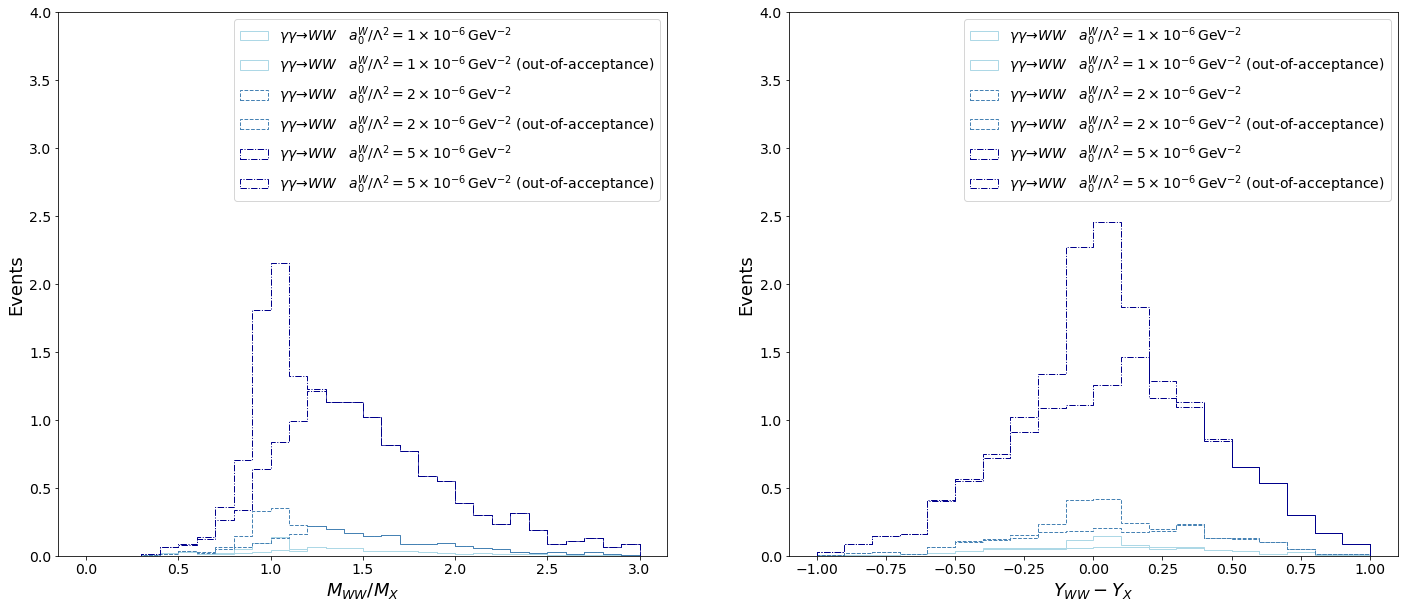

In [79]:
variation__ = "_nom"
var_str__ = {}
var_str__[ "_nom" ] = "_nom_nom"
var_weights__ = "nom"

fig, axes = plt.subplots( 1, 2, figsize=(2*12,10) )

colors_ = [ "lightblue", "steelblue", "darkblue" ]
linestyles_ = [ "-", "--", "-." ]
for idx_, label_ in enumerate( labels_signals ):
    axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
              bins=30, range=(0.,3.) )
    axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
              bins=30, range=(0.,3.) )
    axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
              bins=20, range=(-1.,1.) )
    axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
              bins=20, range=(-1.,1.) )
axes[0].set_xlabel( r"$ M_{WW} / M_{X} $", fontsize=18 )
axes[0].set_ylabel( "Events", fontsize=18 )
axes[0].legend( loc='best', fontsize=14 )
axes[1].set_xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
axes[1].set_ylabel( "Events", fontsize=18 )
axes[1].legend( loc='best', fontsize=14 )
    
axes[0].set_ylim( (0.,4.) )
axes[1].set_ylim( (0.,4.) )

if save_figures:
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix.png", bbox_inches='tight' )

In [80]:
# fig = plt.figure( figsize=(10,8) )

# colors_ = [ "lightblue", "steelblue", "darkblue" ]
# linestyles_ = [ "-", "--", "-." ]
# for idx_, label_ in enumerate( labels_signals ):
#     plt.hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
#               histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
#               bins=20, range=(-1.,1.) )
#     plt.hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights__ ][ variation__ ],
#               histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
#               bins=20, range=(-1.,1.) )
# plt.xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
# plt.ylabel( "Events", fontsize=18 )
# plt.legend( loc='best', fontsize=14 )
    
# plt.ylim( (0.,3.) )

2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix


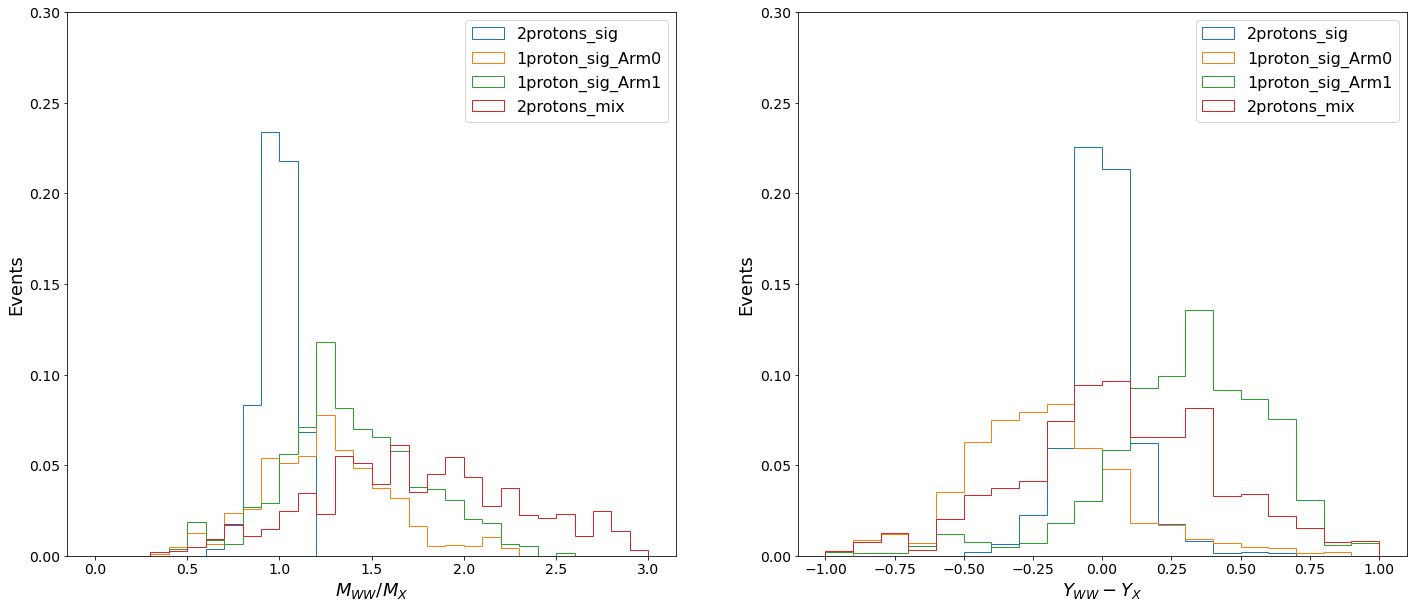

In [81]:
label_ = "GGToWW-AQGC-A0W2e-6"

fig, axes = plt.subplots( 1, 2, figsize=(2*12,10) )
for key_ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
    print ( key_ )
    df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ key_ ][ variation__ ]
    axes[0].hist( df_selected_events__[ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
              histtype='step', label=key_,
              bins=30, range=(0.,3.) )
    axes[1].hist( df_selected_events__[ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
              histtype='step', label=key_,
              bins=20, range=(-1.,1.) )
axes[0].set_xlabel( r"$ M_{WW} / M_{X} $", fontsize=18 )
axes[0].set_ylabel( "Events", fontsize=18 )
axes[0].legend( loc='best', fontsize=16 )
axes[1].set_xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
axes[1].set_ylabel( "Events", fontsize=18 )
axes[1].legend( loc='best', fontsize=16 )
# plt.ylim( 0., 0.3 )
# plt.ylim( 0., 0.5 )
# plt.ylim( 0., 3. )
axes[0].set_ylim( 0., 0.3 )
axes[1].set_ylim( 0., 0.3 )

if save_figures:
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories.png", bbox_inches='tight' )

In [82]:
# fig = plt.figure( figsize=(10,8) )
# for key_ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
#     print ( key_ )
#     df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ key_ ][ variation__ ]
#     plt.hist( df_selected_events__[ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
#               histtype='step', label=key_,
#               bins=20, range=(-1.,1.) )
# plt.xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
# plt.ylabel( "Events", fontsize=18 )
# plt.legend( loc='best', fontsize=16 )
# plt.ylim( 0., 0.3 )
# # plt.ylim( 0., 0.5 )
# # plt.ylim( 0., 3. )

GGToWW-AQGC-A0W1e-6
Number of events: 0.8841380227347485 +/- 0.03504234065359483
Number of events (A): 0.7251809904951909 +/- 0.031558294852632535
Number of events (B): 0.06094889789518812 +/- 0.008848751263350092
Number of events (C): 0.06635235919074424 +/- 0.01019851434498181
Number of events (D): 0.03165577515362526 +/- 0.007051919647262881
0 0
GGToWW-AQGC-A0W2e-6
Number of events: 2.6995504730968696 +/- 0.07263352127171718
Number of events (A): 2.3410995820707177 +/- 0.06756109847375802
Number of events (B): 0.10291112772533327 +/- 0.013486688956649071
Number of events (C): 0.21257117535713066 +/- 0.020980704966582112
Number of events (D): 0.042968587943687866 +/- 0.009436398965707284
0 1
GGToWW-AQGC-A0W5e-6
Number of events: 16.163405458133056 +/- 0.2693473444973807
Number of events (A): 14.078390027354333 +/- 0.2512306604397186
Number of events (B): 0.48884342659739305 +/- 0.04478936983226103
Number of events (C): 1.426840828885156 +/- 0.08091358551697089
Number of events (D): 0

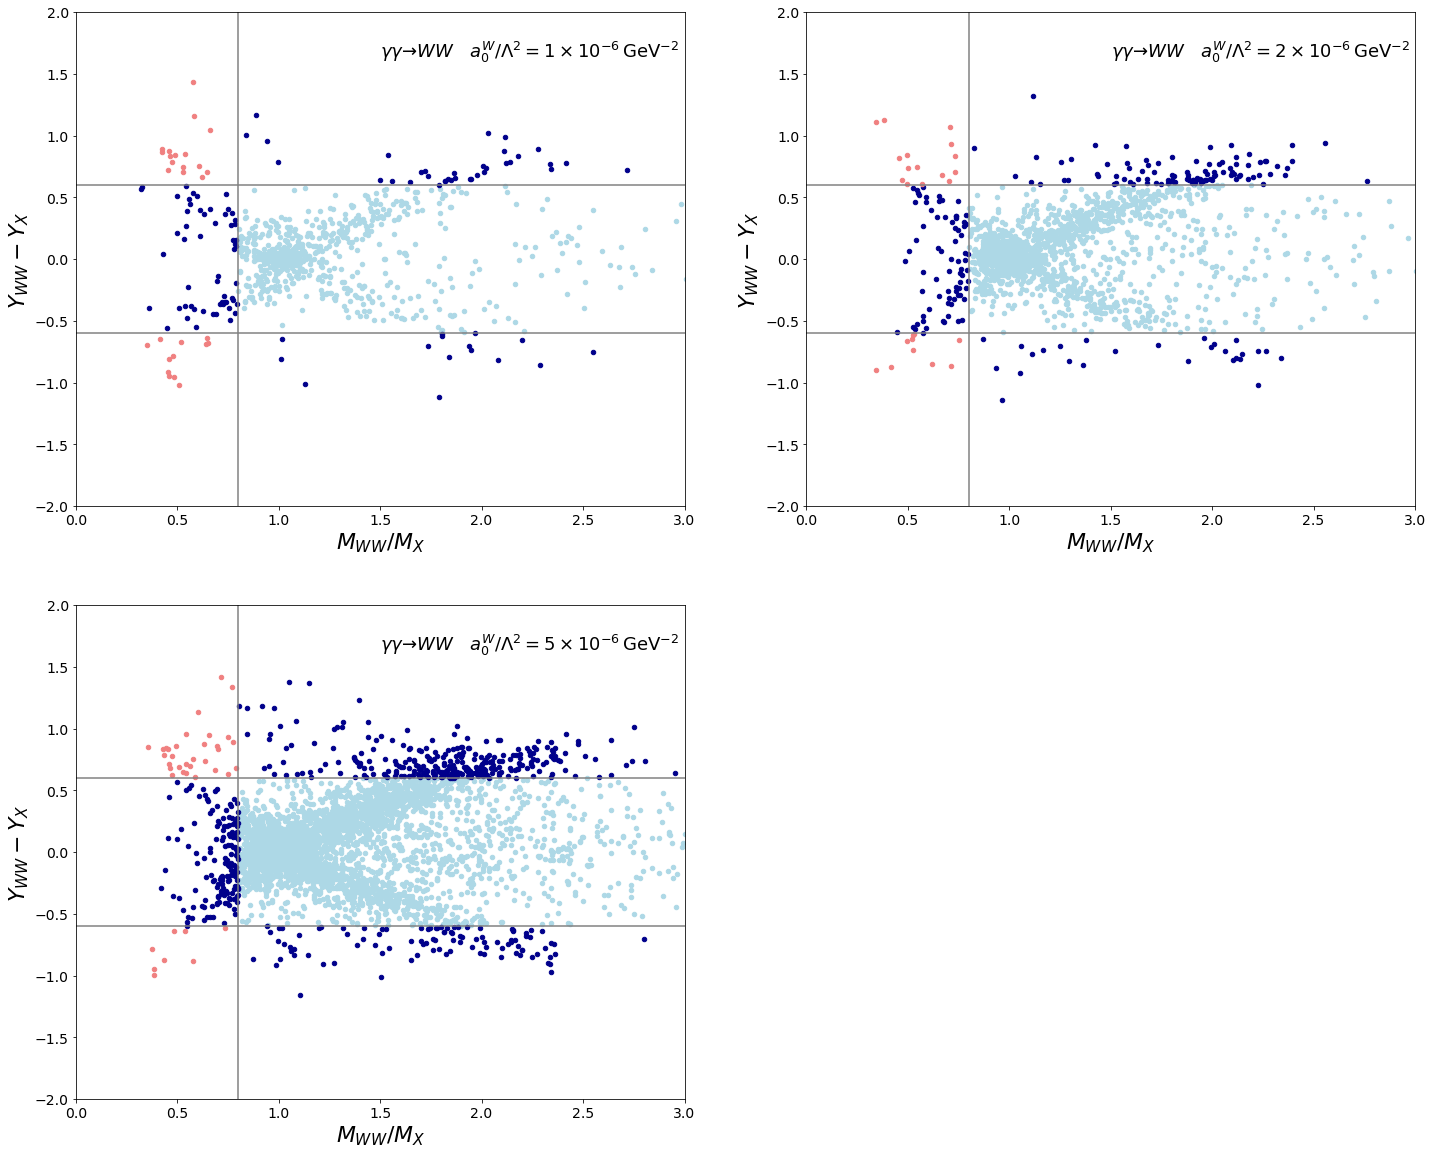

In [83]:
nrows_ = ( int( len(labels_signals)/2 ) + 1 if ( len(labels_signals) % 2 ) > 0 else int( len(labels_signals)/2 ) )
fig, axes = plt.subplots( nrows_, 2, figsize=(2*12,nrows_*10) )

row_ = 0
col_ = 0
for label_ in labels_signals:
    print ( label_ )
    df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ]
    weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ]
    var1__ = ( "R_MWW_MX" + var_str__[ "_nom" ] )
    var2__ = ( "Diff_YWW_YX" + var_str__[ "_nom" ] )
    
    msk_sig_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_sig_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    msk_sig_A =  msk_sig_cut1 &  msk_sig_cut2
    msk_sig_B = ~msk_sig_cut1 &  msk_sig_cut2
    msk_sig_C =  msk_sig_cut1 & ~msk_sig_cut2
    msk_sig_D = ~msk_sig_cut1 & ~msk_sig_cut2

    n_events_sig   = np.sum( weights__ )
    err_n_events_sig = np.sqrt( np.sum( weights__ ** 2 ) )
    n_events_sig_A = np.sum( weights__[ msk_sig_A ] )
    err_n_events_sig_A = np.sqrt( np.sum( weights__[ msk_sig_A ] ** 2 ) )
    n_events_sig_B = np.sum( weights__[ msk_sig_B ] )
    err_n_events_sig_B = np.sqrt( np.sum( weights__[ msk_sig_B ] ** 2 ) )
    n_events_sig_C = np.sum( weights__[ msk_sig_C ] )
    err_n_events_sig_C = np.sqrt( np.sum( weights__[ msk_sig_C ] ** 2 ) )
    n_events_sig_D = np.sum( weights__[ msk_sig_D ] )
    err_n_events_sig_D = np.sqrt( np.sum( weights__[ msk_sig_D ] ** 2 ) )

    print ( "Number of events: {} +/- {}".format( n_events_sig, err_n_events_sig ) )
    print ( "Number of events (A): {} +/- {}".format( n_events_sig_A, err_n_events_sig_A ) )
    print ( "Number of events (B): {} +/- {}".format( n_events_sig_B, err_n_events_sig_B ) )
    print ( "Number of events (C): {} +/- {}".format( n_events_sig_C, err_n_events_sig_C ) )
    print ( "Number of events (D): {} +/- {}".format( n_events_sig_D, err_n_events_sig_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    print ( row_, col_ )
    axes[ row_, col_ ].plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    axes[ row_, col_ ].plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    axes[ row_, col_ ].plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    if np.sum( msk_sig_A ) > 0:
        df__[ msk_sig_A ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='lightblue' )
    if np.sum( msk_sig_B ) > 0:
        df__[ msk_sig_B ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='darkblue' )
    if np.sum( msk_sig_C ) > 0:
        df__[ msk_sig_C ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='darkblue' )
    if np.sum( msk_sig_D ) > 0:
        df__[ msk_sig_D ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='lightcoral' )
    title_str_ = labels_samples[ label_ ]
    axes[ row_, col_ ].text( 0.50, 0.92, title_str_, horizontalalignment='left', verticalalignment='center', transform=axes[ row_, col_ ].transAxes, fontsize=18 )
    axes[ row_, col_ ].set_xlim(x_min, x_max)
    axes[ row_, col_ ].set_ylim(y_min, y_max)
    axes[ row_, col_ ].set_xlabel( r"$M_{WW} / M_{X}$", fontsize=22 )
    axes[ row_, col_ ].set_ylabel( r"$Y_{WW} - Y_{X}$", fontsize=22 )
    col_ += 1
    if col_ >= 2:
        row_ += 1
        col_  = 0
if col_ == 1: axes[ row_, col_ ].axis('off')
    
if save_figures:
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Signal.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Signal.png", bbox_inches='tight' )

In [84]:
# label_ = "GGToWW-AQGC-A0W5e-6"
# fig = plt.figure( figsize=(12,10) )
# for key_ in df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ]:
#     print ( key_ )
#     df_selected_events__ = df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ][ key_ ]
#     plt.hist( df_selected_events__[ "ratioMWW_MX" ], weights=weights_out_acceptance_misreconstructed[ label_ ][ key_ ],
#               histtype='step', label=key_,
#               bins=20, range=(0.,2.) )
# plt.legend( loc='best', fontsize=16 )

In [85]:
# fig = plt.figure( figsize=(10,8) )

# colors_ = [ "lightblue", "steelblue", "darkblue" ]
# linestyles_ = [ "-", "--", "-." ]
# for idx_, label_ in enumerate( labels_signals ):
#     plt.hist( df_signals_protons_multiRP_events[ label_ ][ "ratioMWW_MX" ], weights=weights_mc[ label_ ],
#               histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
#               bins=30, range=(0.,3.) )
#     plt.hist( df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events_concat[ label_ ][ "ratioMWW_MX" ],
#               weights=weights_out_acceptance_misreconstructed_concat[ label_ ],
#               histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
#               bins=30, range=(0.,3.) )


# plt.legend( loc='best', fontsize=16 )
    
# plt.ylim( (0.,3.) )

# if save_figures:
#     plt.savefig( "plots/Ratio_MWW_MX_signals.pdf", bbox_inches='tight' )
#     plt.savefig( "plots/Ratio_MWW_MX_signals.png", bbox_inches='tight' )

In [86]:
from scipy.interpolate import make_interp_spline

relative_uncertainty_ = True

vars_ = {}
vars_[ "R_MWW_MX" ] = {}
# vars_[ "R_MWW_MX" ][ "bins" ]  = 30
# # vars_[ "R_MWW_MX" ][ "bins" ]  = 15
# vars_[ "R_MWW_MX" ][ "range" ] = (0.,3.)
# vars_[ "R_MWW_MX" ][ "xlim" ]  = (0.5,2.)
vars_[ "R_MWW_MX" ][ "bins" ]  = 0.6 + 0.2 * np.arange( 8 )
vars_[ "R_MWW_MX" ][ "range" ] = None
vars_[ "R_MWW_MX" ][ "xlim" ]  = ( 0.6, 2. )
vars_[ "R_MWW_MX" ][ "xtitle" ]  = r"$M_{WW} / M_{X}$"
vars_[ "Diff_YWW_YX" ] = {}
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = 20
# # vars_[ "Diff_YWW_YX" ][ "bins" ]  = 10
# vars_[ "Diff_YWW_YX" ][ "range" ] = (-1.,1.)
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = (-1.,1.)
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1. + 0.2 * np.arange( 11 )
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1. + 0.4 * np.arange( 6 )
vars_[ "Diff_YWW_YX" ][ "bins" ]  = -0.6 + 0.4 * np.arange( 4 )
vars_[ "Diff_YWW_YX" ][ "range" ] = None
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -1., 1. )
vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -0.60, 0.60 )
vars_[ "Diff_YWW_YX" ][ "xtitle" ]  = r"$Y_{WW} - Y_{X}$"

# ylim_ = (0.,0.2)
# ylim_ = (0.,0.5)
# ylim_ = (0.,1.)
ylim_ = (0.,3.)
# ylim_ = (0.,5.)

color_ = "darkblue"

def plot_uncertainties_variations(df_dict, weights_dict, variables, variations, selection_dict, scale_variation, label, var_info, ylim, ylim_ratio, color, relative_uncertainty):

    __df_dict = df_dict
    __weights_dict = weights_dict
    vars_ = variables
    __variations = variations
    sel_str__ = selection_dict
#     var_weights__ = var_weights
    scale_variation_=scale_variation
    label_ = label
    vars_ = var_info
    ylim_ = ylim
    color_ = color
    relative_uncertainty_ = relative_uncertainty

    max_ = {}
    min_ = {}
    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}
    idx_row_ = 0
    idx_col_ = 0

    fig_, axes_ = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    print ( label_ )
    for var__ in vars_:
        print ( var__ )
        max_[ var__ ] = None
        min_[ var__ ] = None
        for idx_, variation__ in enumerate( __variations ):
            __variation__ = variation__ if not scale_variation_ else "_nom"
            __sel_str__ = sel_str__[ __variation__ ] if not scale_variation_ else "_nom"
            __var_weights__ = variation__ if scale_variation_ else "nom"
            if variation__ != "_nom" and variation__ != "nom":
                print ( __variation__ )
                print ( __sel_str__ )
                print ( __var_weights__ )
                df__ = __df_dict[ label_ ][ __sel_str__ ]
                weights__ = __weights_dict[ label_ ][ __var_weights__ ][ __sel_str__ ]
                arr__ = df__[ var__ + __variation__ ]
                
                arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + __variation__ ]
                msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
                arr__ = arr__.loc[ msk__ ]
                weights__ = weights__.loc[ msk__ ]
                counts_, bins_ = np.histogram( arr__, weights=weights__, bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

                if max_[ var__ ] is None: max_[ var__ ] = counts_.copy()
                if min_[ var__ ] is None: min_[ var__ ] = counts_.copy()
                msk__ = counts_ > max_[ var__ ]
                max_[ var__ ][ msk__ ] = counts_[ msk__ ]
                msk__ = counts_ < min_[ var__ ]
                min_[ var__ ][ msk__ ] = counts_[ msk__ ]

        print ( max_[ var__ ] )
        print ( min_[ var__ ] )
        idx_row_ = 0
        df__ = __df_dict[ label_ ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]
        weights__ = __weights_dict[ label_ ][ "nom" ][ "_nom" ]
        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        counts_, bins_, _ = axes_[idx_row_,idx_col_].hist( arr__, 
                                                           weights=weights__,
                                                           histtype='step', color=color_, linestyle="-", label="_nom",
                                                           bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, max_[ var__ ], k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, min_[ var__ ], k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )

        axes_[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes_[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes_[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
        axes_[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes_[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes_[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes_[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes_[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
        axes_[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        # axes_[idx_row_,idx_col_].set_ylim( -1., 1. )
        axes_[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1
        
    return ( max_, min_ )

In [87]:
def calculate_uncertainties_variations(df_dict, weights_dict, variations, selection_dict, scale_variation):
    
    __df_dict = df_dict
    __weights_dict = weights_dict
    variations_ = variations
    sel_str__ = selection_dict
    scale_variation_=scale_variation
    
    sum_weights_cut = {}
    sum_weights_squared_cut = {}
    sum_weights_cut_max = {}
    sum_weights_cut_min = {}
    for label_ in labels_signals:
        print ( label_ )
        sum_weights_cut_max_ = None
        sum_weights_cut_min_ = None
        for idx_, variation__ in enumerate( variations_ ):
            __variation__ = variation__ if not scale_variation_ else "_nom"
            __sel_str__ = sel_str__[ __variation__ ] if not scale_variation_ else "_nom"
            __var_weights__ = variation__ if scale_variation_ else "nom"
            if variation__ != "_nom" and variation__ != "nom":
                print ( __variation__ )
                print ( __sel_str__ )
                print ( __var_weights__ )
                df__ = __df_dict[ label_ ][ __sel_str__ ]
                weights__ = __weights_dict[ label_ ][ __var_weights__ ][ __sel_str__ ]
                arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + __variation__ ]
                arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + __variation__ ]
                msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
                sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
                if sum_weights_cut_max_ is None:
                    sum_weights_cut_max_ = sum_weights_cut__
                if sum_weights_cut_min_ is None:
                    sum_weights_cut_min_ = sum_weights_cut__
                if sum_weights_cut__ > sum_weights_cut_max_:
                    sum_weights_cut_max_ = sum_weights_cut__
                if sum_weights_cut__ < sum_weights_cut_min_:
                    sum_weights_cut_min_ = sum_weights_cut__

        df__ = __df_dict[ label_ ][ "_nom" ]
        weights__ = __weights_dict[ label_ ][ "nom" ][ "_nom" ]
        weights_squared__ = ( weights__ ** 2 )
        arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + "_nom" ]
        arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
        sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
        sum_weights_squared_cut__ = np.sum( weights_squared__.loc[ msk__ ] )
        print ( "{} ± {}".format( sum_weights_cut__, np.sqrt( sum_weights_squared_cut__ ) ) )
        print ( sum_weights_cut_max_ )
        print ( sum_weights_cut_min_ )
        sum_weights_cut[ label_ ] = sum_weights_cut__
        sum_weights_squared_cut[ label_ ] = sum_weights_squared_cut__
        sum_weights_cut_max[ label_ ] = sum_weights_cut_max_
        sum_weights_cut_min[ label_ ] = sum_weights_cut_min_

    print ( sum_weights_cut )
    print ( sum_weights_squared_cut )
    print ( sum_weights_cut_max )
    print ( sum_weights_cut_min )
    
    return ( sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min )

In [88]:
# variations_ = [ "_nom", "_jes_up", "_jes_dw" ]
# var_str__ = {}
# for key_ in variations_:
#     var_str__[ key_ ] = key_
# # var_str__[ "_nom" ] = "_nom_nom"

# fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

# color_ = "darkblue"
# linestyles_ = [ "-", "--", "--" ]
# idx_row_ = 0
# idx_col_ = 0
# for idx_, variation__ in enumerate( variations_ ):
#     arr__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ variation__ ] ]
#     weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ variation__ ]
#     counts__, bins__, _ = axes[0,0].hist( arr__, weights=weights__,
#                                                  histtype='step', color=color_, linestyle=linestyles_[ idx_ ], label=variation__,
#                                                  bins=30, range=(0.,3.) )
#     weights_nom__ = None
#     if variation__ != "_nom":
#         arr_nom__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ][ "R_MWW_MX" + var_str__[ "_nom" ] ]
#         weights_nom__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ "_nom" ]
#         counts_nom__, bins_nom__ = np.histogram( arr_nom__, weights=weights_nom__, bins=30, range=(0.,3.) )
#         bin_centers__ = ( bins__[:-1] + bins__[1:] ) / 2
#         axes[1,0].hist( bin_centers__, weights=( ( counts__ - counts_nom__ ) / counts_nom__ ),
#                                        histtype='step', color=color_, linestyle=linestyles_[ idx_ ], label=variation__,
#                                        bins=30, range=(0.,3.) )
#         axes[1,0].set_ylim( -0.50, 0.50 )
        
#     arr__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ variation__ ] ]
#     counts__, bins__, _ = axes[0,1].hist( arr__, weights=weights__,
#                                                  histtype='step', color=color_, linestyle=linestyles_[ idx_ ], label=variation__,
#                                                  bins=20, range=(-1.,1.) )
#     if variation__ != "_nom":
#         arr_nom__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ][ "Diff_YWW_YX" + var_str__[ variation__ ] ]
#         counts_nom__, bins_nom__ = np.histogram( arr_nom__, weights=weights_nom__, bins=20, range=(-1.,1.) )
#         bin_centers__ = ( bins__[:-1] + bins__[1:] ) / 2
#         axes[1,1].hist( bin_centers__, weights=( ( counts__ - counts_nom__ ) / counts_nom__ ),
#                                        histtype='step', color=color_, linestyle=linestyles_[ idx_ ], label=variation__,
#                                        bins=20, range=(-1.,1.) )
#         axes[1,1].set_ylim( -0.50, 0.50 )     

GGToWW-AQGC-A0W2e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[0.07748704 0.47138011 0.5605473  0.4021396  0.29115238 0.21458734
 0.12557436]
[0.07423491 0.46679488 0.55747148 0.40021304 0.28891658 0.21245095
 0.1240923 ]
0      0.043809
1      0.033907
2      0.027181
3      0.022326
4      0.018666
         ...   
195   -0.007308
196   -0.007469
197   -0.007622
198   -0.007767
199   -0.007902
Length: 200, dtype: float64 0.0033712323583304092
0      0.000000
1     -0.002909
2     -0.004852
3     -0.006226
4     -0.007236
         ...   
195   -0.018794
196   -0.019010
197   -0.019219
198   -0.019419
199   -0.019611
Length: 200, dtype: float64 -0.005852781777223764
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[0.45139565 1.30515737 0.69461149]
[0.4429964  1.30032837 0.69182629]
0      0.008784
1      0.008586
2      0.008402
3      0.008231
4      0.008070
         ...   
195   -0.001687
196   -0.001854
197   -0.002029
198   -0.002211
199   -0.002402
Length: 200, dtype: f

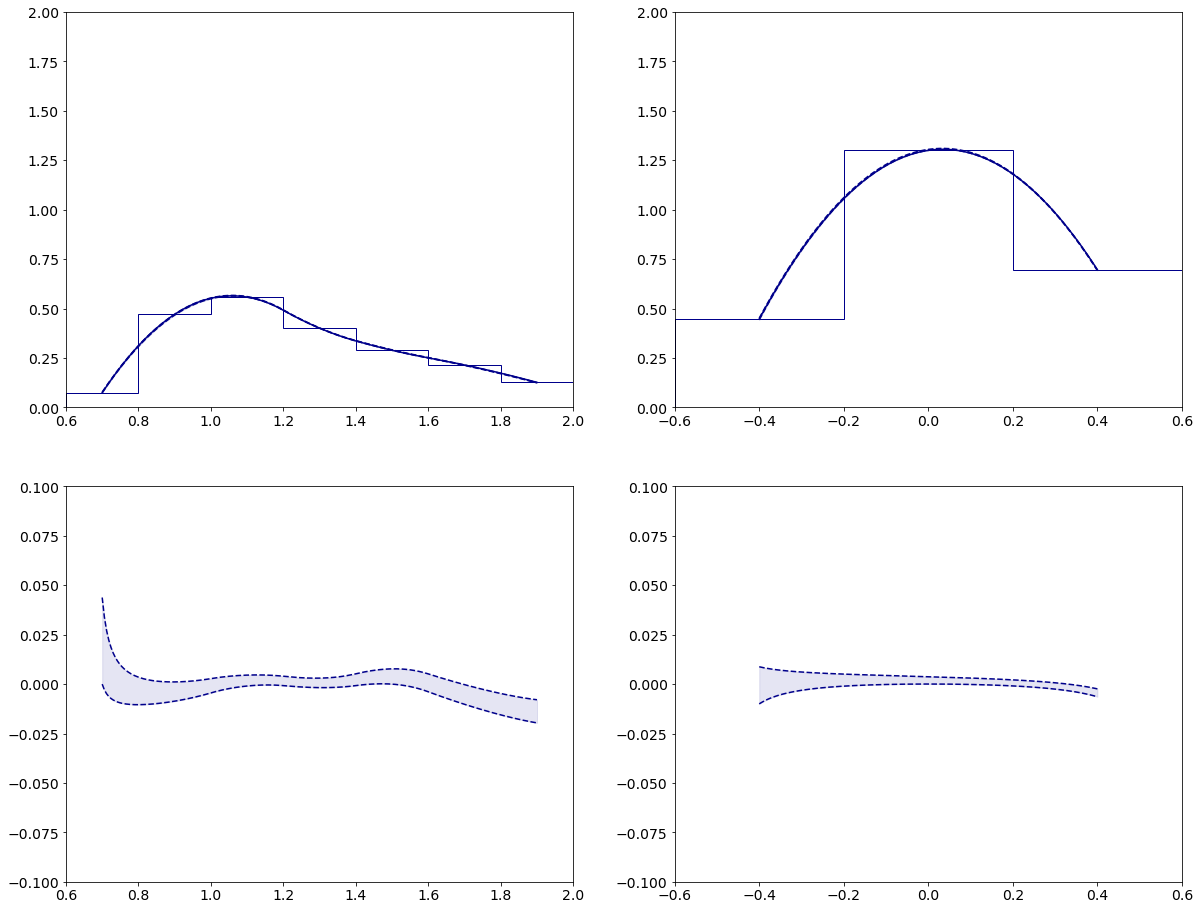

In [89]:
label_ref_ = "GGToWW-AQGC-A0W2e-6"

variations_ = [ "_nom", "_jes_up", "_jes_dw" ]

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = key_

# var_weights__ = "nom"

relative_uncertainty_ = True

# ylim_ = (0.,1.)
ylim_ = (0.,2.)
ylim_ratio_ = (-0.10,0.10)

color_ = "darkblue"

max_, min_ = plot_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variables=vars_,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False,
    label=label_ref_,
    var_info=vars_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_,
    relative_uncertainty=relative_uncertainty_)

print ( max_, min_ )

In [90]:
max_variations = {}
min_variations = {}
max_variations[ "jes" ] = max_
min_variations[ "jes" ] = min_
print ( max_variations )
print ( min_variations )

{'jes': {'R_MWW_MX': array([0.07748704, 0.47138011, 0.5605473 , 0.4021396 , 0.29115238,
       0.21458734, 0.12557436]), 'Diff_YWW_YX': array([0.45139565, 1.30515737, 0.69461149])}}
{'jes': {'R_MWW_MX': array([0.07423491, 0.46679488, 0.55747148, 0.40021304, 0.28891658,
       0.21245095, 0.1240923 ]), 'Diff_YWW_YX': array([0.4429964 , 1.30032837, 0.69182629])}}


In [91]:
# sum_weights_cut = {}
# sum_weights_squared_cut = {}
# sum_weights_cut_max = {}
# sum_weights_cut_min = {}
# for label_ in labels_signals:
#     print ( label_ )
#     sum_weights_cut_max_ = None
#     sum_weights_cut_min_ = None
#     for idx_, variation__ in enumerate( variations_ ):
#         if variation__ != "_nom":
#             print ( variation__ )
#             df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ]
#             weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ variation__ ]
#             arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + variation__ ]
#             arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + variation__ ]
#             msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 1.0 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
#             sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
#             if sum_weights_cut_max_ is None:
#                 sum_weights_cut_max_ = sum_weights_cut__
#             if sum_weights_cut_min_ is None:
#                 sum_weights_cut_min_ = sum_weights_cut__
#             if sum_weights_cut__ > sum_weights_cut_max_:
#                 sum_weights_cut_max_ = sum_weights_cut__
#             if sum_weights_cut__ < sum_weights_cut_min_:
#                 sum_weights_cut_min_ = sum_weights_cut__

#     df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
#     weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ "_nom" ]
#     weights_squared__ = ( weights__ ** 2 )
#     arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + "_nom" ]
#     arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + "_nom" ]
#     msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 1.0 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
#     sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
#     sum_weights_squared_cut__ = np.sum( weights_squared__.loc[ msk__ ] )
#     print ( "{} ± {}".format( sum_weights_cut__, np.sqrt( sum_weights_squared_cut__ ) ) )
#     print ( sum_weights_cut_max_ )
#     print ( sum_weights_cut_min_ )
#     sum_weights_cut[ label_ ] = sum_weights_cut__
#     sum_weights_squared_cut[ label_ ] = sum_weights_squared_cut__
#     sum_weights_cut_max[ label_ ] = sum_weights_cut_max_
#     sum_weights_cut_min[ label_ ] = sum_weights_cut_min_
    
# print ( sum_weights_cut )
# print ( sum_weights_squared_cut )
# print ( sum_weights_cut_max )
# print ( sum_weights_cut_min )

In [92]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

GGToWW-AQGC-A0W1e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
0.7251809904951909 ± 0.031558294852632535
0.7258233679955022
0.7255959226842209
GGToWW-AQGC-A0W2e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
2.3410995820707177 ± 0.06756109847375802
2.3434243815989273
2.3338168147668847
GGToWW-AQGC-A0W5e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
14.078390027354333 ± 0.2512306604397186
14.116949823521228
14.002965077459134
{'GGToWW-AQGC-A0W1e-6': 0.7251809904951909, 'GGToWW-AQGC-A0W2e-6': 2.3410995820707177, 'GGToWW-AQGC-A0W5e-6': 14.078390027354333}
{'GGToWW-AQGC-A0W1e-6': 0.000995925974005693, 'GGToWW-AQGC-A0W2e-6': 0.004564502026980828, 'GGToWW-AQGC-A0W5e-6': 0.0631168447449772}
{'GGToWW-AQGC-A0W1e-6': 0.7258233679955022, 'GGToWW-AQGC-A0W2e-6': 2.3434243815989273, 'GGToWW-AQGC-A0W5e-6': 14.116949823521228}
{'GGToWW-AQGC-A0W1e-6': 0.7255959226842209, 'GGToWW-AQGC-A0W2e-6': 2.3338168147668847, 'GGToWW-AQGC-A0W5e-6': 14.002965077459134}


In [93]:
sum_weights = {}
for label_ in labels_signals:
    sum_weights[ label_ ] = {}
    sum_weights[ label_ ][ "central" ]        = sum_weights_cut[ label_ ]
    sum_weights[ label_ ][ "stat" ]           = np.sqrt( sum_weights_squared_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_up_jes" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_jes" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-A0W1e-6': {'central': 0.7251809904951909, 'stat': 0.031558294852632535, 'syst_up_jes': 0.0006423775003112642, 'syst_dw_jes': 0.00041493218902999285}, 'GGToWW-AQGC-A0W2e-6': {'central': 2.3410995820707177, 'stat': 0.06756109847375802, 'syst_up_jes': 0.002324799528209631, 'syst_dw_jes': -0.007282767303832927}, 'GGToWW-AQGC-A0W5e-6': {'central': 14.078390027354333, 'stat': 0.2512306604397186, 'syst_up_jes': 0.03855979616689531, 'syst_dw_jes': -0.07542494989519888}}


GGToWW-AQGC-A0W2e-6
R_MWW_MX
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
[0.07631036 0.47085302 0.55799856 0.40143048 0.28891658 0.21464278
 0.12937246]
[0.07423491 0.46934362 0.55731839 0.40092216 0.28891658 0.21464278
 0.1265746 ]
0      0.027958
1      0.021809
2      0.017620
3      0.014586
4      0.012289
         ...   
195    0.016586
196    0.017840
197    0.019174
198    0.020593
199    0.022104
Length: 200, dtype: float64 0.002292731414788538
0      0.000000
1     -0.000944
2     -0.001578
3     -0.002029
4     -0.002364
         ...   
195    0.000008
196    0.000006
197    0.000004
198    0.000002
199    0.000000
Length: 200, dtype: float64 -0.0009620680283390817
Diff_YWW_YX
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
[0.44491652 1.30791644 0.69863452]
[0.44470389 1.29963451 0.69350807]
0     -0.005696
1     -0.005113
2     -0.004574
3     -0.004073
4     -0.003607
         ...   
195    0.003824
196    0.003720
197    0.003611
198    0.003496
199    0.003376
Length: 200, dtype: f

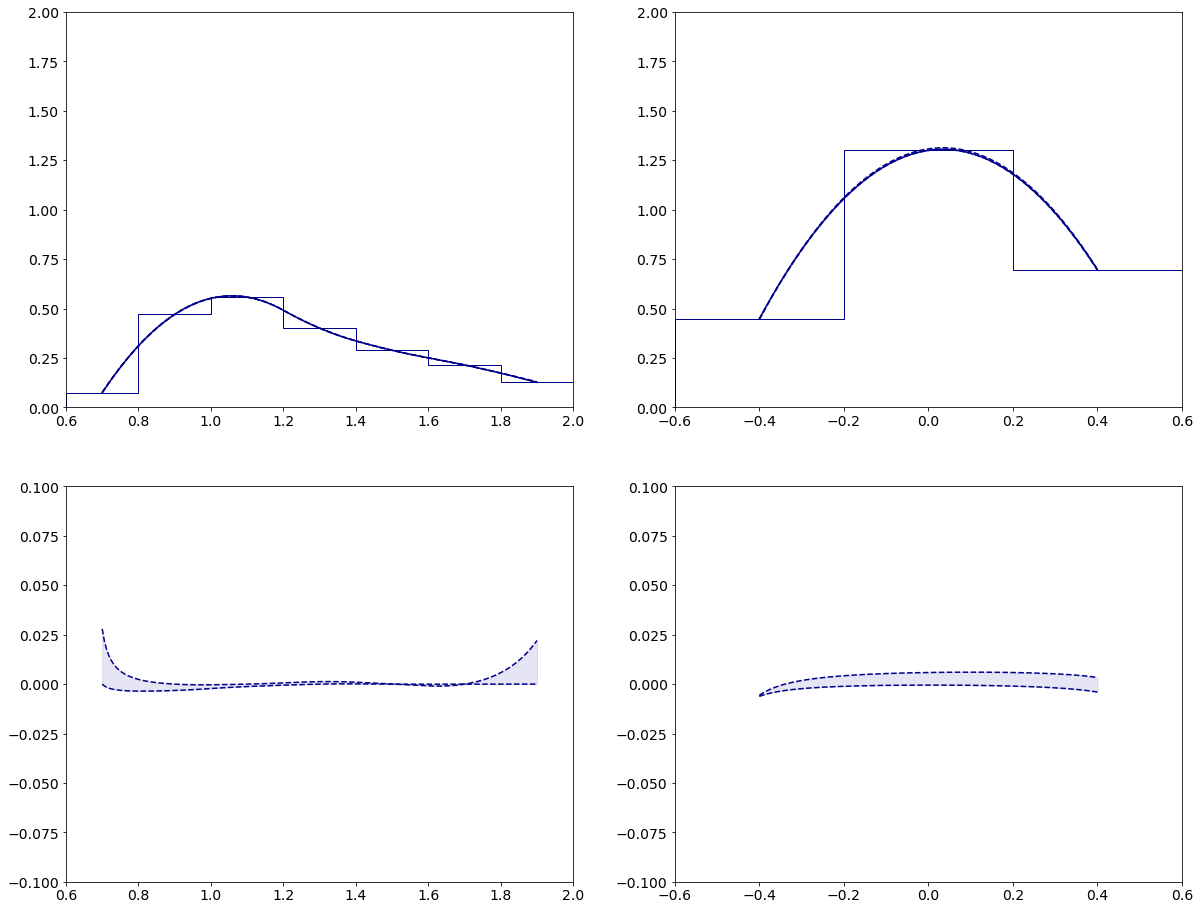

In [94]:
# label_ = "GGToWW-AQGC-A0W2e-6"

variations_ = [ "_nom", "_jer_up", "_jer_dw" ]

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = key_

relative_uncertainty_ = True

# ylim_ = (0.,1.)
ylim_ = (0.,2.)
ylim_ratio_ = (-0.10,0.10)

color_ = "darkblue"

max_, min_ = plot_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variables=vars_,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False,
    label=label_ref_,
    var_info=vars_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_,
    relative_uncertainty=relative_uncertainty_)

print ( max_, min_ )

In [95]:
max_variations[ "jer" ] = max_
min_variations[ "jer" ] = min_
print ( max_variations )
print ( min_variations )

{'jes': {'R_MWW_MX': array([0.07748704, 0.47138011, 0.5605473 , 0.4021396 , 0.29115238,
       0.21458734, 0.12557436]), 'Diff_YWW_YX': array([0.45139565, 1.30515737, 0.69461149])}, 'jer': {'R_MWW_MX': array([0.07631036, 0.47085302, 0.55799856, 0.40143048, 0.28891658,
       0.21464278, 0.12937246]), 'Diff_YWW_YX': array([0.44491652, 1.30791644, 0.69863452])}}
{'jes': {'R_MWW_MX': array([0.07423491, 0.46679488, 0.55747148, 0.40021304, 0.28891658,
       0.21245095, 0.1240923 ]), 'Diff_YWW_YX': array([0.4429964 , 1.30032837, 0.69182629])}, 'jer': {'R_MWW_MX': array([0.07423491, 0.46934362, 0.55731839, 0.40092216, 0.28891658,
       0.21464278, 0.1265746 ]), 'Diff_YWW_YX': array([0.44470389, 1.29963451, 0.69350807])}}


In [96]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

GGToWW-AQGC-A0W1e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
0.7251809904951909 ± 0.031558294852632535
0.7255193754324385
0.724102569422687
GGToWW-AQGC-A0W2e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
2.3410995820707177 ± 0.06756109847375802
2.3432172760538075
2.3381989806325443
GGToWW-AQGC-A0W5e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
14.078390027354333 ± 0.2512306604397186
14.1044355801921
14.040649216693003
{'GGToWW-AQGC-A0W1e-6': 0.7251809904951909, 'GGToWW-AQGC-A0W2e-6': 2.3410995820707177, 'GGToWW-AQGC-A0W5e-6': 14.078390027354333}
{'GGToWW-AQGC-A0W1e-6': 0.000995925974005693, 'GGToWW-AQGC-A0W2e-6': 0.004564502026980828, 'GGToWW-AQGC-A0W5e-6': 0.0631168447449772}
{'GGToWW-AQGC-A0W1e-6': 0.7255193754324385, 'GGToWW-AQGC-A0W2e-6': 2.3432172760538075, 'GGToWW-AQGC-A0W5e-6': 14.1044355801921}
{'GGToWW-AQGC-A0W1e-6': 0.724102569422687, 'GGToWW-AQGC-A0W2e-6': 2.3381989806325443, 'GGToWW-AQGC-A0W5e-6': 14.040649216693003}


In [97]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_jer" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_jer" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-A0W1e-6': {'central': 0.7251809904951909, 'stat': 0.031558294852632535, 'syst_up_jes': 0.0006423775003112642, 'syst_dw_jes': 0.00041493218902999285, 'syst_up_jer': 0.00033838493724758223, 'syst_dw_jer': -0.0010784210725038879}, 'GGToWW-AQGC-A0W2e-6': {'central': 2.3410995820707177, 'stat': 0.06756109847375802, 'syst_up_jes': 0.002324799528209631, 'syst_dw_jes': -0.007282767303832927, 'syst_up_jer': 0.002117693983089808, 'syst_dw_jer': -0.002900601438173389}, 'GGToWW-AQGC-A0W5e-6': {'central': 14.078390027354333, 'stat': 0.2512306604397186, 'syst_up_jes': 0.03855979616689531, 'syst_dw_jes': -0.07542494989519888, 'syst_up_jer': 0.02604555283776655, 'syst_dw_jer': -0.037740810661329505}}


In [98]:
# label_ = "GGToWW-AQGC-A0W2e-6"

# variations_weights_ = [ "nom", "sf_muon_id_up", "sf_muon_id_dw" ]
# variation__ = "_nom"

# fig, axes = plt.subplots( 1, 2, figsize=(2*10,8) )

# color_ = "darkblue"
# linestyles_ = [ "-", "--", "--" ]
# for idx_, var_weights__ in enumerate( variations_weights_ ):
#     axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ variation__ ] ],
#                   weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
#                   histtype='step', color=color_, linestyle=linestyles_[ idx_ ], label=var_weights__,
#                   bins=30, range=(0.,3.) )
#     axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ variation__ ] ],
#                   weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
#                   histtype='step', color=color_, linestyle=linestyles_[ idx_ ], label=var_weights__,
#                   bins=20, range=(-1.,1.) )

GGToWW-AQGC-A0W2e-6
R_MWW_MX
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
[0.07439913 0.47235695 0.55981477 0.4022856  0.28979285 0.21529852
 0.12706518]
[0.07407069 0.4693491  0.55618236 0.39955872 0.28804031 0.21398704
 0.12608402]
0      0.002212
1      0.002424
2      0.002569
3      0.002673
4      0.002753
         ...   
195    0.003686
196    0.003729
197    0.003775
198    0.003824
199    0.003876
Length: 200, dtype: float64 0.0031928957905156263
0     -0.002212
1     -0.002424
2     -0.002569
3     -0.002673
4     -0.002753
         ...   
195   -0.003686
196   -0.003729
197   -0.003775
198   -0.003824
199   -0.003876
Length: 200, dtype: float64 -0.0031928957905146397
Diff_YWW_YX
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
[0.44876693 1.30458613 0.69834888]
[0.44616324 1.29593737 0.69421887]
0      0.002909
1      0.002932
2      0.002954
3      0.002973
4      0.002992
         ...   
195    0.003016
196    0.003004
197    0.002992
198    0.002979
199    0.002966
Leng

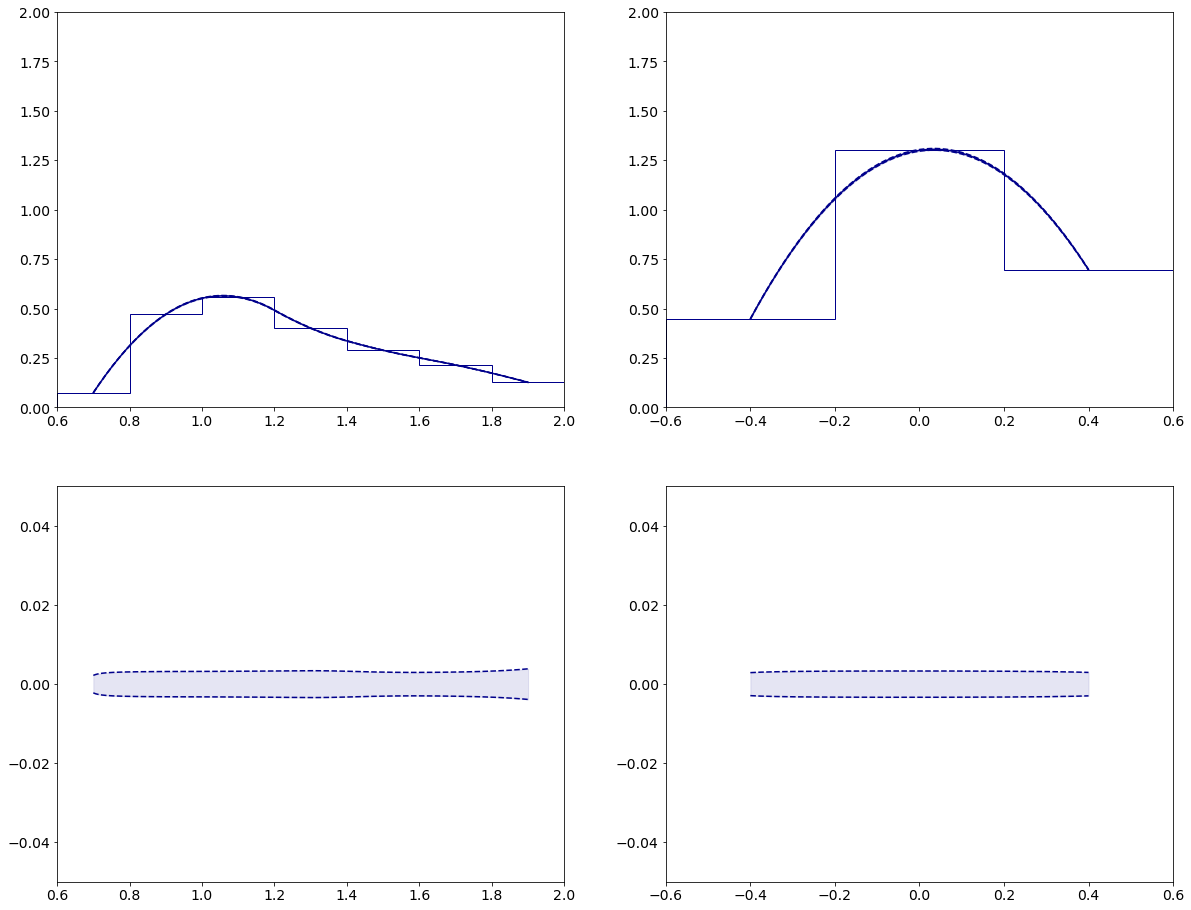

In [99]:
# label_ = "GGToWW-AQGC-A0W2e-6"

variations_weights_ = [ "nom", "sf_muon_id_up", "sf_muon_id_dw" ]

relative_uncertainty_ = True

# ylim_ = (0.,1.)
ylim_ = (0.,2.)
ylim_ratio_ = (-0.05,0.05)

color_ = "darkblue"

max_, min_ = plot_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variables=vars_,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True,
    label=label_ref_,
    var_info=vars_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_,
    relative_uncertainty=relative_uncertainty_)

print ( max_, min_ )

In [100]:
max_variations[ "sf_muon_id" ] = max_
min_variations[ "sf_muon_id" ] = min_
print ( max_variations )
print ( min_variations )

{'jes': {'R_MWW_MX': array([0.07748704, 0.47138011, 0.5605473 , 0.4021396 , 0.29115238,
       0.21458734, 0.12557436]), 'Diff_YWW_YX': array([0.45139565, 1.30515737, 0.69461149])}, 'jer': {'R_MWW_MX': array([0.07631036, 0.47085302, 0.55799856, 0.40143048, 0.28891658,
       0.21464278, 0.12937246]), 'Diff_YWW_YX': array([0.44491652, 1.30791644, 0.69863452])}, 'sf_muon_id': {'R_MWW_MX': array([0.07439913, 0.47235695, 0.55981477, 0.4022856 , 0.28979285,
       0.21529852, 0.12706518]), 'Diff_YWW_YX': array([0.44876693, 1.30458613, 0.69834888])}}
{'jes': {'R_MWW_MX': array([0.07423491, 0.46679488, 0.55747148, 0.40021304, 0.28891658,
       0.21245095, 0.1240923 ]), 'Diff_YWW_YX': array([0.4429964 , 1.30032837, 0.69182629])}, 'jer': {'R_MWW_MX': array([0.07423491, 0.46934362, 0.55731839, 0.40092216, 0.28891658,
       0.21464278, 0.1265746 ]), 'Diff_YWW_YX': array([0.44470389, 1.29963451, 0.69350807])}, 'sf_muon_id': {'R_MWW_MX': array([0.07407069, 0.4693491 , 0.55618236, 0.39955872, 0.28

In [101]:
# sum_weights_cut = {}
# sum_weights_squared_cut = {}
# sum_weights_cut_max = {}
# sum_weights_cut_min = {}
# for label_ in labels_signals:
#     print ( label_ )
#     sum_weights_cut_max_ = None
#     sum_weights_cut_min_ = None
#     for idx_, var_weights__ in enumerate( variations_weights_ ):
#         if var_weights__ != "nom":
#             print ( var_weights__ )
#             df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
#             weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ "_nom" ]
#             print ( np.mean( weights__ ) )
#             arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + "_nom" ]
#             arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + "_nom" ]
#             msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 1.0 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
#             sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
#             if sum_weights_cut_max_ is None:
#                 sum_weights_cut_max_ = sum_weights_cut__
#             if sum_weights_cut_min_ is None:
#                 sum_weights_cut_min_ = sum_weights_cut__
#             if sum_weights_cut__ > sum_weights_cut_max_:
#                 sum_weights_cut_max_ = sum_weights_cut__
#             if sum_weights_cut__ < sum_weights_cut_min_:
#                 sum_weights_cut_min_ = sum_weights_cut__

#     df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
#     weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ "_nom" ]
#     print ( np.mean( weights__ ) )
#     weights_squared__ = ( weights__ ** 2 )
#     arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + "_nom" ]
#     arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + "_nom" ]
#     msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 1.0 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
#     sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
#     sum_weights_squared_cut__ = np.sum( weights_squared__.loc[ msk__ ] )
#     print ( "{} ± {}".format( sum_weights_cut__, np.sqrt( sum_weights_squared_cut__ ) ) )
#     print ( sum_weights_cut_max_ )
#     print ( sum_weights_cut_min_ )
#     sum_weights_cut[ label_ ] = sum_weights_cut__
#     sum_weights_squared_cut[ label_ ] = sum_weights_squared_cut__
#     sum_weights_cut_max[ label_ ] = sum_weights_cut_max_
#     sum_weights_cut_min[ label_ ] = sum_weights_cut_min_
    
# print ( sum_weights_cut )
# print ( sum_weights_squared_cut )
# print ( sum_weights_cut_max )
# print ( sum_weights_cut_min )

In [102]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-A0W1e-6
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
0.7251809904951909 ± 0.031558294852632535
0.7274505261597435
0.7229114548306385
GGToWW-AQGC-A0W2e-6
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
2.3410995820707177 ± 0.06756109847375802
2.34852962068563
2.3336695434558052
GGToWW-AQGC-A0W5e-6
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
14.078390027354333 ± 0.2512306604397186
14.11982923190045
14.036950822808215
{'GGToWW-AQGC-A0W1e-6': 0.7251809904951909, 'GGToWW-AQGC-A0W2e-6': 2.3410995820707177, 'GGToWW-AQGC-A0W5e-6': 14.078390027354333}
{'GGToWW-AQGC-A0W1e-6': 0.000995925974005693, 'GGToWW-AQGC-A0W2e-6': 0.004564502026980828, 'GGToWW-AQGC-A0W5e-6': 0.0631168447449772}
{'GGToWW-AQGC-A0W1e-6': 0.7274505261597435, 'GGToWW-AQGC-A0W2e-6': 2.34852962068563, 'GGToWW-AQGC-A0W5e-6': 14.11982923190045}
{'GGToWW-AQGC-A0W1e-6': 0.7229114548306385, 'GGToWW-AQGC-A0W2e-6': 2.3336695434558052, 'GGToWW-AQGC-A0W5e-6': 14.036950822808215}


In [103]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_sf_muon_id" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_sf_muon_id" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-A0W1e-6': {'central': 0.7251809904951909, 'stat': 0.031558294852632535, 'syst_up_jes': 0.0006423775003112642, 'syst_dw_jes': 0.00041493218902999285, 'syst_up_jer': 0.00033838493724758223, 'syst_dw_jer': -0.0010784210725038879, 'syst_up_sf_muon_id': 0.002269535664552569, 'syst_dw_sf_muon_id': -0.002269535664552458}, 'GGToWW-AQGC-A0W2e-6': {'central': 2.3410995820707177, 'stat': 0.06756109847375802, 'syst_up_jes': 0.002324799528209631, 'syst_dw_jes': -0.007282767303832927, 'syst_up_jer': 0.002117693983089808, 'syst_dw_jer': -0.002900601438173389, 'syst_up_sf_muon_id': 0.0074300386149124265, 'syst_dw_sf_muon_id': -0.0074300386149124265}, 'GGToWW-AQGC-A0W5e-6': {'central': 14.078390027354333, 'stat': 0.2512306604397186, 'syst_up_jes': 0.03855979616689531, 'syst_dw_jes': -0.07542494989519888, 'syst_up_jer': 0.02604555283776655, 'syst_dw_jer': -0.037740810661329505, 'syst_up_sf_muon_id': 0.04143920454611738, 'syst_dw_sf_muon_id': -0.04143920454611738}}


In [104]:
# label_ = "GGToWW-AQGC-A0W5e-6"

# from scipy.interpolate import make_interp_spline

# relative_uncertainty_ = True

# # labels_xi_ = [ "_nom", "_p10", "_p30", "_p60", "_p100", "_m10", "_m30", "_m60", "_m100" ]
# labels_xi_ = [ "_nom", "_p100", "_m100" ]
# variations_ = []
# # for label0_ in labels_xi_:
# #     for label1_ in labels_xi_:
# #         variations_.append( label0_ + label1_ )
# # for label0_ in [ "_nom" ]:
# #     for label1_ in labels_xi_:
# #         variations_.append( label0_ + label1_ )
# for label0_ in labels_xi_:
#     for label1_ in [ "_nom" ]:
#         variations_.append( label0_ + label1_ )

# sel_str__ = {}
# for key_ in variations_:
#     sel_str__[ key_ ] = "_nom"

# var_weights__ = "nom"
    
# fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

# vars_ = {}
# vars_[ "R_MWW_MX" ] = {}
# vars_[ "R_MWW_MX" ][ "bins" ]  = 30
# vars_[ "R_MWW_MX" ][ "range" ] = (0.,3.)
# vars_[ "R_MWW_MX" ][ "xlim" ]  = (0.5,2.)
# # vars_[ "R_MWW_MX" ][ "bins" ]  = 0.5 + 0.2 * np.arange( 9 )
# # vars_[ "R_MWW_MX" ][ "range" ] = None
# # vars_[ "R_MWW_MX" ][ "xlim" ]  = ( 0.5, 2.1 )
# vars_[ "Diff_YWW_YX" ] = {}
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = 20
# vars_[ "Diff_YWW_YX" ][ "range" ] = (-1.,1.)
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = (-1.,1.)
# # vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1.1 + 0.2 * np.arange( 12 )
# # vars_[ "Diff_YWW_YX" ][ "range" ] = None
# # vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -1.1, 1.1 )

# # ylim_ = (0.,0.2)
# # ylim_ = (0.,0.5)
# # ylim_ = (0.,1.)
# ylim_ = (0.,3.)
# # ylim_ = (0.,5.)

# color_ = "darkblue"
# # linestyles_ = [ "-", "--", "--", "-.", "-." ]

# max_ = {}
# min_ = {}
# spline_nom_ = {}
# spline_max_ = {}
# spline_min_ = {}
# spline_nom_arr_ = {}
# spline_max_arr_ = {}
# spline_min_arr_ = {}
# idx_row_ = 0
# idx_col_ = 0
# print ( label_ )
# for var__ in vars_:
#     print ( var__ )
#     max_[ var__ ] = None
#     min_[ var__ ] = None
#     for idx_, variation__ in enumerate( variations_ ):
#     #     counts_, bins_, _ = plt.hist( df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ sel_str__[ variation__ ] ][ "R_MWW_MX" + variation__ ], weights=weights_sig_plus_mix_2protons[ label_ ][ sel_str__[ variation__ ] ],
#     #                                   histtype='step', color=color_, linestyle=linestyles_[ idx_ ], label=variation__,
#     #                                   bins=30, range=(0.,3.) )
#     #     counts_, bins_ = np.histogram( df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ sel_str__[ variation__ ] ][ "R_MWW_MX" + variation__ ], weights=weights_sig_plus_mix_2protons[ label_ ][ sel_str__[ variation__ ] ], bins=30, range=(0.,3.) )
#     #     bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2
#     #     plt.plot( bin_centers_, counts_, color=color_, linestyle=linestyles_[ idx_ ] )
#         if variation__ != "_nom":
#             print ( variation__ )
#             arr__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ sel_str__[ variation__ ] ][ var__ + variation__ ]
#             weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ sel_str__[ variation__ ] ]
#             counts_, bins_ = np.histogram( arr__, weights=weights__, bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
# #             counts_rebin_ = counts_[::2] + counts_[1::2]
# #             bins_rebin_ = bins_[::2]
            
#             if max_[ var__ ] is None: max_[ var__ ] = counts_.copy()
#             if min_[ var__ ] is None: min_[ var__ ] = counts_.copy()
#             msk__ = counts_ > max_[ var__ ]
#             max_[ var__ ][ msk__ ] = counts_[ msk__ ]
#             msk__ = counts_ < min_[ var__ ]
#             min_[ var__ ][ msk__ ] = counts_[ msk__ ]

#     print ( max_[ var__ ] )
#     print ( min_[ var__ ] )
#     idx_row_ = 0
#     counts_, bins_, _ = axes[idx_row_,idx_col_].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ][ var__ + "_nom" ],
#                                                weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ "_nom" ],
#                                                histtype='step', color=color_, linestyle="-", label="_nom",
#                                                bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
#     bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2
#     # plt.plot( bin_centers_, counts_, color=color_, linestyle="-" )
#     # plt.plot( bin_centers_, max_, color=color_, linestyle="--" )
#     # plt.plot( bin_centers_, min_, color=color_, linestyle="--" )
# #     bins_rebin_ = bins_[::2]
# #     bins_rebin_ = bins_
# #     bin_centers_rebin_ = ( bins_rebin_[:-1] + bins_rebin_[1:] ) / 2
    
#     spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=3 )
#     spline_max_[ var__ ] = make_interp_spline( bin_centers_, max_[ var__ ], k=3 )
#     spline_min_[ var__ ] = make_interp_spline( bin_centers_, min_[ var__ ], k=3 )
#     x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
# #     rebin_factor_ = 1
#     spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
#     spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
#     spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
    
#     axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
#     axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
#     axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
#     axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
# #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
#     axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
# #     axes[idx_row_,idx_col_].set_ylim( 0., 1. )
# #     axes[idx_row_,idx_col_].set_ylim( 0., 3. )
#     axes[idx_row_,idx_col_].set_ylim( ylim_ )

#     idx_row_ = 1
#     if relative_uncertainty_:
#         ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
#         ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
#         ratio_max_sel_ = pd.Series( ratio_max_ )
#         ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= 0.5 ) & ( x_plot__ <= 2.0 ) ]
#         ratio_min_sel_ = pd.Series( ratio_min_ )
#         ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= 0.5 ) & ( x_plot__ <= 2.0 ) ]
#         print ( ratio_max_sel_, ratio_max_sel_.mean() )
#         print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
#         axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
#         axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
#         axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
#     else:
#         diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
#         diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
#         axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
#         axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
#         axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
# #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
#     axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
#     axes[idx_row_,idx_col_].set_ylim( -1., 1. )
#     idx_col_ += 1

GGToWW-AQGC-A0W2e-6
R_MWW_MX
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
[0.08861405 0.57507583 0.64413045 0.42466567 0.29509066 0.22300927
 0.1340128 ]
[0.061957   0.35081258 0.47602853 0.38743995 0.27948141 0.19827047
 0.12204826]
0      0.193698
1      0.206989
2      0.215774
3      0.221897
4      0.226317
         ...   
195    0.056856
196    0.057349
197    0.057833
198    0.058305
199    0.058765
Length: 200, dtype: float64 0.10665711609723023
0     -0.165393
1     -0.197277
2     -0.218541
3     -0.233539
4     -0.244527
         ...   
195   -0.051465
196   -0.048005
197   -0.044249
198   -0.040175
199   -0.035760
Length: 200, dtype: float64 -0.11706464496372462
Diff_YWW_YX
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
[0.48270225 1.32201649 0.71230161]
[0.40957802 1.26936385 0.68760259]
0      0.078748
1      0.075684
2      0.072846
3      0.070210
4      0.067756
         ...   
195    0.021503
196    0.021851
197    0.022216
198    0.022600
199    0

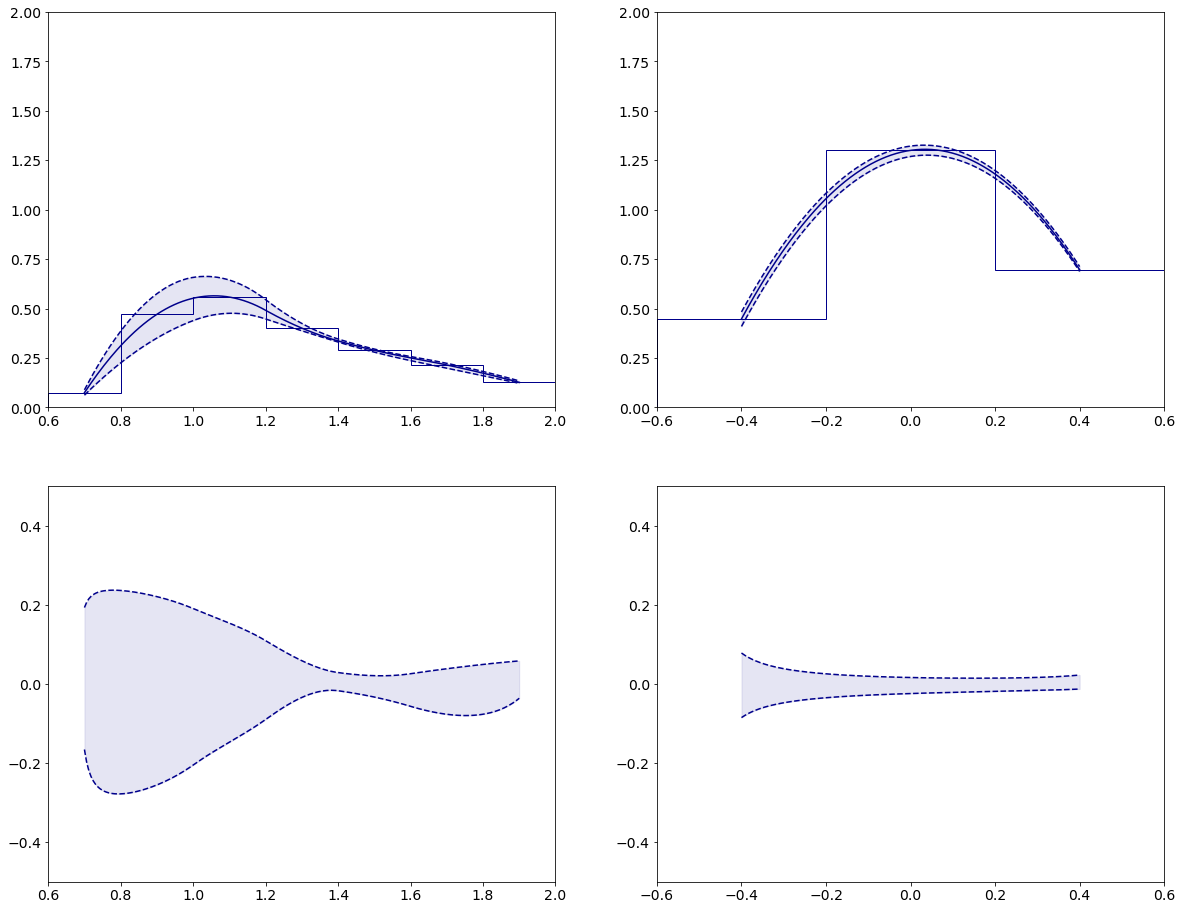

In [105]:
# label_ = "GGToWW-AQGC-A0W2e-6"

labels_xi_ = [ "_nom", "_p100", "_m100" ]
variations_ = []
for label0_ in labels_xi_:
    for label1_ in [ "_nom" ]:
        variations_.append( label0_ + label1_ )

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

# vars_ = {}
# vars_[ "R_MWW_MX" ] = {}
# vars_[ "R_MWW_MX" ][ "bins" ]  = 30
# vars_[ "R_MWW_MX" ][ "range" ] = (0.,3.)
# vars_[ "R_MWW_MX" ][ "xlim" ]  = (0.5,2.)
# # vars_[ "R_MWW_MX" ][ "bins" ]  = 0.5 + 0.2 * np.arange( 9 )
# # vars_[ "R_MWW_MX" ][ "range" ] = None
# # vars_[ "R_MWW_MX" ][ "xlim" ]  = ( 0.5, 2.1 )
# vars_[ "Diff_YWW_YX" ] = {}
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = 20
# vars_[ "Diff_YWW_YX" ][ "range" ] = (-1.,1.)
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = (-1.,1.)
# # vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1.1 + 0.2 * np.arange( 12 )
# # vars_[ "Diff_YWW_YX" ][ "range" ] = None
# # vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -1.1, 1.1 )

# ylim_ = (0.,0.2)
# ylim_ = (0.,0.5)
# ylim_ = (0.,1.)
ylim_ = (0.,2.)
# ylim_ = (0.,3.)
# ylim_ = (0.,5.)
ylim_ratio_ = (-0.50,0.50)

color_ = "darkblue"

relative_uncertainty_ = True

max_, min_ = plot_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variables=vars_,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False,
    label=label_ref_,
    var_info=vars_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_,
    relative_uncertainty=relative_uncertainty_)

max_var_xi_ = {}
min_var_xi_ = {}
max_var_xi_["arm0"] = max_
min_var_xi_["arm0"] = min_

In [106]:
max_variations[ "proton_scale_arm0" ] = max_
min_variations[ "proton_scale_arm0" ] = min_
print ( max_variations )
print ( min_variations )

{'jes': {'R_MWW_MX': array([0.07748704, 0.47138011, 0.5605473 , 0.4021396 , 0.29115238,
       0.21458734, 0.12557436]), 'Diff_YWW_YX': array([0.45139565, 1.30515737, 0.69461149])}, 'jer': {'R_MWW_MX': array([0.07631036, 0.47085302, 0.55799856, 0.40143048, 0.28891658,
       0.21464278, 0.12937246]), 'Diff_YWW_YX': array([0.44491652, 1.30791644, 0.69863452])}, 'sf_muon_id': {'R_MWW_MX': array([0.07439913, 0.47235695, 0.55981477, 0.4022856 , 0.28979285,
       0.21529852, 0.12706518]), 'Diff_YWW_YX': array([0.44876693, 1.30458613, 0.69834888])}, 'proton_scale_arm0': {'R_MWW_MX': array([0.08861405, 0.57507583, 0.64413045, 0.42466567, 0.29509066,
       0.22300927, 0.1340128 ]), 'Diff_YWW_YX': array([0.48270225, 1.32201649, 0.71230161])}}
{'jes': {'R_MWW_MX': array([0.07423491, 0.46679488, 0.55747148, 0.40021304, 0.28891658,
       0.21245095, 0.1240923 ]), 'Diff_YWW_YX': array([0.4429964 , 1.30032837, 0.69182629])}, 'jer': {'R_MWW_MX': array([0.07423491, 0.46934362, 0.55731839, 0.4009221

GGToWW-AQGC-A0W2e-6
R_MWW_MX
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
[0.09436609 0.56450322 0.6357209  0.4039748  0.30142072 0.23655716
 0.15231169]
[0.07016623 0.35049721 0.4884329  0.39189706 0.2747924  0.18612549
 0.11135251]
0      0.271182
1      0.260751
2      0.253439
3      0.247961
4      0.243650
         ...   
195    0.184040
196    0.188544
197    0.193251
198    0.198175
199    0.203335
Length: 200, dtype: float64 0.11706733235457856
0     -0.054808
1     -0.114329
2     -0.154300
3     -0.182745
4     -0.203817
         ...   
195   -0.133968
196   -0.131060
197   -0.127823
198   -0.124232
199   -0.120262
Length: 200, dtype: float64 -0.12806921045767886
Diff_YWW_YX
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
[0.46785234 1.3312275  0.71823614]
[0.44282854 1.25706818 0.66663246]
0      0.045562
1      0.044446
2      0.043413
3      0.042454
4      0.041562
         ...   
195    0.030311
196    0.030593
197    0.030890
198    0.031201
199    0

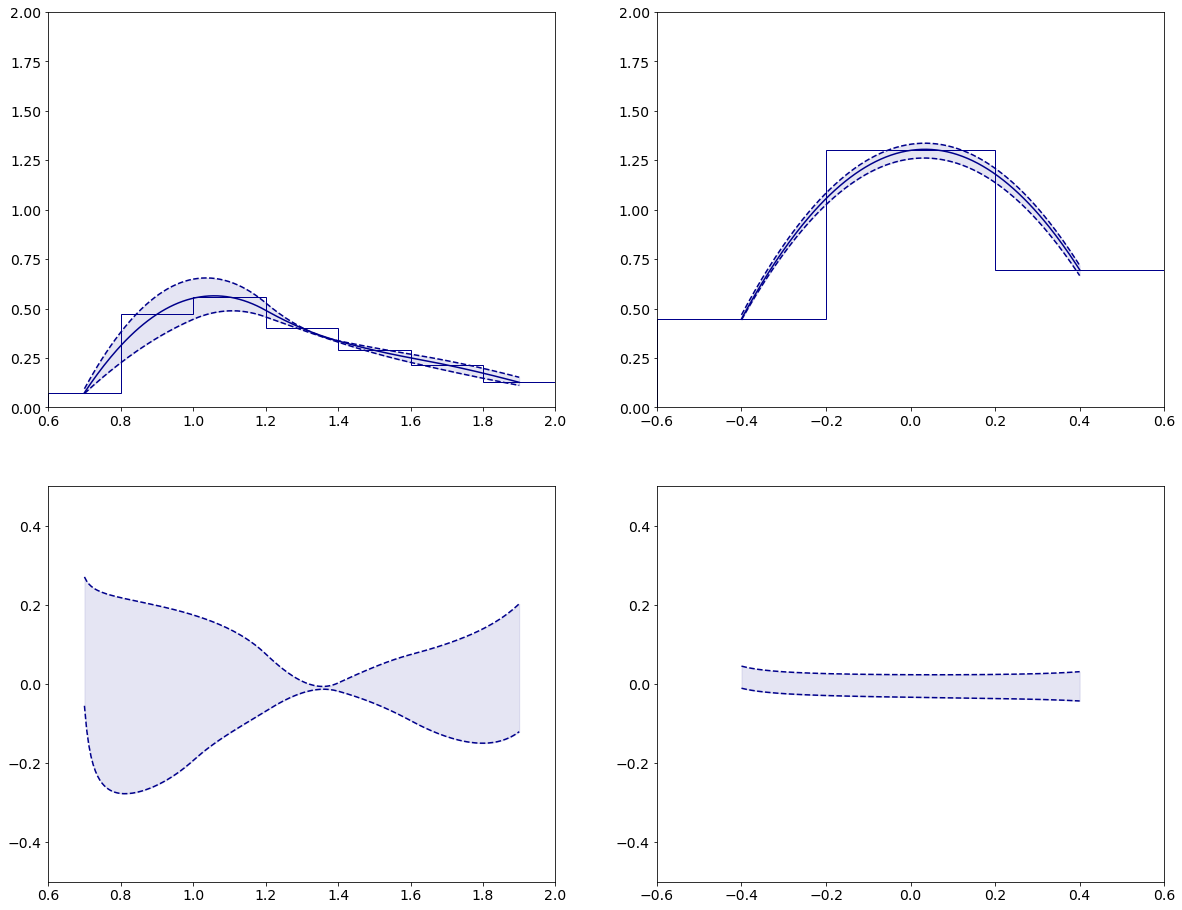

In [107]:
variations_ = []

for label0_ in [ "_nom" ]:
    for label1_ in labels_xi_:
        variations_.append( label0_ + label1_ )

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

max_, min_ = plot_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variables=vars_,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False,
    label=label_ref_,
    var_info=vars_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_,
    relative_uncertainty=relative_uncertainty_)

max_var_xi_["arm1"] = max_
min_var_xi_["arm1"] = min_

In [108]:
max_variations[ "proton_scale_arm1" ] = max_
min_variations[ "proton_scale_arm1" ] = min_
print ( max_variations )
print ( min_variations )

{'jes': {'R_MWW_MX': array([0.07748704, 0.47138011, 0.5605473 , 0.4021396 , 0.29115238,
       0.21458734, 0.12557436]), 'Diff_YWW_YX': array([0.45139565, 1.30515737, 0.69461149])}, 'jer': {'R_MWW_MX': array([0.07631036, 0.47085302, 0.55799856, 0.40143048, 0.28891658,
       0.21464278, 0.12937246]), 'Diff_YWW_YX': array([0.44491652, 1.30791644, 0.69863452])}, 'sf_muon_id': {'R_MWW_MX': array([0.07439913, 0.47235695, 0.55981477, 0.4022856 , 0.28979285,
       0.21529852, 0.12706518]), 'Diff_YWW_YX': array([0.44876693, 1.30458613, 0.69834888])}, 'proton_scale_arm0': {'R_MWW_MX': array([0.08861405, 0.57507583, 0.64413045, 0.42466567, 0.29509066,
       0.22300927, 0.1340128 ]), 'Diff_YWW_YX': array([0.48270225, 1.32201649, 0.71230161])}, 'proton_scale_arm1': {'R_MWW_MX': array([0.09436609, 0.56450322, 0.6357209 , 0.4039748 , 0.30142072,
       0.23655716, 0.15231169]), 'Diff_YWW_YX': array([0.46785234, 1.3312275 , 0.71823614])}}
{'jes': {'R_MWW_MX': array([0.07423491, 0.46679488, 0.55747

GGToWW-AQGC-A0W2e-6
R_MWW_MX
[0.09897403 0.61096995 0.67401349 0.4248611  0.30286193 0.23809994
 0.15336499]
[0.06130041 0.30086705 0.45048825 0.38469803 0.27193085 0.18175983
 0.1106938 ]
0      0.333255
1      0.334603
2      0.335177
3      0.335287
4      0.335094
         ...   
195    0.193876
196    0.198072
197    0.202425
198    0.206949
199    0.211657
Length: 200, dtype: float64 0.16450344539392103
0     -0.174237
1     -0.234700
2     -0.275162
3     -0.303828
4     -0.324948
         ...   
195   -0.144379
196   -0.140315
197   -0.135830
198   -0.130891
199   -0.125466
Length: 200, dtype: float64 -0.17625734159970385
Diff_YWW_YX
[0.48817501 1.33810546 0.72345867]
[0.40929537 1.24715464 0.66538774]
0      0.090979
1      0.087894
2      0.085038
3      0.082385
4      0.079916
         ...   
195    0.037071
196    0.037525
197    0.038001
198    0.038502
199    0.039028
Length: 200, dtype: float64 0.03708401258640099
0     -0.085302
1     -0.083113
2     -0.081085
3     -0

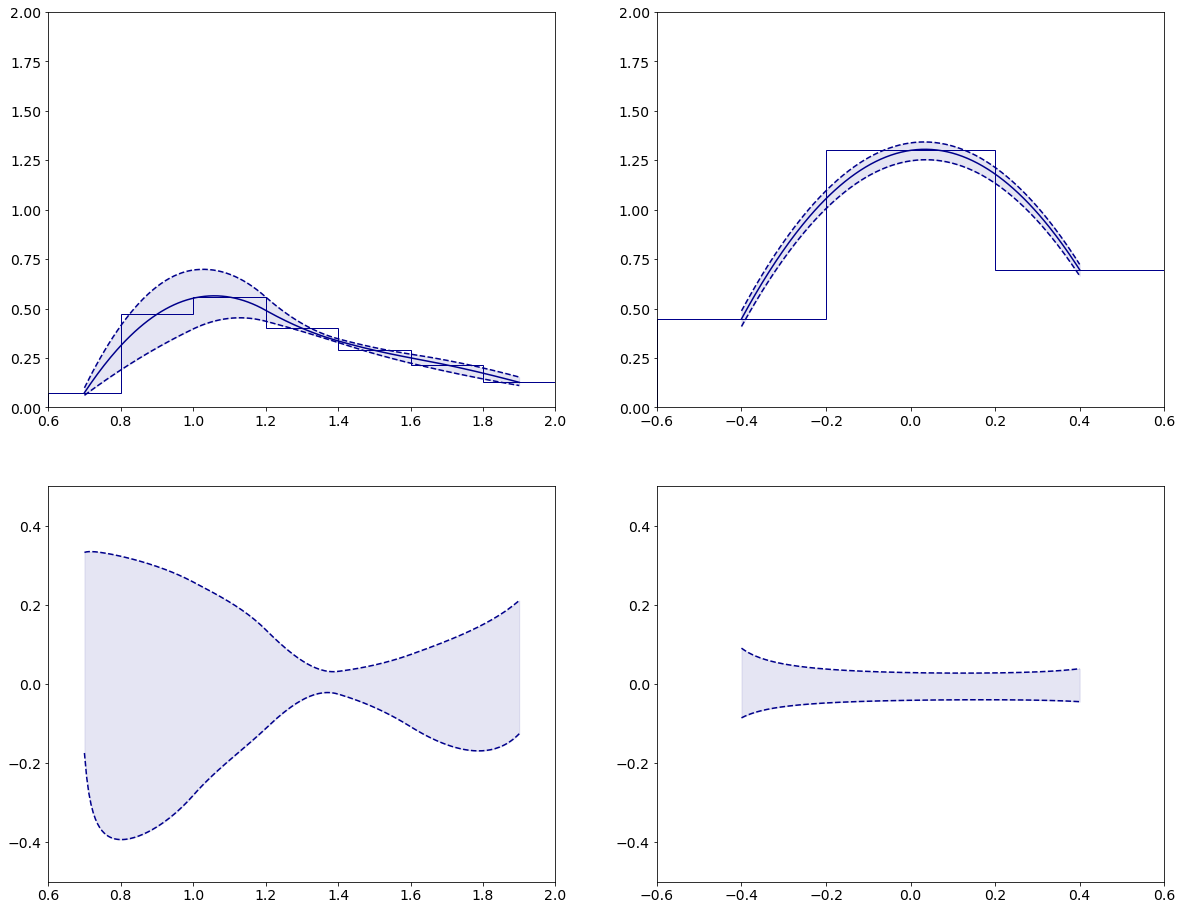

In [109]:
spline_nom_ = {}
spline_max_ = {}
spline_min_ = {}
spline_nom_arr_ = {}
spline_max_arr_ = {}
spline_min_arr_ = {}

idx_row_ = 0
idx_col_ = 0

fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

label_ = label_ref_
print ( label_ )
for var__ in vars_:
    print ( var__ )
    idx_row_ = 0
    df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
    weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ "_nom" ]
    arr__ = df__[ var__ + "_nom" ]

    arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
    msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
    arr__ = arr__.loc[ msk__ ]
    weights__ = weights__.loc[ msk__ ]
    counts_, bins_, _ = axes[idx_row_,idx_col_].hist( arr__,
                                                      weights=weights__,
                                                      histtype='step', color=color_, linestyle="-", label="_nom",
                                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
    __max__ = ( counts_ +
                np.sqrt( ( max_var_xi_[ "arm0" ][ var__ ] - counts_ ) ** 2 +
                         ( max_var_xi_[ "arm1" ][ var__ ] - counts_ ) ** 2 ) )
    __min__ = ( counts_ -
                np.sqrt( ( counts_ - min_var_xi_[ "arm0" ][ var__ ] ) ** 2 +
                         ( counts_ - min_var_xi_[ "arm1" ][ var__ ] ) ** 2 ) )
    print ( __max__ )
    print ( __min__ )
    
    bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2
    
    spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
    spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
    spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
    x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
    spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
    spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
    spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
    
    axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
    axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
    axes[idx_row_,idx_col_].set_ylim( ylim_ )

    idx_row_ = 1
    if relative_uncertainty_:
        ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_max_sel_ = pd.Series( ratio_max_ )
        ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        ratio_min_sel_ = pd.Series( ratio_min_ )
        ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        print ( ratio_max_sel_, ratio_max_sel_.mean() )
        print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
    else:
        diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
#     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
    axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
    axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
    idx_col_ += 1

In [110]:
# sum_weights_cut = {}
# sum_weights_squared_cut = {}
# sum_weights_cut_max = {}
# sum_weights_cut_min = {}
# for label_ in labels_signals:
#     print ( label_ )
#     sum_weights_cut_max_ = None
#     sum_weights_cut_min_ = None
#     for idx_, variation__ in enumerate( variations_ ):
#         if variation__ != "_nom":
#             print ( variation__ )
#             df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ sel_str__[ variation__ ] ]
#             weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ sel_str__[ variation__ ] ]
#             arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + variation__ ]
#             arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + variation__ ]
#             msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 1.0 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
#             sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
#             if sum_weights_cut_max_ is None:
#                 sum_weights_cut_max_ = sum_weights_cut__
#             if sum_weights_cut_min_ is None:
#                 sum_weights_cut_min_ = sum_weights_cut__
#             if sum_weights_cut__ > sum_weights_cut_max_:
#                 sum_weights_cut_max_ = sum_weights_cut__
#             if sum_weights_cut__ < sum_weights_cut_min_:
#                 sum_weights_cut_min_ = sum_weights_cut__

#     df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
#     weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ "_nom" ]
#     weights_squared__ = ( weights__ ** 2 )
#     arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + "_nom" ]
#     arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + "_nom" ]
#     msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 1.0 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
#     sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
#     sum_weights_squared_cut__ = np.sum( weights_squared__.loc[ msk__ ] )
#     print ( "{} ± {}".format( sum_weights_cut__, np.sqrt( sum_weights_squared_cut__ ) ) )
#     print ( sum_weights_cut_max_ )
#     print ( sum_weights_cut_min_ )
#     sum_weights_cut[ label_ ] = sum_weights_cut__
#     sum_weights_squared_cut[ label_ ] = sum_weights_squared_cut__
#     sum_weights_cut_max[ label_ ] = sum_weights_cut_max_
#     sum_weights_cut_min[ label_ ] = sum_weights_cut_min_
    
# print ( sum_weights_cut )
# print ( sum_weights_squared_cut )
# print ( sum_weights_cut_max )
# print ( sum_weights_cut_min )

In [111]:
variations_ = []
for label0_ in labels_xi_:
    for label1_ in [ "_nom" ]:
        variations_.append( label0_ + label1_ )
sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

print ( variations_ )
print ( sel_str__ )

sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

['_nom_nom', '_p100_nom', '_m100_nom']
{'_nom_nom': '_nom', '_p100_nom': '_nom', '_m100_nom': '_nom'}
GGToWW-AQGC-A0W1e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
0.7251809904951909 ± 0.031558294852632535
0.7390682465390844
0.704647330536427
GGToWW-AQGC-A0W2e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
2.3410995820707177 ± 0.06756109847375802
2.3576531150015563
2.3171626293299306
GGToWW-AQGC-A0W5e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
14.078390027354333 ± 0.2512306604397186
14.232453826412938
13.907164029276101
{'GGToWW-AQGC-A0W1e-6': 0.7251809904951909, 'GGToWW-AQGC-A0W2e-6': 2.3410995820707177, 'GGToWW-AQGC-A0W5e-6': 14.078390027354333}
{'GGToWW-AQGC-A0W1e-6': 0.000995925974005693, 'GGToWW-AQGC-A0W2e-6': 0.004564502026980828, 'GGToWW-AQGC-A0W5e-6': 0.0631168447449772}
{'GGToWW-AQGC-A0W1e-6': 0.7390682465390844, 'GGToWW-AQGC-A0W2e-6': 2.3576531150015563, 'GGToWW-AQGC-A0W5e-6': 14.232453826412938}
{'GGToWW-AQGC-A0W1e-6': 0.70464733053642

In [112]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale_arm0" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_scale_arm0" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-A0W1e-6': {'central': 0.7251809904951909, 'stat': 0.031558294852632535, 'syst_up_jes': 0.0006423775003112642, 'syst_dw_jes': 0.00041493218902999285, 'syst_up_jer': 0.00033838493724758223, 'syst_dw_jer': -0.0010784210725038879, 'syst_up_sf_muon_id': 0.002269535664552569, 'syst_dw_sf_muon_id': -0.002269535664552458, 'syst_up_proton_scale_arm0': 0.013887256043893514, 'syst_dw_proton_scale_arm0': -0.020533659958763884}, 'GGToWW-AQGC-A0W2e-6': {'central': 2.3410995820707177, 'stat': 0.06756109847375802, 'syst_up_jes': 0.002324799528209631, 'syst_dw_jes': -0.007282767303832927, 'syst_up_jer': 0.002117693983089808, 'syst_dw_jer': -0.002900601438173389, 'syst_up_sf_muon_id': 0.0074300386149124265, 'syst_dw_sf_muon_id': -0.0074300386149124265, 'syst_up_proton_scale_arm0': 0.01655353293083861, 'syst_dw_proton_scale_arm0': -0.02393695274078711}, 'GGToWW-AQGC-A0W5e-6': {'central': 14.078390027354333, 'stat': 0.2512306604397186, 'syst_up_jes': 0.03855979616689531, 'syst_dw_jes': -0.07

In [113]:
variations_ = []
for label0_ in [ "_nom" ]:
    for label1_ in labels_xi_:
        variations_.append( label0_ + label1_ )
sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

print ( variations_ )
print ( sel_str__ )

sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

['_nom_nom', '_nom_p100', '_nom_m100']
{'_nom_nom': '_nom', '_nom_p100': '_nom', '_nom_m100': '_nom'}
GGToWW-AQGC-A0W1e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
0.7251809904951909 ± 0.031558294852632535
0.7387753311716456
0.7159001246735367
GGToWW-AQGC-A0W2e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
2.3410995820707177 ± 0.06756109847375802
2.371956983844873
2.290388010988244
GGToWW-AQGC-A0W5e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
14.078390027354333 ± 0.2512306604397186
14.322368088533963
13.841050353788658
{'GGToWW-AQGC-A0W1e-6': 0.7251809904951909, 'GGToWW-AQGC-A0W2e-6': 2.3410995820707177, 'GGToWW-AQGC-A0W5e-6': 14.078390027354333}
{'GGToWW-AQGC-A0W1e-6': 0.000995925974005693, 'GGToWW-AQGC-A0W2e-6': 0.004564502026980828, 'GGToWW-AQGC-A0W5e-6': 0.0631168447449772}
{'GGToWW-AQGC-A0W1e-6': 0.7387753311716456, 'GGToWW-AQGC-A0W2e-6': 2.371956983844873, 'GGToWW-AQGC-A0W5e-6': 14.322368088533963}
{'GGToWW-AQGC-A0W1e-6': 0.7159001246735367

In [114]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale_arm1" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_scale_arm1" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-A0W1e-6': {'central': 0.7251809904951909, 'stat': 0.031558294852632535, 'syst_up_jes': 0.0006423775003112642, 'syst_dw_jes': 0.00041493218902999285, 'syst_up_jer': 0.00033838493724758223, 'syst_dw_jer': -0.0010784210725038879, 'syst_up_sf_muon_id': 0.002269535664552569, 'syst_dw_sf_muon_id': -0.002269535664552458, 'syst_up_proton_scale_arm0': 0.013887256043893514, 'syst_dw_proton_scale_arm0': -0.020533659958763884, 'syst_up_proton_scale_arm1': 0.013594340676454708, 'syst_dw_proton_scale_arm1': -0.009280865821654216}, 'GGToWW-AQGC-A0W2e-6': {'central': 2.3410995820707177, 'stat': 0.06756109847375802, 'syst_up_jes': 0.002324799528209631, 'syst_dw_jes': -0.007282767303832927, 'syst_up_jer': 0.002117693983089808, 'syst_dw_jer': -0.002900601438173389, 'syst_up_sf_muon_id': 0.0074300386149124265, 'syst_dw_sf_muon_id': -0.0074300386149124265, 'syst_up_proton_scale_arm0': 0.01655353293083861, 'syst_dw_proton_scale_arm0': -0.02393695274078711, 'syst_up_proton_scale_arm1': 0.030857

In [115]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale" ]    =  np.sqrt( sum_weights[ label_ ][ "syst_up_proton_scale_arm0" ] ** 2 +
                                                                   sum_weights[ label_ ][ "syst_up_proton_scale_arm1" ] ** 2 )
    sum_weights[ label_ ][ "syst_dw_proton_scale" ]    = -np.sqrt( sum_weights[ label_ ][ "syst_dw_proton_scale_arm0" ] ** 2 +
                                                                   sum_weights[ label_ ][ "syst_dw_proton_scale_arm1" ] ** 2 )
print ( sum_weights )

{'GGToWW-AQGC-A0W1e-6': {'central': 0.7251809904951909, 'stat': 0.031558294852632535, 'syst_up_jes': 0.0006423775003112642, 'syst_dw_jes': 0.00041493218902999285, 'syst_up_jer': 0.00033838493724758223, 'syst_dw_jer': -0.0010784210725038879, 'syst_up_sf_muon_id': 0.002269535664552569, 'syst_dw_sf_muon_id': -0.002269535664552458, 'syst_up_proton_scale_arm0': 0.013887256043893514, 'syst_dw_proton_scale_arm0': -0.020533659958763884, 'syst_up_proton_scale_arm1': 0.013594340676454708, 'syst_dw_proton_scale_arm1': -0.009280865821654216, 'syst_up_proton_scale': 0.019433527185155248, 'syst_dw_proton_scale': -0.02253365619915447}, 'GGToWW-AQGC-A0W2e-6': {'central': 2.3410995820707177, 'stat': 0.06756109847375802, 'syst_up_jes': 0.002324799528209631, 'syst_dw_jes': -0.007282767303832927, 'syst_up_jer': 0.002117693983089808, 'syst_dw_jer': -0.002900601438173389, 'syst_up_sf_muon_id': 0.0074300386149124265, 'syst_dw_sf_muon_id': -0.0074300386149124265, 'syst_up_proton_scale_arm0': 0.016553532930838

GGToWW-AQGC-A0W2e-6
R_MWW_MX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[0.07612473 0.48632811 0.57485896 0.4096291  0.2943822  0.21803708
 0.12742592]
[0.07234509 0.45537793 0.54113817 0.39221522 0.28345096 0.21124847
 0.12572328]
0      0.025457
1      0.027304
2      0.028553
3      0.029451
4      0.030125
         ...   
195    0.008592
196    0.008160
197    0.007706
198    0.007229
199    0.006726
Length: 200, dtype: float64 0.023252133768325148
0     -0.025457
1     -0.027304
2     -0.028553
3     -0.029451
4     -0.030125
         ...   
195   -0.008592
196   -0.008160
197   -0.007706
198   -0.007229
199   -0.006726
Length: 200, dtype: float64 -0.0232521337683222
Diff_YWW_YX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[0.4561448  1.33211153 0.70937159]
[0.43878537 1.26841196 0.68319616]
0      0.019398
1      0.019688
2      0.019957
3      0.020206
4      0.020438
         ...   
195    0.019569
196    0.019389
197    0.019201
198    0.019003
199    0.018797
Length: 

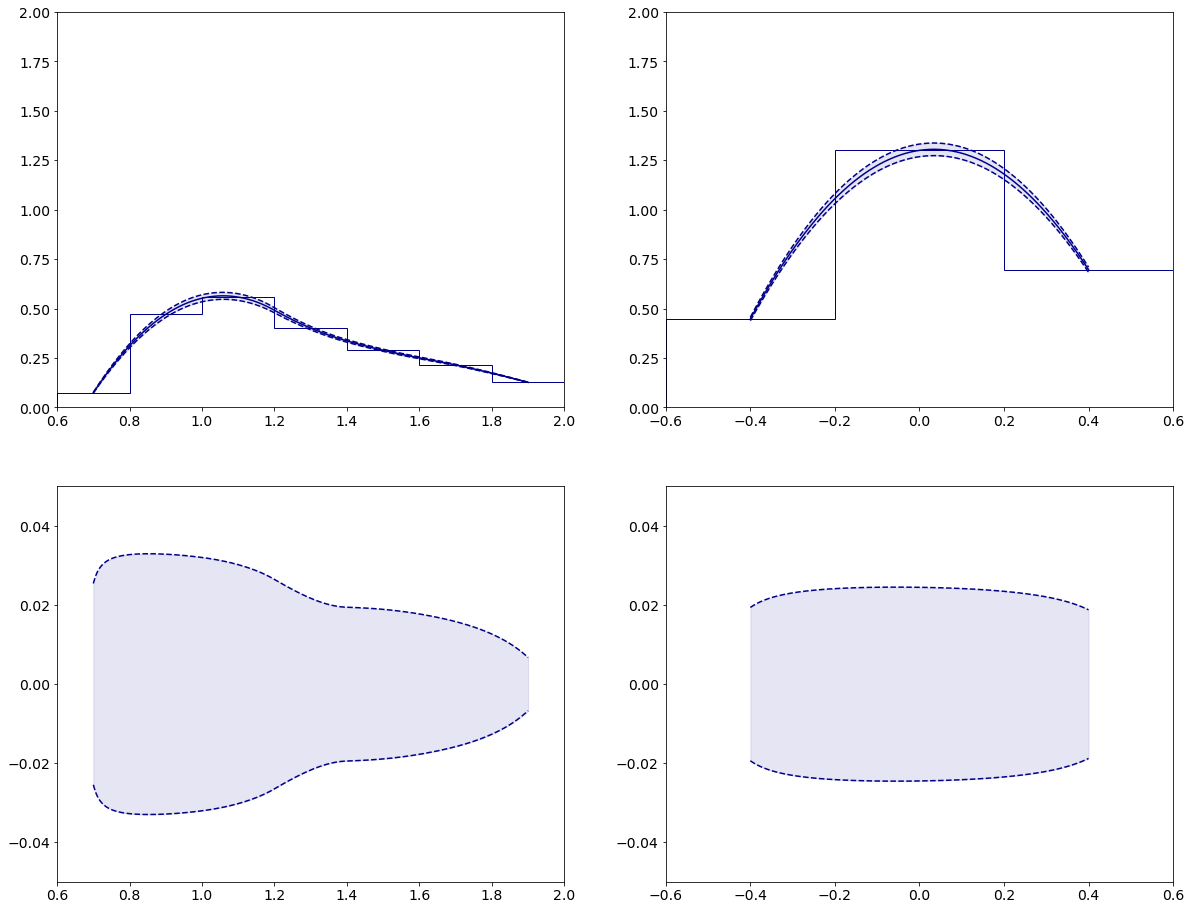

In [116]:
# label_ = "GGToWW-AQGC-A0W2e-6"

variations_weights_ = [ "nom", "proton_eff_up", "proton_eff_dw" ]

relative_uncertainty_ = True

# ylim_ = (0.,1.)
ylim_ = (0.,2.)
ylim_ratio_ = (-0.05,0.05)

color_ = "darkblue"

max_, min_ = plot_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variables=vars_,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True,
    label=label_ref_,
    var_info=vars_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_,
    relative_uncertainty=relative_uncertainty_)

print ( max_, min_ )

In [117]:
max_variations[ "proton_eff" ] = max_
min_variations[ "proton_eff" ] = min_
print ( max_variations )
print ( min_variations )

{'jes': {'R_MWW_MX': array([0.07748704, 0.47138011, 0.5605473 , 0.4021396 , 0.29115238,
       0.21458734, 0.12557436]), 'Diff_YWW_YX': array([0.45139565, 1.30515737, 0.69461149])}, 'jer': {'R_MWW_MX': array([0.07631036, 0.47085302, 0.55799856, 0.40143048, 0.28891658,
       0.21464278, 0.12937246]), 'Diff_YWW_YX': array([0.44491652, 1.30791644, 0.69863452])}, 'sf_muon_id': {'R_MWW_MX': array([0.07439913, 0.47235695, 0.55981477, 0.4022856 , 0.28979285,
       0.21529852, 0.12706518]), 'Diff_YWW_YX': array([0.44876693, 1.30458613, 0.69834888])}, 'proton_scale_arm0': {'R_MWW_MX': array([0.08861405, 0.57507583, 0.64413045, 0.42466567, 0.29509066,
       0.22300927, 0.1340128 ]), 'Diff_YWW_YX': array([0.48270225, 1.32201649, 0.71230161])}, 'proton_scale_arm1': {'R_MWW_MX': array([0.09436609, 0.56450322, 0.6357209 , 0.4039748 , 0.30142072,
       0.23655716, 0.15231169]), 'Diff_YWW_YX': array([0.46785234, 1.3312275 , 0.71823614])}, 'proton_eff': {'R_MWW_MX': array([0.07612473, 0.48632811, 0

In [118]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-A0W1e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
0.7251809904951909 ± 0.031558294852632535
0.7411704865751756
0.7091914944152065
GGToWW-AQGC-A0W2e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
2.3410995820707177 ± 0.06756109847375802
2.3921943345860157
2.2900048295554196
GGToWW-AQGC-A0W5e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
14.078390027354333 ± 0.2512306604397186
14.365671199307677
13.791108855400989
{'GGToWW-AQGC-A0W1e-6': 0.7251809904951909, 'GGToWW-AQGC-A0W2e-6': 2.3410995820707177, 'GGToWW-AQGC-A0W5e-6': 14.078390027354333}
{'GGToWW-AQGC-A0W1e-6': 0.000995925974005693, 'GGToWW-AQGC-A0W2e-6': 0.004564502026980828, 'GGToWW-AQGC-A0W5e-6': 0.0631168447449772}
{'GGToWW-AQGC-A0W1e-6': 0.7411704865751756, 'GGToWW-AQGC-A0W2e-6': 2.3921943345860157, 'GGToWW-AQGC-A0W5e-6': 14.365671199307677}
{'GGToWW-AQGC-A0W1e-6': 0.7091914944152065, 'GGToWW-AQGC-A0W2e-6': 2.2900048295554196, 'GGToWW-AQGC-A0W5e-6': 13.791108855400989}


In [119]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_eff" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_eff" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-A0W1e-6': {'central': 0.7251809904951909, 'stat': 0.031558294852632535, 'syst_up_jes': 0.0006423775003112642, 'syst_dw_jes': 0.00041493218902999285, 'syst_up_jer': 0.00033838493724758223, 'syst_dw_jer': -0.0010784210725038879, 'syst_up_sf_muon_id': 0.002269535664552569, 'syst_dw_sf_muon_id': -0.002269535664552458, 'syst_up_proton_scale_arm0': 0.013887256043893514, 'syst_dw_proton_scale_arm0': -0.020533659958763884, 'syst_up_proton_scale_arm1': 0.013594340676454708, 'syst_dw_proton_scale_arm1': -0.009280865821654216, 'syst_up_proton_scale': 0.019433527185155248, 'syst_dw_proton_scale': -0.02253365619915447, 'syst_up_proton_eff': 0.015989496079984677, 'syst_dw_proton_eff': -0.015989496079984455}, 'GGToWW-AQGC-A0W2e-6': {'central': 2.3410995820707177, 'stat': 0.06756109847375802, 'syst_up_jes': 0.002324799528209631, 'syst_dw_jes': -0.007282767303832927, 'syst_up_jer': 0.002117693983089808, 'syst_dw_jer': -0.002900601438173389, 'syst_up_sf_muon_id': 0.0074300386149124265, 'sy

GGToWW-AQGC-A0W2e-6
R_MWW_MX
[0.07423491 0.47085302 0.55799856 0.40092216 0.28891658 0.21464278
 0.1265746 ]
[0.08592721 0.49731373 0.588335   0.42865965 0.31331754 0.23614828
 0.14405473]
[0.06254261 0.44439232 0.52766213 0.37318467 0.26451562 0.19313728
 0.10909446]
[0.10193358 0.6142927  0.67913415 0.4386296  0.31764843 0.24665339
 0.15871607]
[0.05669611 0.29806447 0.44500706 0.36759404 0.25867484 0.17513923
 0.10280735]
0      0.373122
1      0.367319
2      0.363019
3      0.359596
4      0.356727
         ...   
195    0.233553
196    0.238300
197    0.243267
198    0.248472
199    0.253933
Length: 200, dtype: float64 0.19288502712701486
0     -0.236261
1     -0.284360
2     -0.316400
3     -0.338967
4     -0.355470
         ...   
195   -0.196754
196   -0.194908
197   -0.192808
198   -0.190436
199   -0.187773
Length: 200, dtype: float64 -0.20498936344297242
Diff_YWW_YX
[0.44746509 1.30026175 0.69628388]
[0.47852439 1.34905926 0.73370733]
[0.41640578 1.25146424 0.65886042]
[0.49

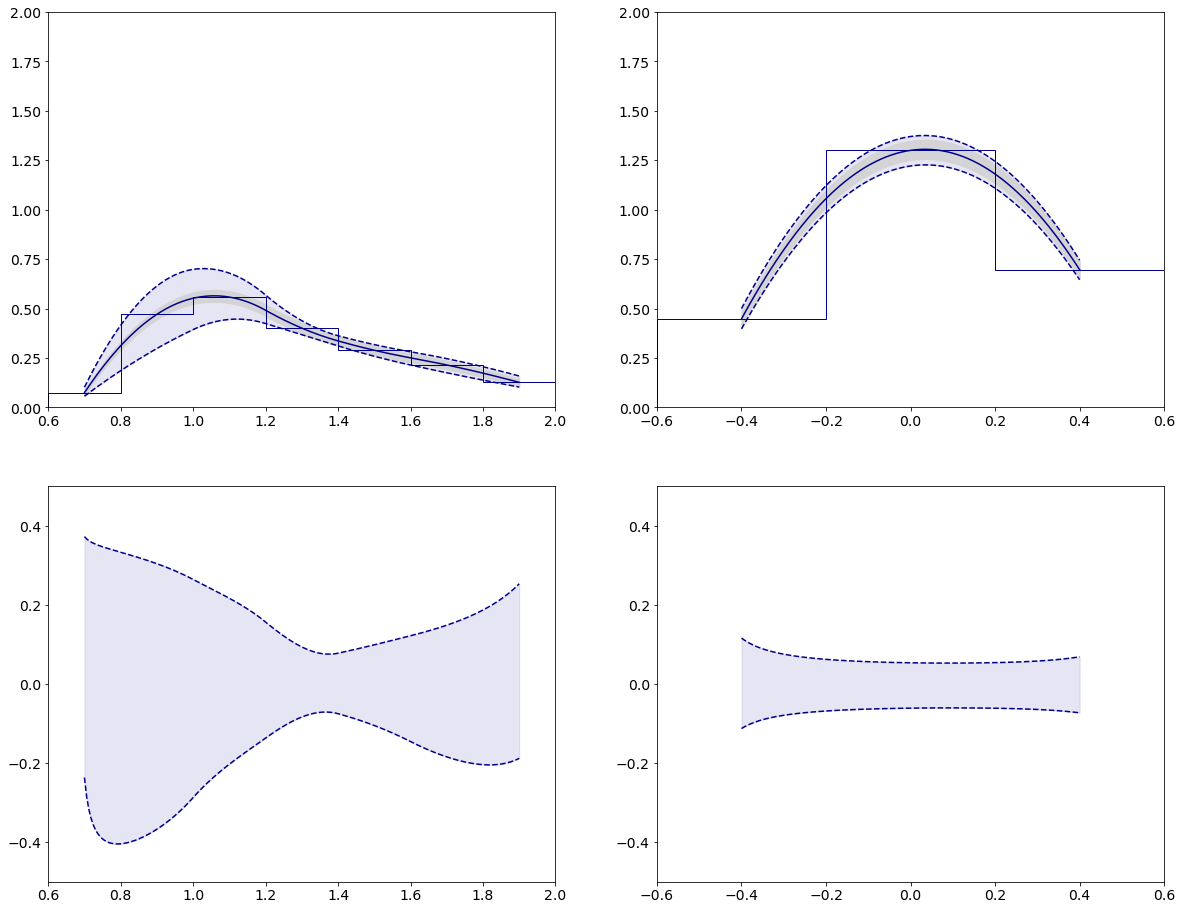

In [120]:
# label_ = "GGToWW-AQGC-A0W2e-6"

color_ = "darkblue"

relative_uncertainty_ = True

# ylim_ = (0.,1.)
ylim_ = (0.,2.)
ylim_ratio_ = (-0.50,0.50)

spline_nom_ = {}
spline_max_ = {}
spline_min_ = {}
spline_max_err_ = {}
spline_min_err_ = {}
spline_nom_arr_ = {}
spline_max_arr_ = {}
spline_min_arr_ = {}
spline_max_err_arr_ = {}
spline_min_err_arr_ = {}

idx_row_ = 0
idx_col_ = 0

fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

label_ = label_ref_
print ( label_ )
for var__ in vars_:
    print ( var__ )
    idx_row_ = 0
    df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
    weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ "_nom" ]
    arr__ = df__[ var__ + "_nom" ]
    
    arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
    msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
    arr__ = arr__.loc[ msk__ ]
    weights__ = weights__.loc[ msk__ ]
    sum_w_, bins_ = np.histogram( arr__, weights=weights__, bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
    sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ), bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

    __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
    __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

    __max__ = ( sum_w_ +
                np.sqrt(
                    ( max_variations[ "jes" ][ var__ ] - sum_w_ ) ** 2 +
                    ( max_variations[ "jer" ][ var__ ] - sum_w_ ) ** 2 +
                    ( max_variations[ "sf_muon_id" ][ var__ ] - sum_w_ ) ** 2 +
                    ( max_variations[ "proton_scale_arm0" ][ var__ ] - sum_w_ ) ** 2 +
                    ( max_variations[ "proton_scale_arm1" ][ var__ ] - sum_w_ ) ** 2 +
                    ( max_variations[ "proton_eff" ][ var__ ] - sum_w_ ) ** 2 +
                    sum_w2_
                    ) )
    __min__ = ( sum_w_ -
                np.sqrt(
                    ( sum_w_ - min_variations[ "jes" ][ var__ ] ) ** 2 +
                    ( sum_w_ - min_variations[ "jer" ][ var__ ] ) ** 2 +
                    ( sum_w_ - min_variations[ "sf_muon_id" ][ var__ ] ) ** 2 +
                    ( sum_w_ - min_variations[ "proton_scale_arm0" ][ var__ ] ) ** 2 +
                    ( sum_w_ - min_variations[ "proton_scale_arm1" ][ var__ ] ) ** 2 +
                    ( sum_w_ - min_variations[ "proton_eff" ][ var__ ] ) ** 2 +
                    sum_w2_
                    ) )
    print ( sum_w_ )
    print ( __max_err__ )
    print ( __min_err__ )
    print ( __max__ )
    print ( __min__ )
    
    bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2
    
    axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                  histtype='step', color=color_, linestyle="-", label="_nom",
                                  bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
#     axes[idx_row_,idx_col_].errorbar( bin_centers_, sum_w_, yerr=np.sqrt( sum_w2_ ),
#                                       color=color_, fmt='o', label="_nom" )

    spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
    spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
    spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
    spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
    spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
    x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
#     x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 100 )
    spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
    spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
    spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
    spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
    spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )
    
    axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
#     axes[idx_row_,idx_col_].plot( x_plot__, spline_max_err_arr_[ var__ ], color=color_, linestyle="--" )
#     axes[idx_row_,idx_col_].plot( x_plot__, spline_min_err_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
    axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
    axes[idx_row_,idx_col_].set_ylim( ylim_ )

    idx_row_ = 1
    if relative_uncertainty_:
        ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_max_sel_ = pd.Series( ratio_max_ )
        ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        ratio_min_sel_ = pd.Series( ratio_min_ )
        ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        print ( ratio_max_sel_, ratio_max_sel_.mean() )
        print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
    else:
        diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
#     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
    axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
    axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
    idx_col_ += 1

In [121]:
def plot_total_systematic( df_dict, weights_dict, label, ylim, ylim_ratio, color ):

    label_ = label
    ylim_ = ylim
    ylim_ratio_ = ylim_ratio
    color_ = color
    
    variations_ = [ "_nom", "_jes_up", "_jes_dw" ]

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = key_

    relative_uncertainty_ = True

    __max_variations = {}
    __min_variations = {}
    
    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)
    
    __max_variations[ "jes" ] = max_
    __min_variations[ "jes" ] = min_
    
    variations_ = [ "_nom", "_jer_up", "_jer_dw" ]

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = key_

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "jer" ] = max_
    __min_variations[ "jer" ] = min_
    
    variations_weights_ = [ "nom", "sf_muon_id_up", "sf_muon_id_dw" ]

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "sf_muon_id" ] = max_
    __min_variations[ "sf_muon_id" ] = min_

    labels_xi_ = [ "_nom", "_p100", "_m100" ]
    variations_ = []
    for label0_ in labels_xi_:
        for label1_ in [ "_nom" ]:
            variations_.append( label0_ + label1_ )

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = "_nom"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_scale_arm0" ] = max_
    __min_variations[ "proton_scale_arm0" ] = min_

    variations_ = []
    for label0_ in [ "_nom" ]:
        for label1_ in labels_xi_:
            variations_.append( label0_ + label1_ )

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = "_nom"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_scale_arm1" ] = max_
    __min_variations[ "proton_scale_arm1" ] = min_

    variations_weights_ = [ "nom", "proton_eff_up", "proton_eff_dw" ]

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_eff" ] = max_
    __min_variations[ "proton_eff" ] = min_

    print ( __max_variations )
    print ( __min_variations )
    
    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_max_err_ = {}
    spline_min_err_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}
    spline_max_err_arr_ = {}
    spline_min_err_arr_ = {}

    idx_row_ = 0
    idx_col_ = 0

    fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    print ( label_ )
    counts__ = {}
    err__ = {}
    bins__ = {}
    max_variations_total__ = {}
    min_variations_total__ = {}
    for var__ in vars_:
        print ( var__ )
        idx_row_ = 0
        df__ = df_dict[ label_ ][ "_nom" ]
        weights__ = weights_dict[ label_ ][ "nom" ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]

        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        sum_w_, bins_ = np.histogram( arr__, weights=weights__,
                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ),
                                    bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

        __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
        __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

        __max__ = ( sum_w_ +
                    np.sqrt(
                        ( __max_variations[ "jes" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "jer" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "sf_muon_id" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_scale_arm0" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_scale_arm1" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_eff" ][ var__ ] - sum_w_ ) ** 2 +
                        sum_w2_
                        ) )
        __min__ = ( sum_w_ -
                    np.sqrt(
                        ( sum_w_ - __min_variations[ "jes" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "jer" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "sf_muon_id" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_scale_arm0" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_scale_arm1" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_eff" ][ var__ ] ) ** 2 +
                        sum_w2_
                        ) )
        print ( sum_w_ )
        print ( __max_err__ )
        print ( __min_err__ )
        print ( __max__ )
        print ( __min__ )
        counts__[ var__ ] = sum_w_
        err__[ var__ ] = np.sqrt( sum_w2_ )
        bins__[ var__ ] = bins_
        max_variations_total__[ var__ ] = __max__
        min_variations_total__[ var__ ] = __min__
        
        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                      histtype='step', color=color_, linestyle="-", label="_nom",
                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        
        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
        spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
        spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
        spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
        spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

        axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
    #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1
        
    return ( counts__, err__, bins__, max_variations_total__, min_variations_total__ )

GGToWW-AQGC-A0W1e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[0.03342762 0.13540762 0.17990874 0.12514508 0.09245784 0.05881167
 0.03693031]
[0.03086897 0.13491213 0.17988159 0.12505655 0.09152135 0.05881167
 0.03520951]
0      0.024240
1      0.020614
2      0.017716
3      0.015352
4      0.013389
         ...   
195    0.036841
196    0.039640
197    0.042576
198    0.045652
199    0.048873
Length: 200, dtype: float64 0.004335803636070901
0     -0.054158
1     -0.047185
2     -0.041588
3     -0.036998
4     -0.033167
         ...   
195    0.001321
196    0.001041
197    0.000728
198    0.000381
199    0.000000
Length: 200, dtype: float64 -0.0039526513758977285
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[0.17582001 0.404037   0.21008306]
[0.17078886 0.40390537 0.20770638]
0      0.018913
1      0.017969
2      0.017079
3      0.016240
4      0.015447
         ...   
195    0.006738
196    0.007156
197    0.007594
198    0.008055
199    0.008538
Length: 200, dtype: f

GGToWW-AQGC-A0W1e-6
R_MWW_MX
[0.03263649 0.13540762 0.17980504 0.12514508 0.09211946 0.05881167
 0.03520951]
[0.03891117 0.14723321 0.19427799 0.1381551  0.10382855 0.06861955
 0.04289142]
[0.02636182 0.12358202 0.1653321  0.11213506 0.08041037 0.0490038
 0.02752759]
[0.04921043 0.18899319 0.21556767 0.13854326 0.10616698 0.06878062
 0.05021352]
[0.02166658 0.10022029 0.13284752 0.11056292 0.07582854 0.04597018
 0.02340763]
0      0.507834
1      0.510629
2      0.512036
3      0.512416
4      0.512009
         ...   
195    0.367532
196    0.381255
197    0.395587
198    0.410543
199    0.426135
Length: 200, dtype: float64 0.2427367612117785
0     -0.336124
1     -0.322947
2     -0.312493
3     -0.304032
4     -0.297074
         ...   
195   -0.311566
196   -0.317164
197   -0.322965
198   -0.328973
199   -0.335190
Length: 200, dtype: float64 -0.2218687745303725
Diff_YWW_YX
[0.17255638 0.40526902 0.20830449]
[0.18842559 0.42830574 0.22538383]
[0.15668718 0.38223229 0.19122514]
[0.19187

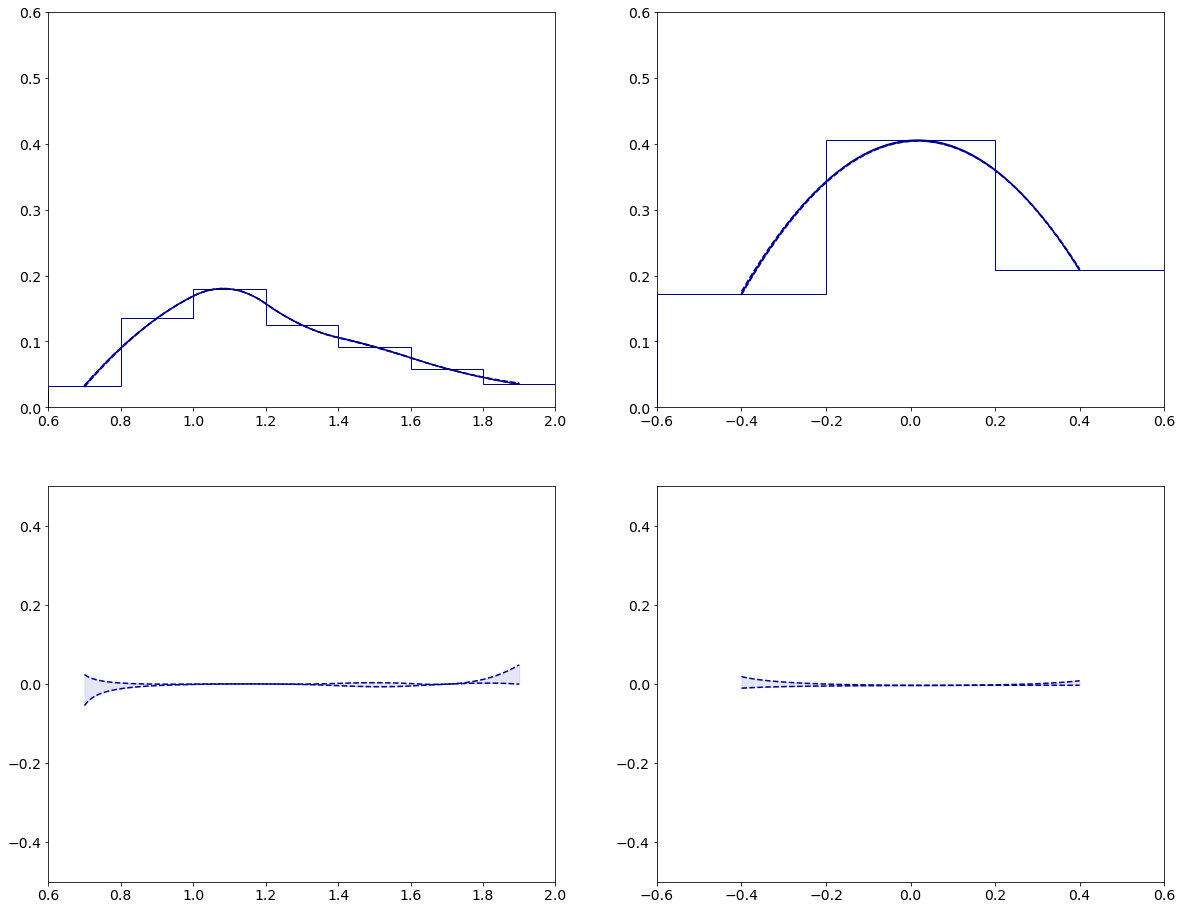

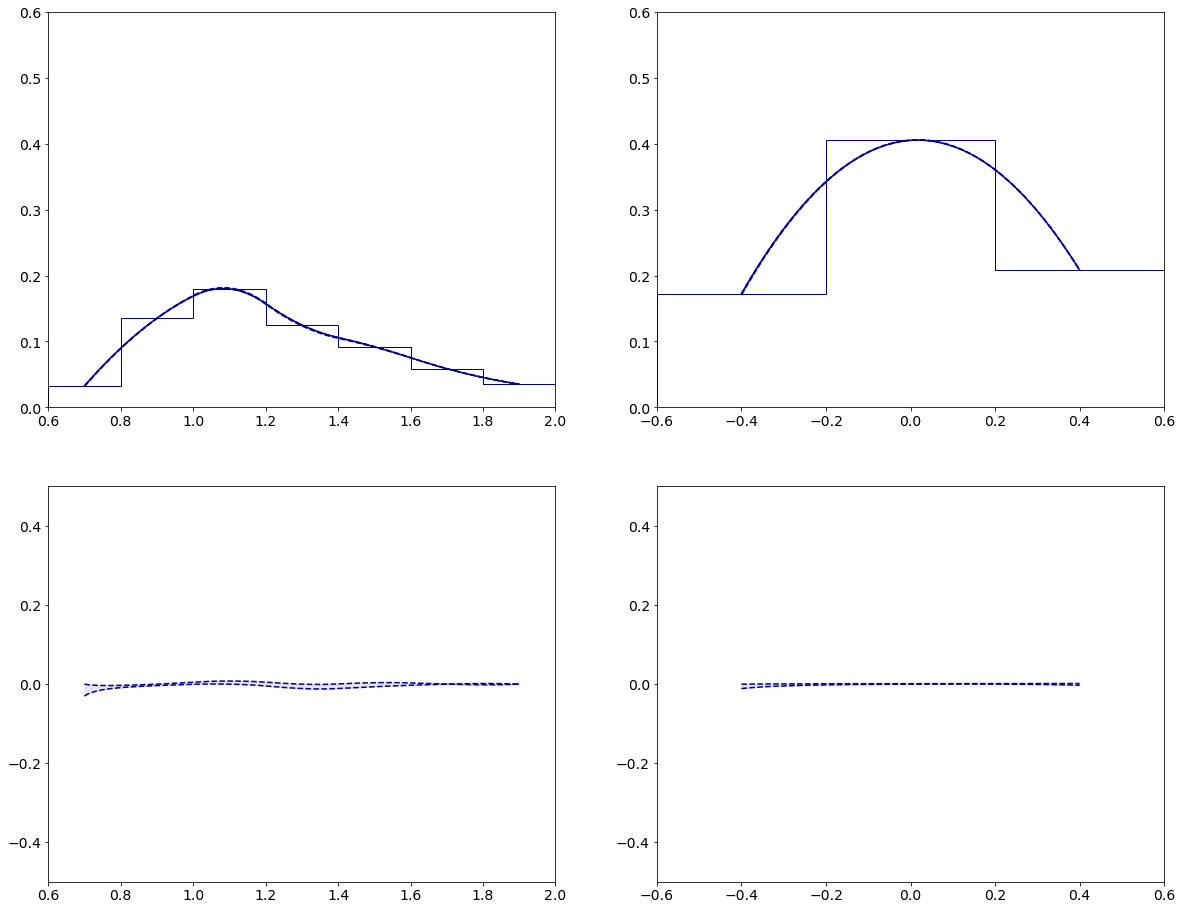

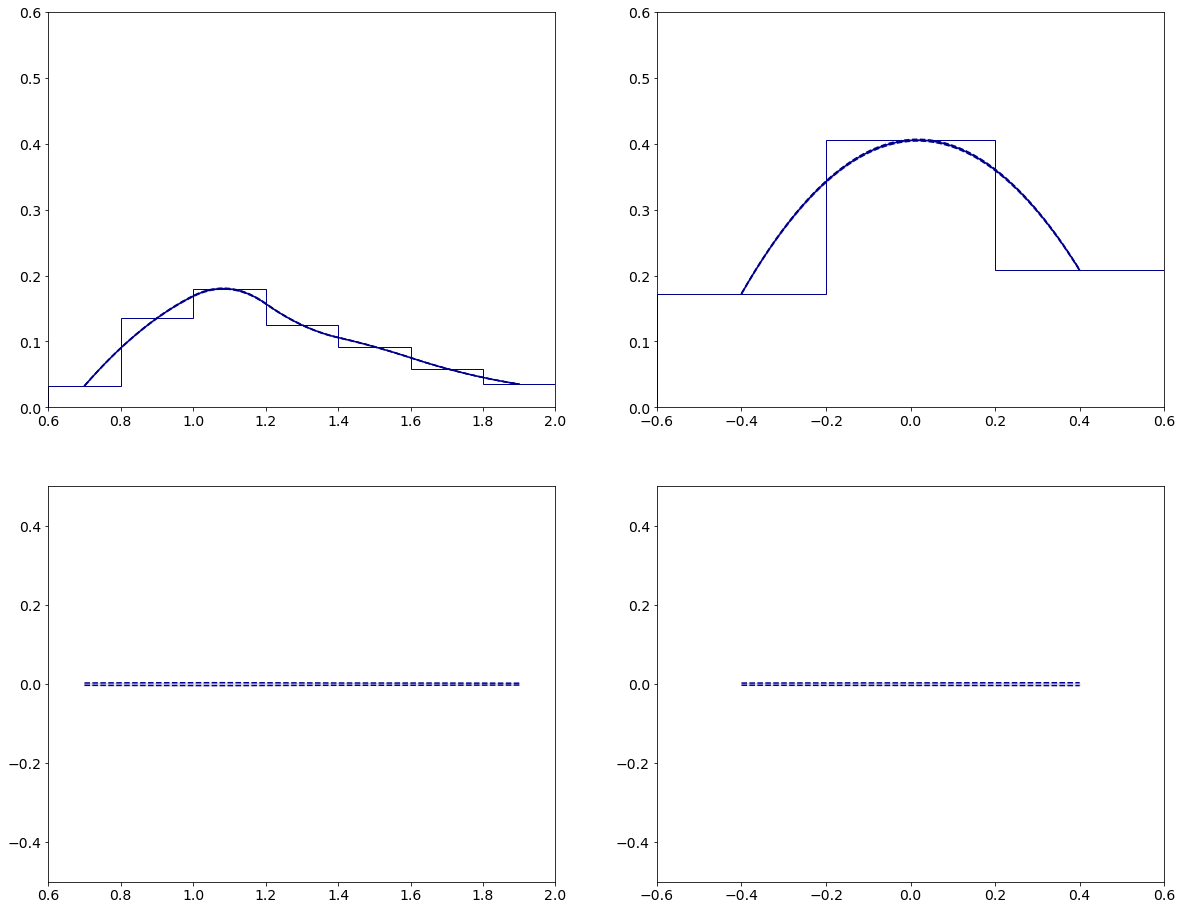

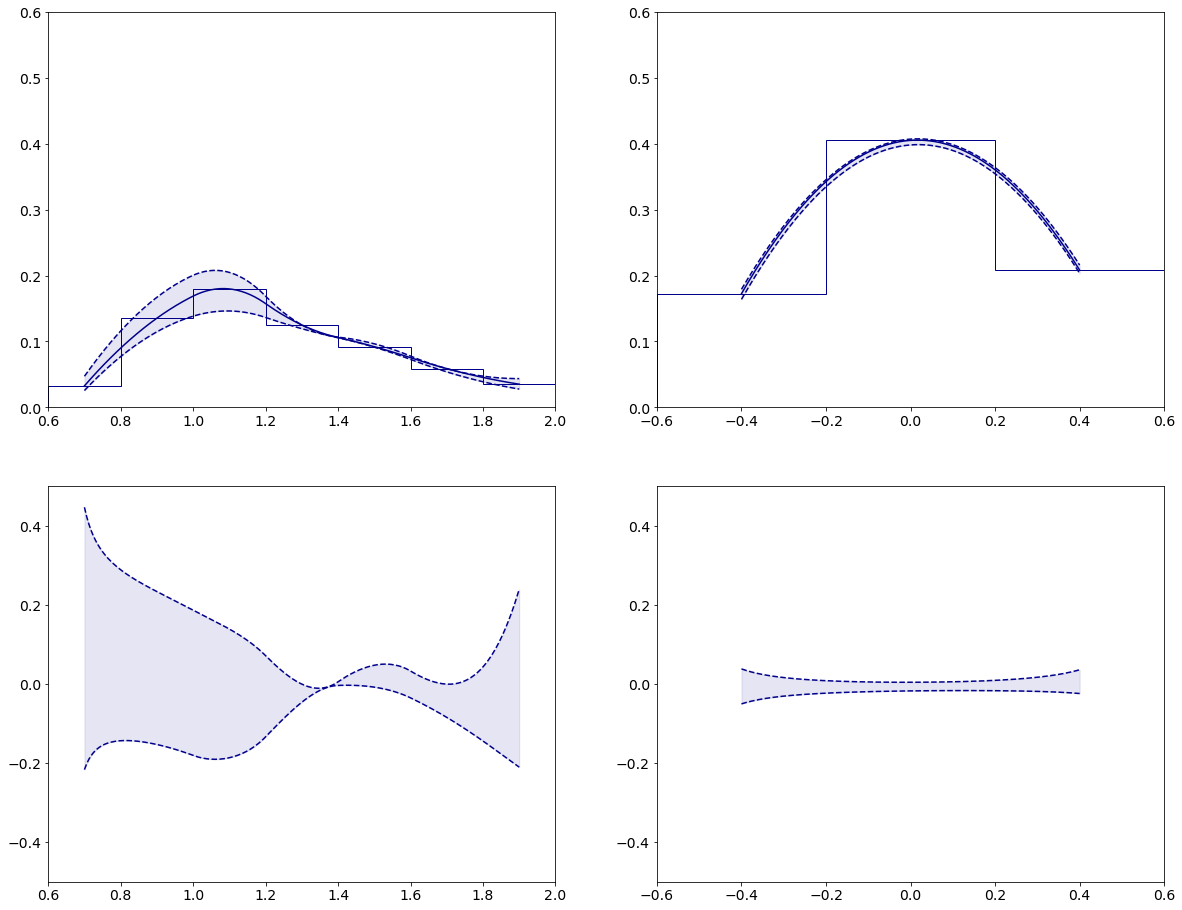

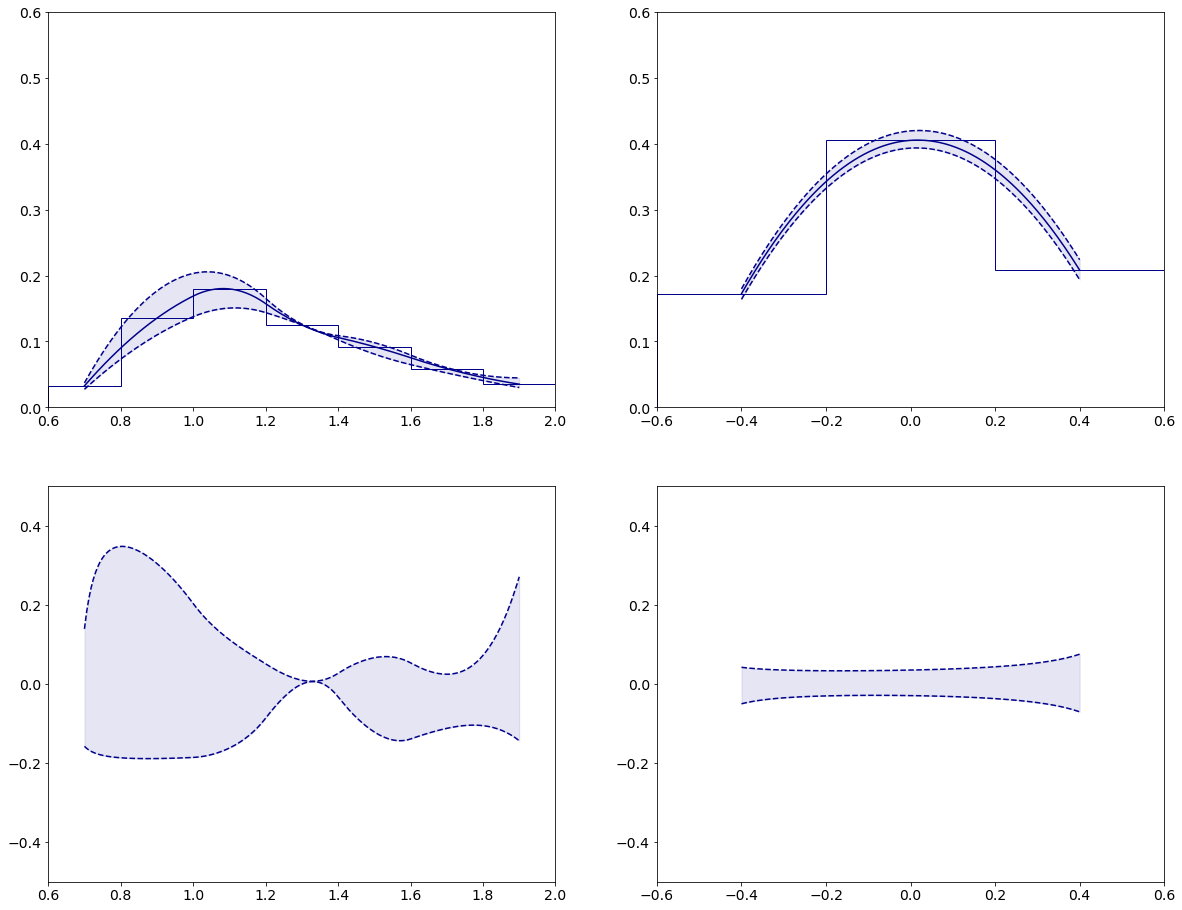

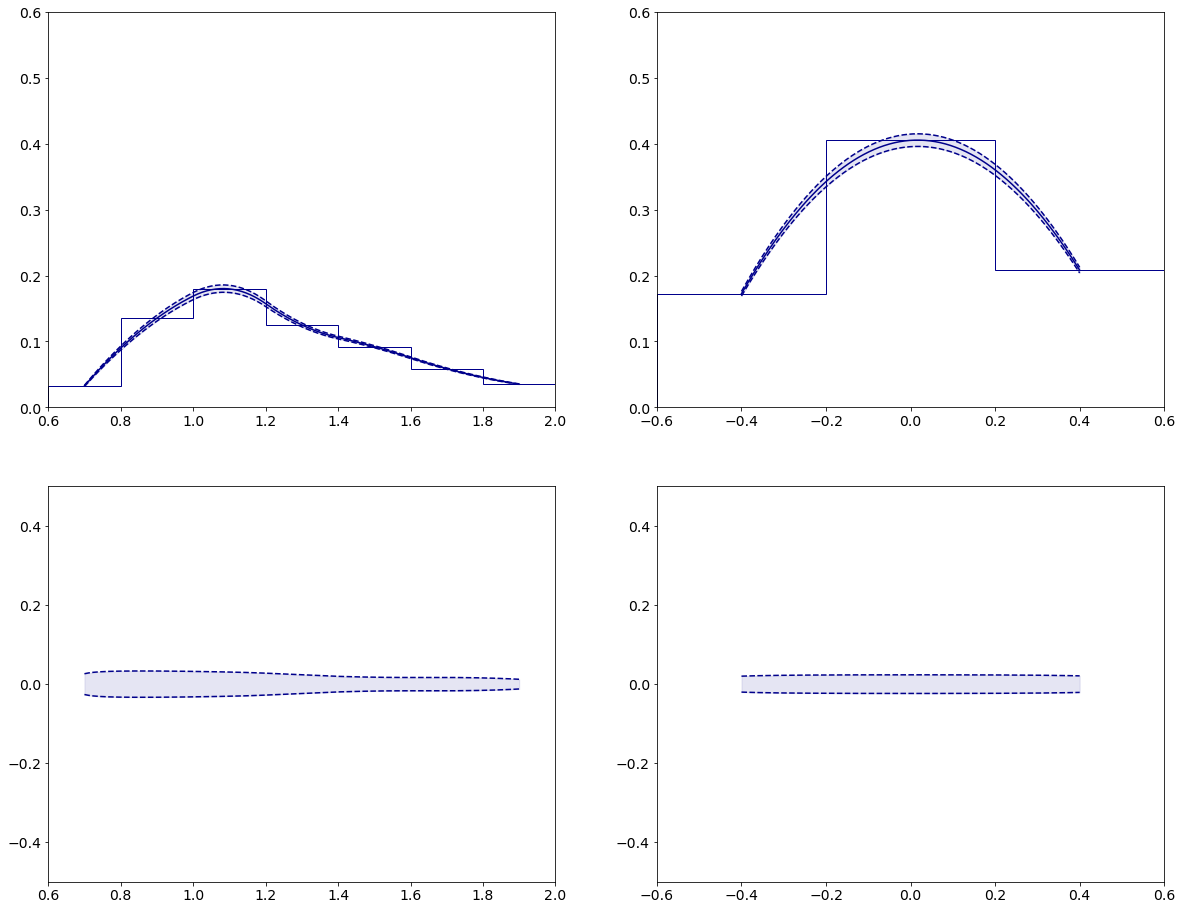

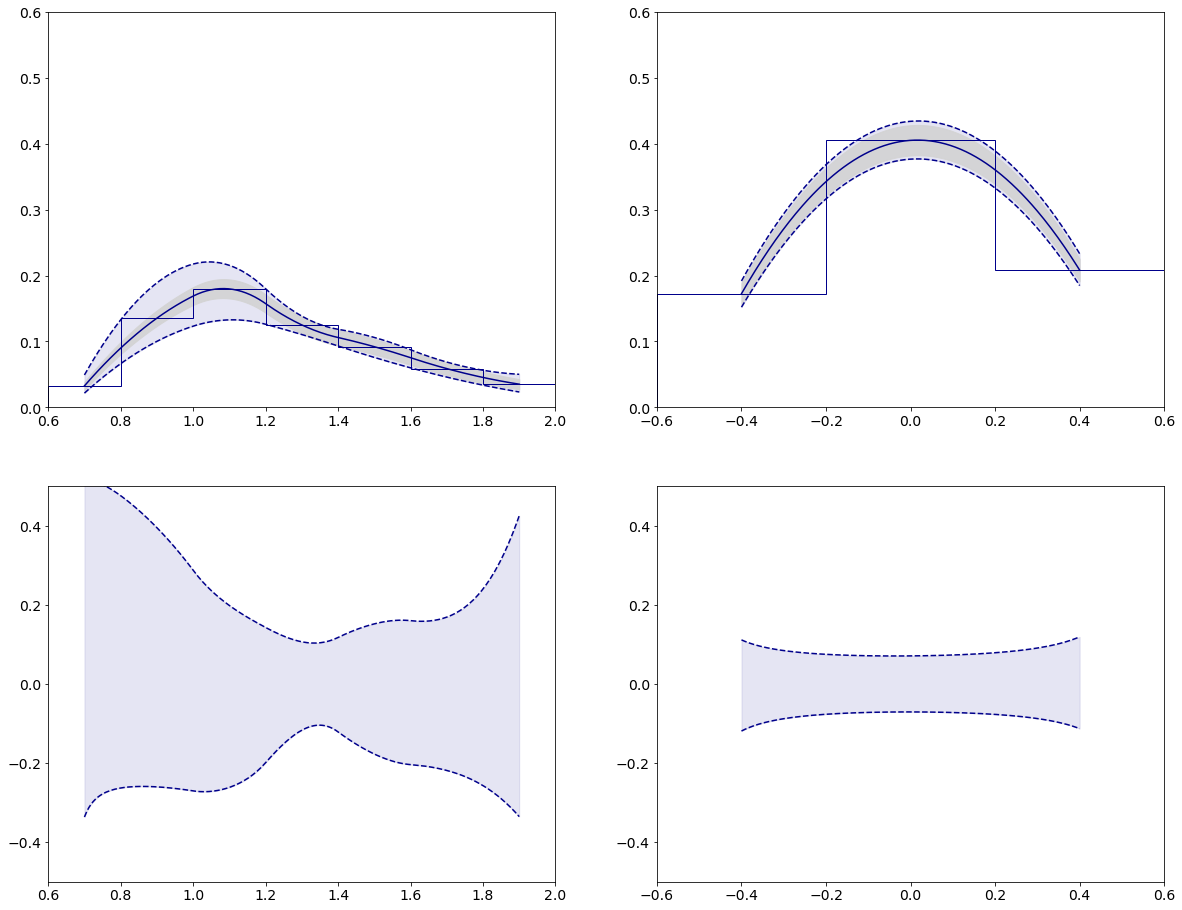

In [122]:
# ylim_ = (0.,0.3)
ylim_ = (0.,0.6)
ylim_ratio_ = (-0.50,0.50)
color_ = "darkblue"

counts = {}
err = {}
bins = {}
max_variations_total = {}
min_variations_total = {}

label_ = "GGToWW-AQGC-A0W1e-6"

counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )

GGToWW-AQGC-A0W2e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[0.07748704 0.47138011 0.5605473  0.4021396  0.29115238 0.21458734
 0.12557436]
[0.07423491 0.46679488 0.55747148 0.40021304 0.28891658 0.21245095
 0.1240923 ]
0      0.043809
1      0.033907
2      0.027181
3      0.022326
4      0.018666
         ...   
195   -0.007308
196   -0.007469
197   -0.007622
198   -0.007767
199   -0.007902
Length: 200, dtype: float64 0.0033712323583304092
0      0.000000
1     -0.002909
2     -0.004852
3     -0.006226
4     -0.007236
         ...   
195   -0.018794
196   -0.019010
197   -0.019219
198   -0.019419
199   -0.019611
Length: 200, dtype: float64 -0.005852781777223764
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[0.45139565 1.30515737 0.69461149]
[0.4429964  1.30032837 0.69182629]
0      0.008784
1      0.008586
2      0.008402
3      0.008231
4      0.008070
         ...   
195   -0.001687
196   -0.001854
197   -0.002029
198   -0.002211
199   -0.002402
Length: 200, dtype: f

{'jes': {'R_MWW_MX': array([0.07423491, 0.46679488, 0.55747148, 0.40021304, 0.28891658,
       0.21245095, 0.1240923 ]), 'Diff_YWW_YX': array([0.4429964 , 1.30032837, 0.69182629])}, 'jer': {'R_MWW_MX': array([0.07423491, 0.46934362, 0.55731839, 0.40092216, 0.28891658,
       0.21464278, 0.1265746 ]), 'Diff_YWW_YX': array([0.44470389, 1.29963451, 0.69350807])}, 'sf_muon_id': {'R_MWW_MX': array([0.07407069, 0.4693491 , 0.55618236, 0.39955872, 0.28804031,
       0.21398704, 0.12608402]), 'Diff_YWW_YX': array([0.44616324, 1.29593737, 0.69421887])}, 'proton_scale_arm0': {'R_MWW_MX': array([0.061957  , 0.35081258, 0.47602853, 0.38743995, 0.27948141,
       0.19827047, 0.12204826]), 'Diff_YWW_YX': array([0.40957802, 1.26936385, 0.68760259])}, 'proton_scale_arm1': {'R_MWW_MX': array([0.07016623, 0.35049721, 0.4884329 , 0.39189706, 0.2747924 ,
       0.18612549, 0.11135251]), 'Diff_YWW_YX': array([0.44282854, 1.25706818, 0.66663246])}, 'proton_eff': {'R_MWW_MX': array([0.07234509, 0.45537793, 0

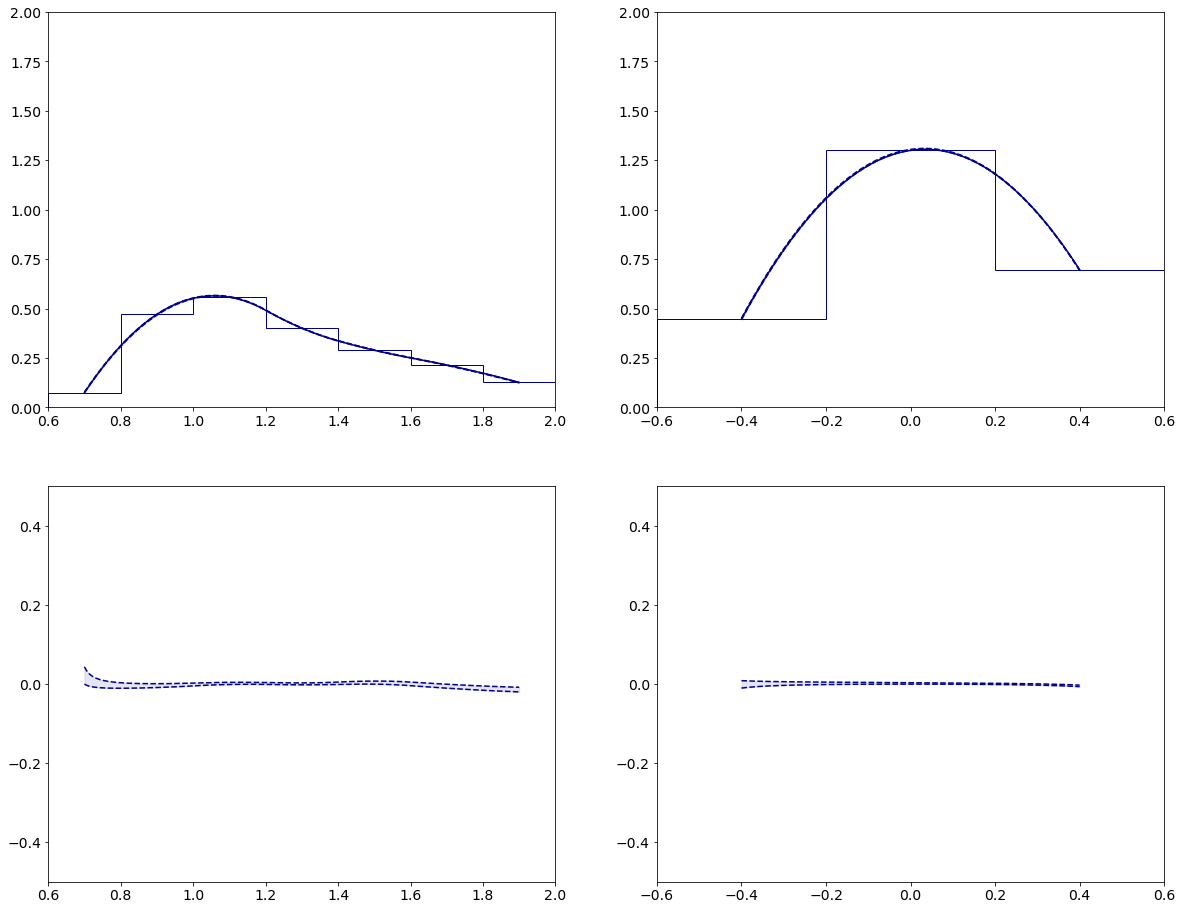

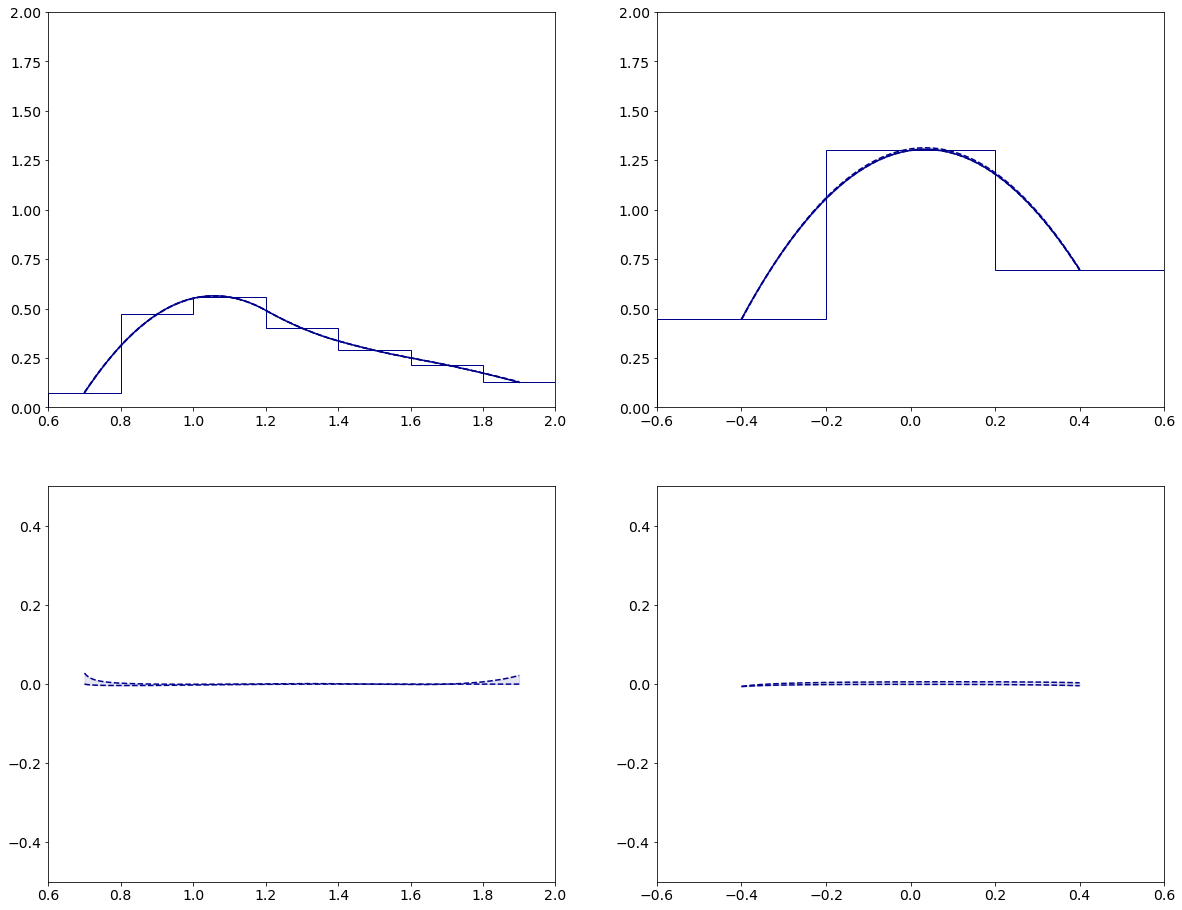

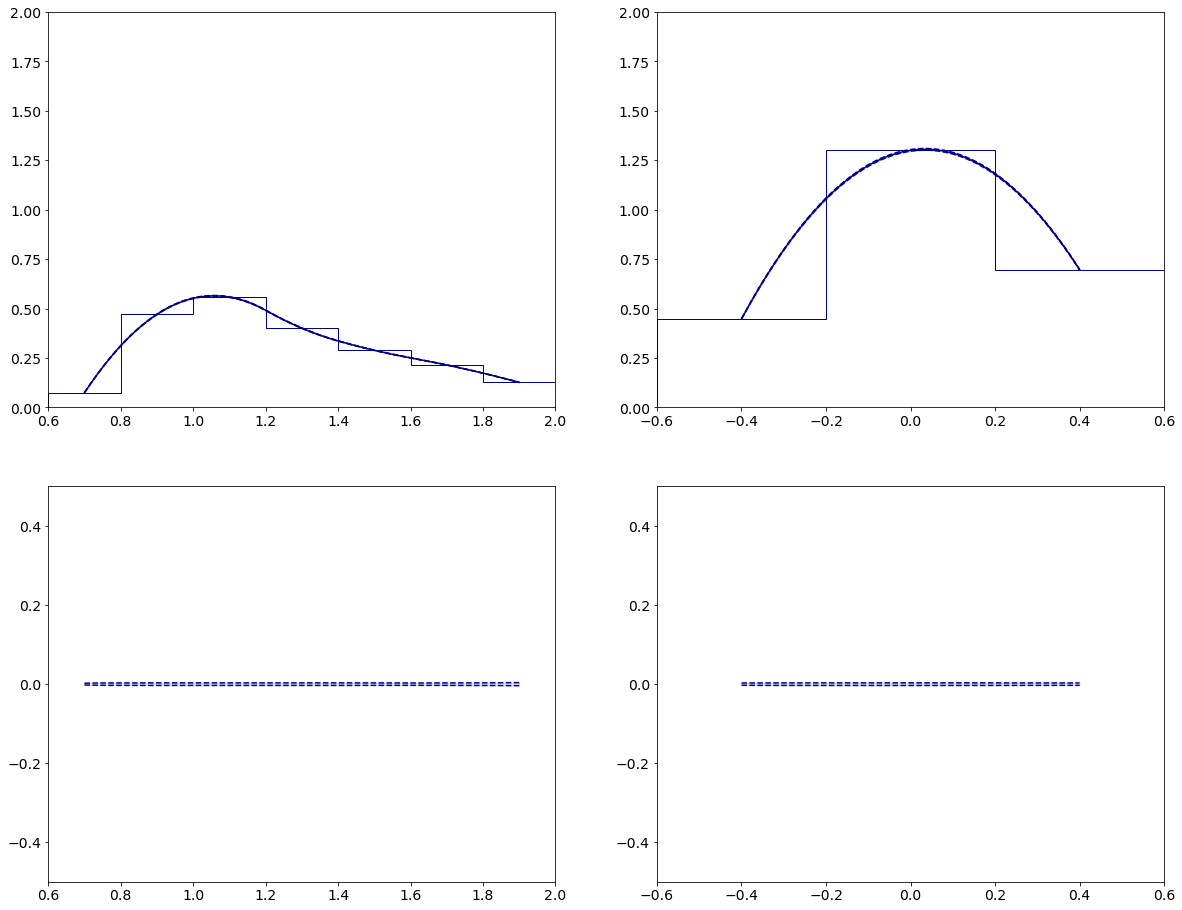

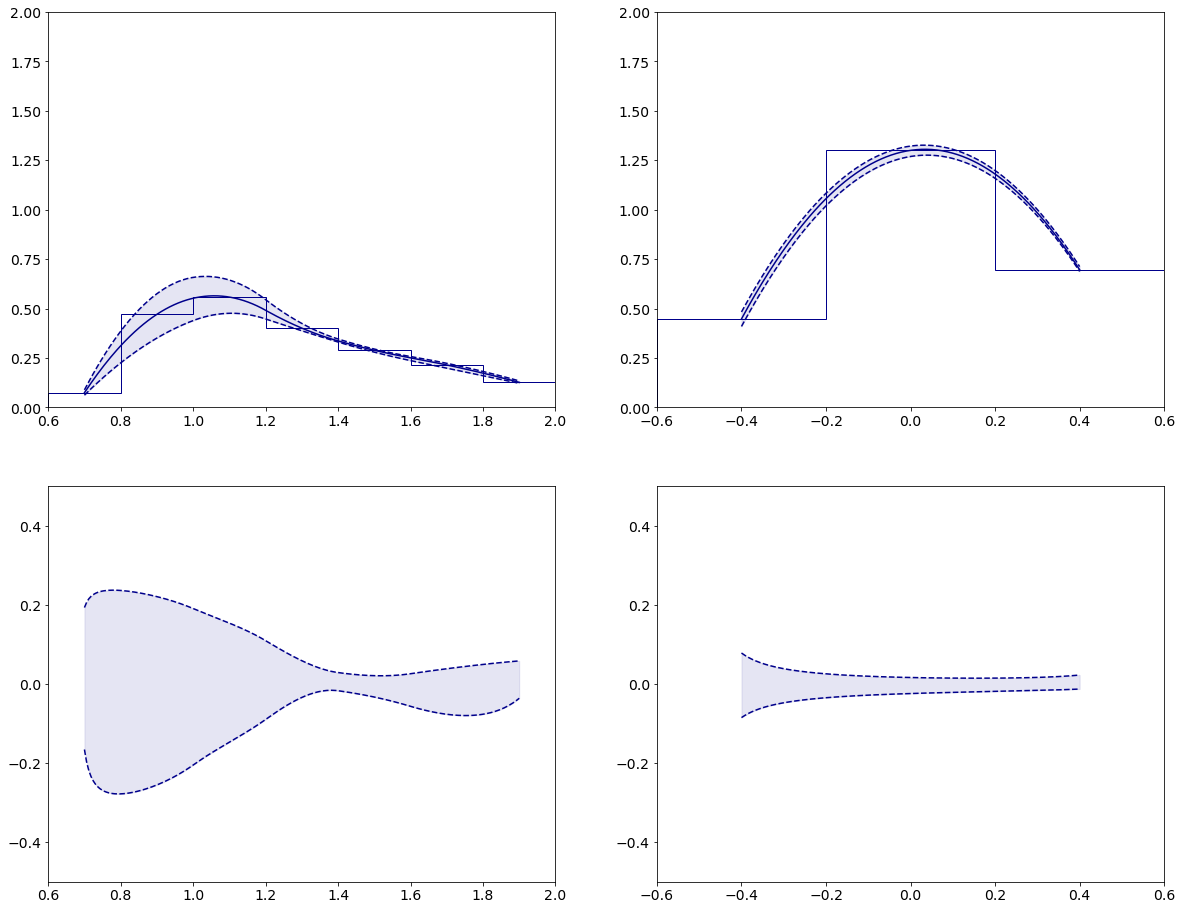

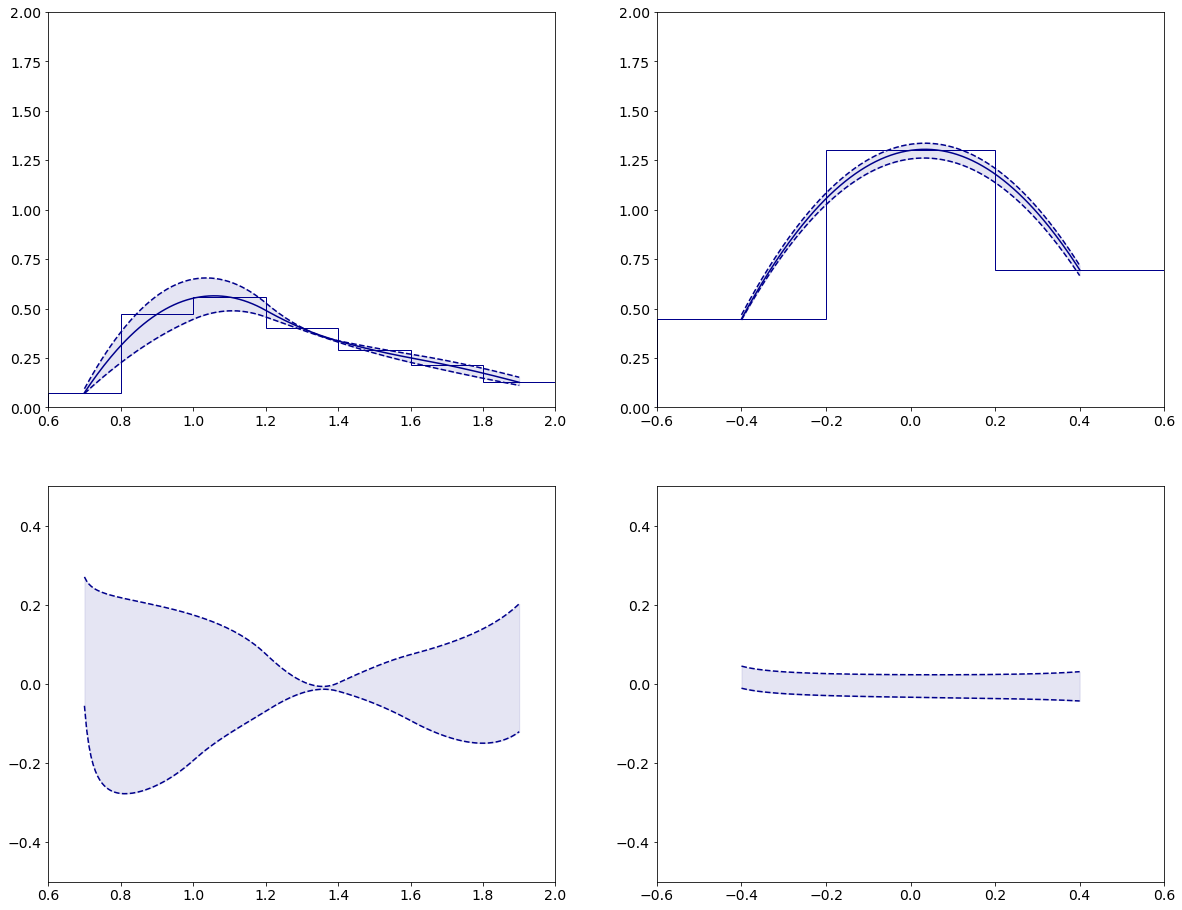

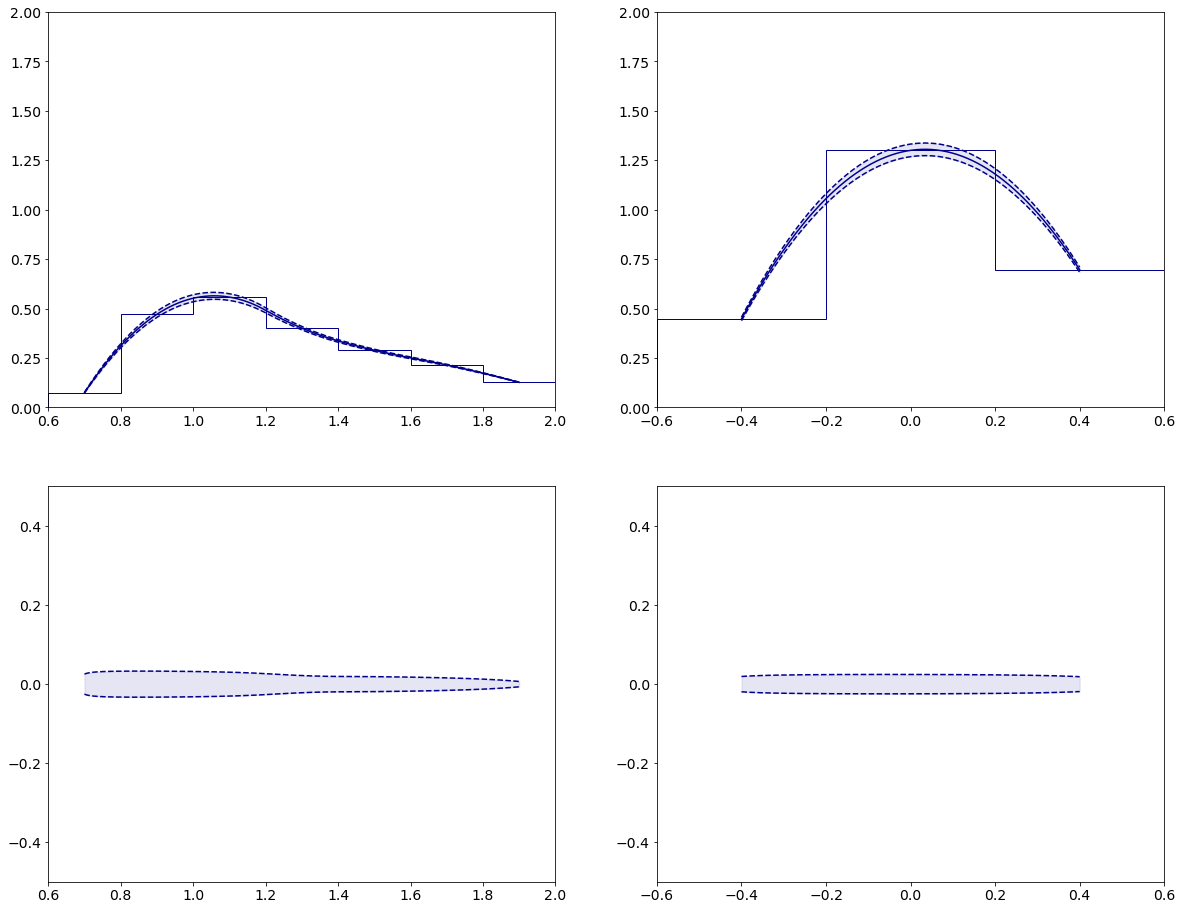

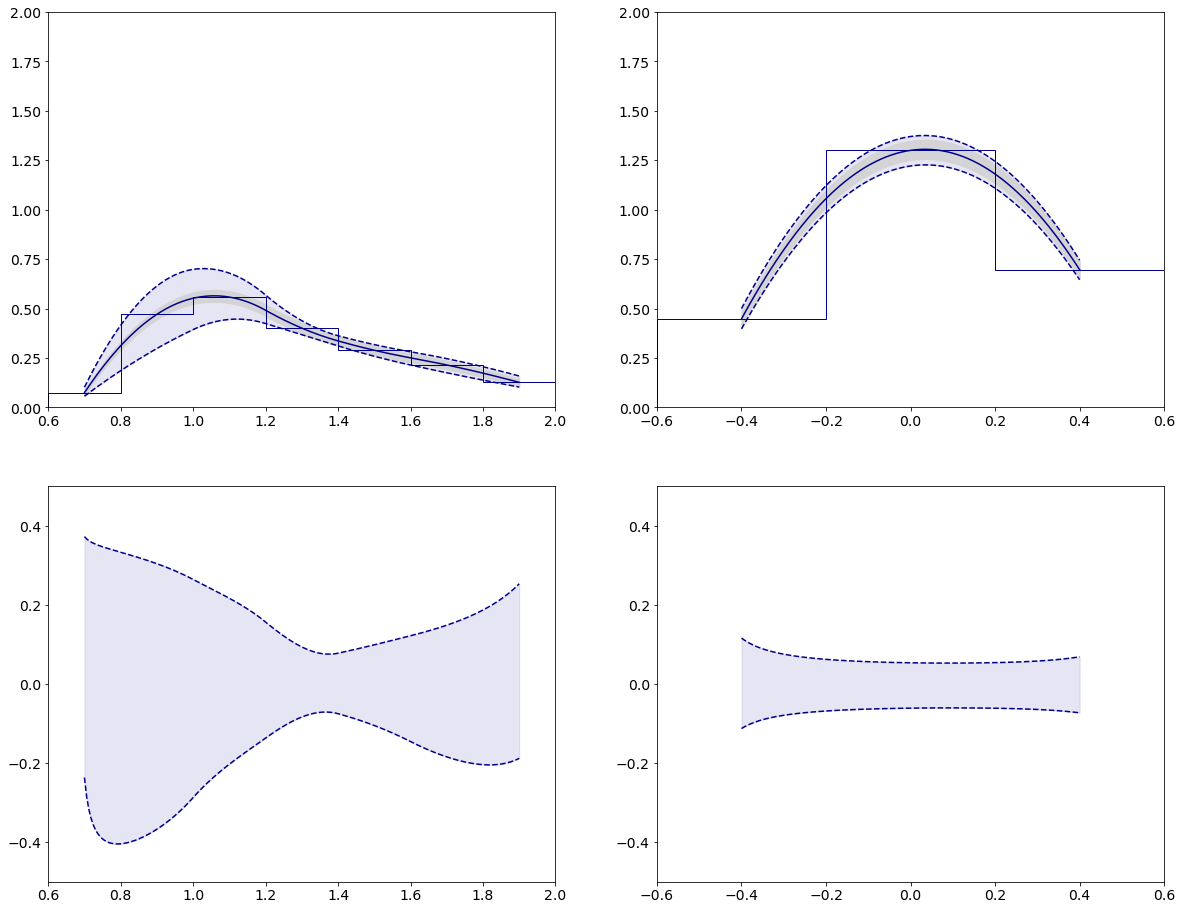

In [123]:
label_ = "GGToWW-AQGC-A0W2e-6"
# ylim_ = (0.,0.5)
# ylim_ = (0.,1.)
ylim_ = (0.,2.)
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )

GGToWW-AQGC-A0W5e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[0.42002874 2.44487579 3.37181162 2.27516335 2.02273136 1.36754614
 0.8114759 ]
[0.41354012 2.44346008 3.37116955 2.2468202  2.01473975 1.32144113
 0.80228071]
0      0.015690
1      0.013119
2      0.011238
3      0.009804
4      0.008673
         ...   
195    0.010028
196    0.009649
197    0.009229
198    0.008769
199    0.008265
Length: 200, dtype: float64 0.003459724935372317
0      0.000000
1      0.000029
2      0.000056
3      0.000082
4      0.000107
         ...   
195   -0.012164
196   -0.010150
197   -0.007982
198   -0.005654
199   -0.003160
Length: 200, dtype: float64 -0.00788528406308569
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[2.76280235 7.90901856 3.93397234]
[2.72606178 7.87574121 3.89649413]
0      0.004617
1      0.004473
2      0.004340
3      0.004216
4      0.004101
         ...   
195    0.002760
196    0.002803
197    0.002848
198    0.002896
199    0.002946
Length: 200, dtype: flo

0      0.091320
1      0.088591
2      0.086065
3      0.083721
4      0.081541
         ...   
195    0.069369
196    0.070585
197    0.071864
198    0.073211
199    0.074631
Length: 200, dtype: float64 0.0497771596800351
0     -0.089707
1     -0.087843
2     -0.086116
3     -0.084512
4     -0.083017
         ...   
195   -0.048474
196   -0.048510
197   -0.048549
198   -0.048592
199   -0.048639
Length: 200, dtype: float64 -0.0549437033333513


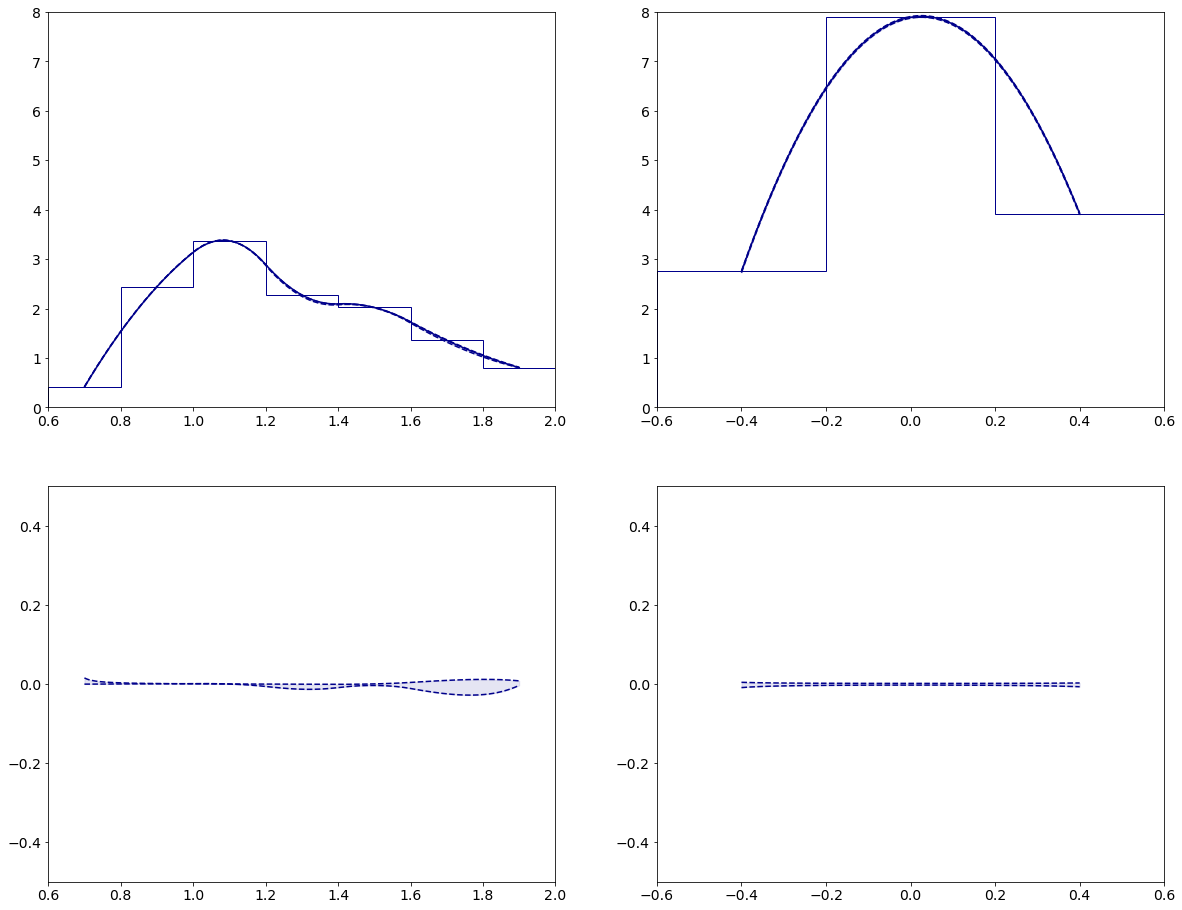

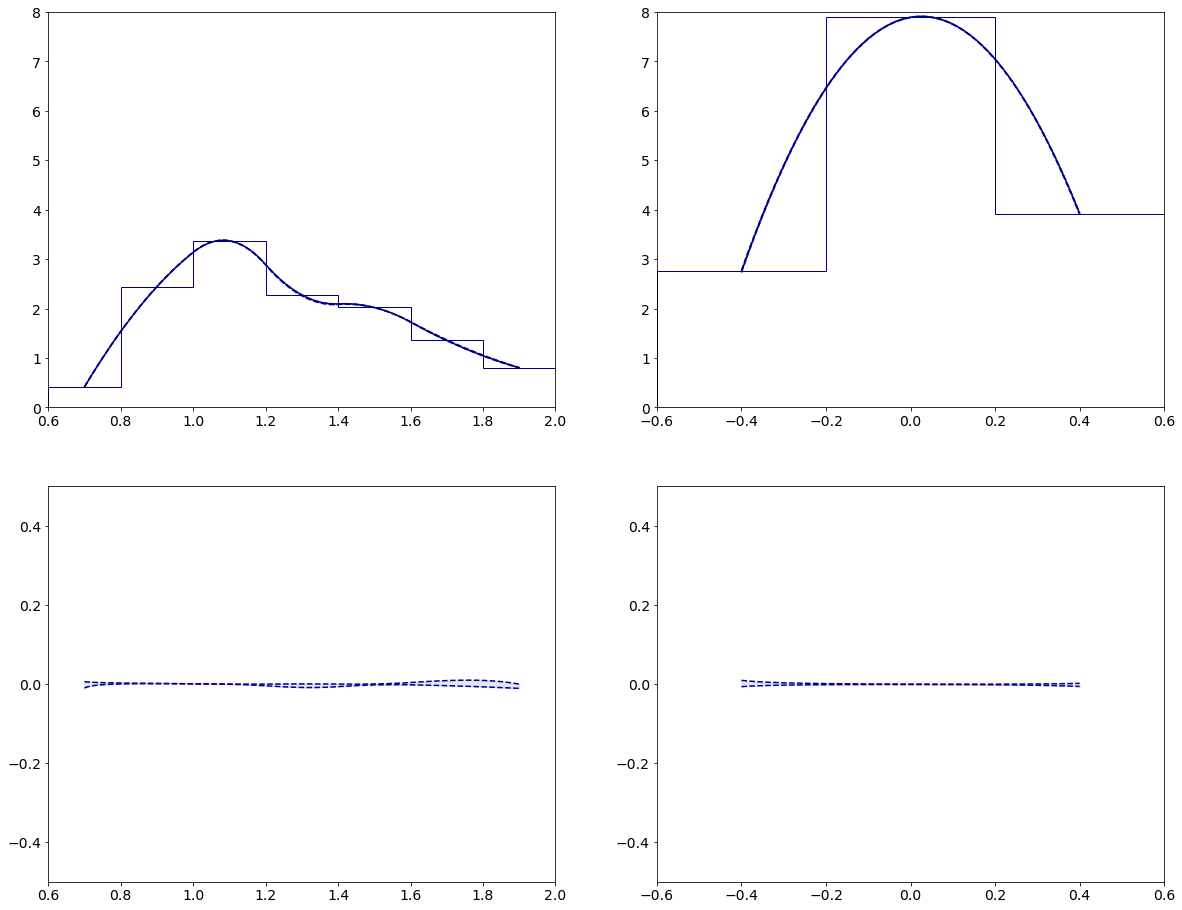

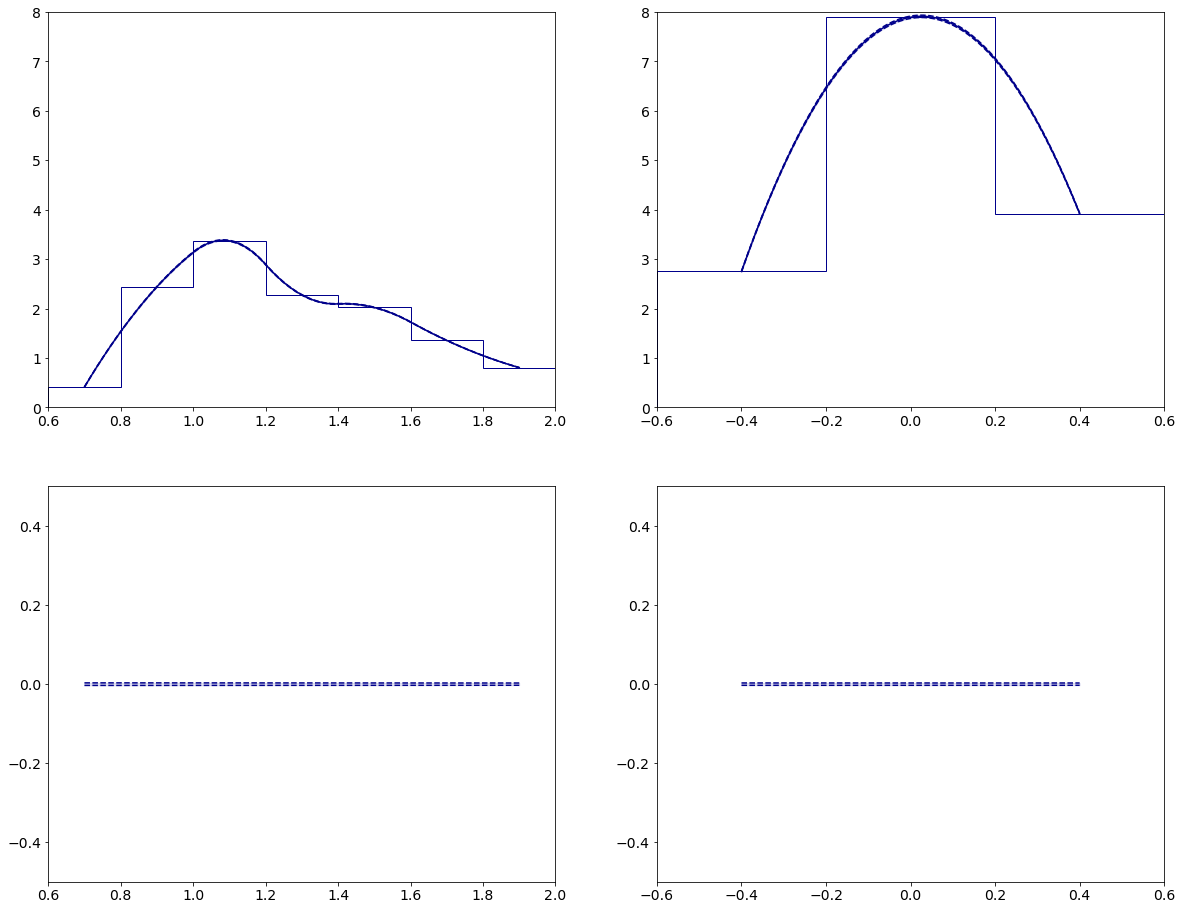

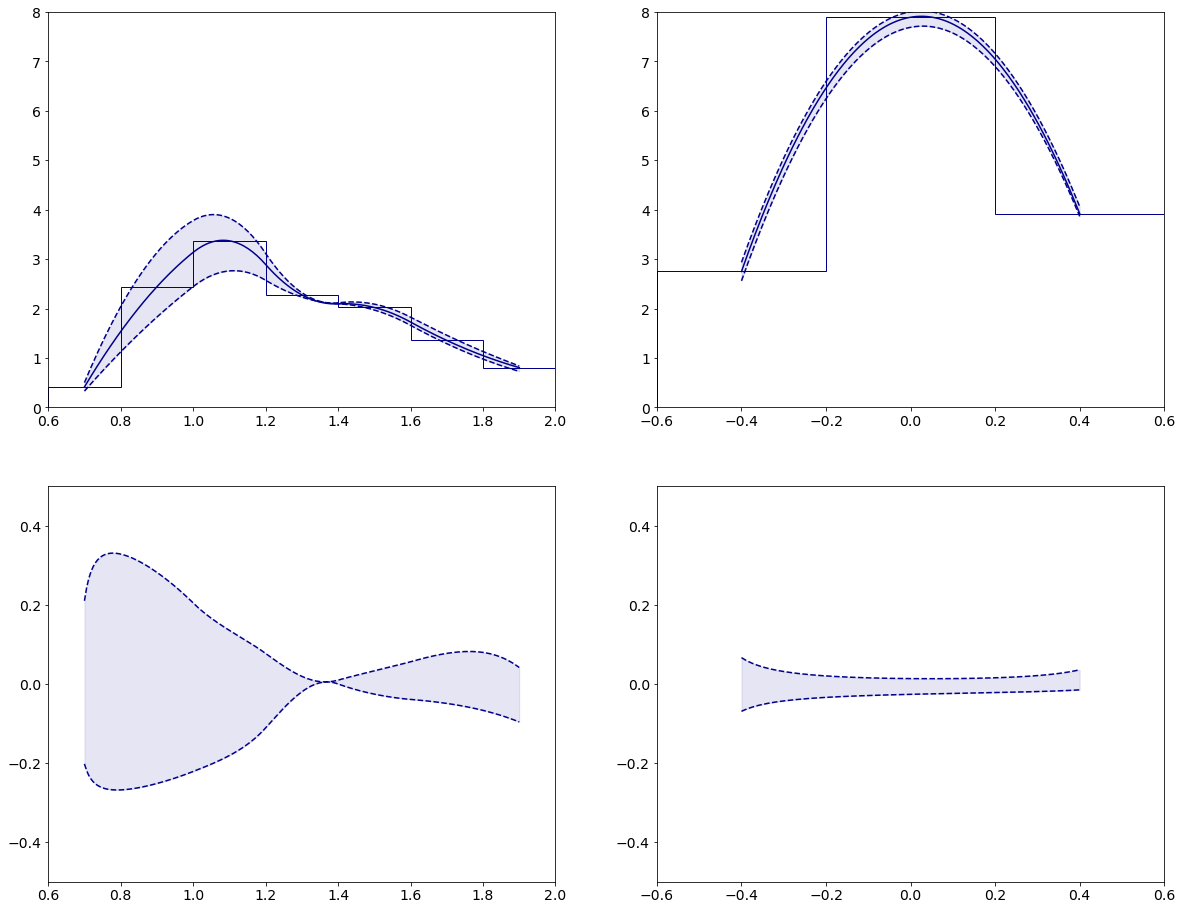

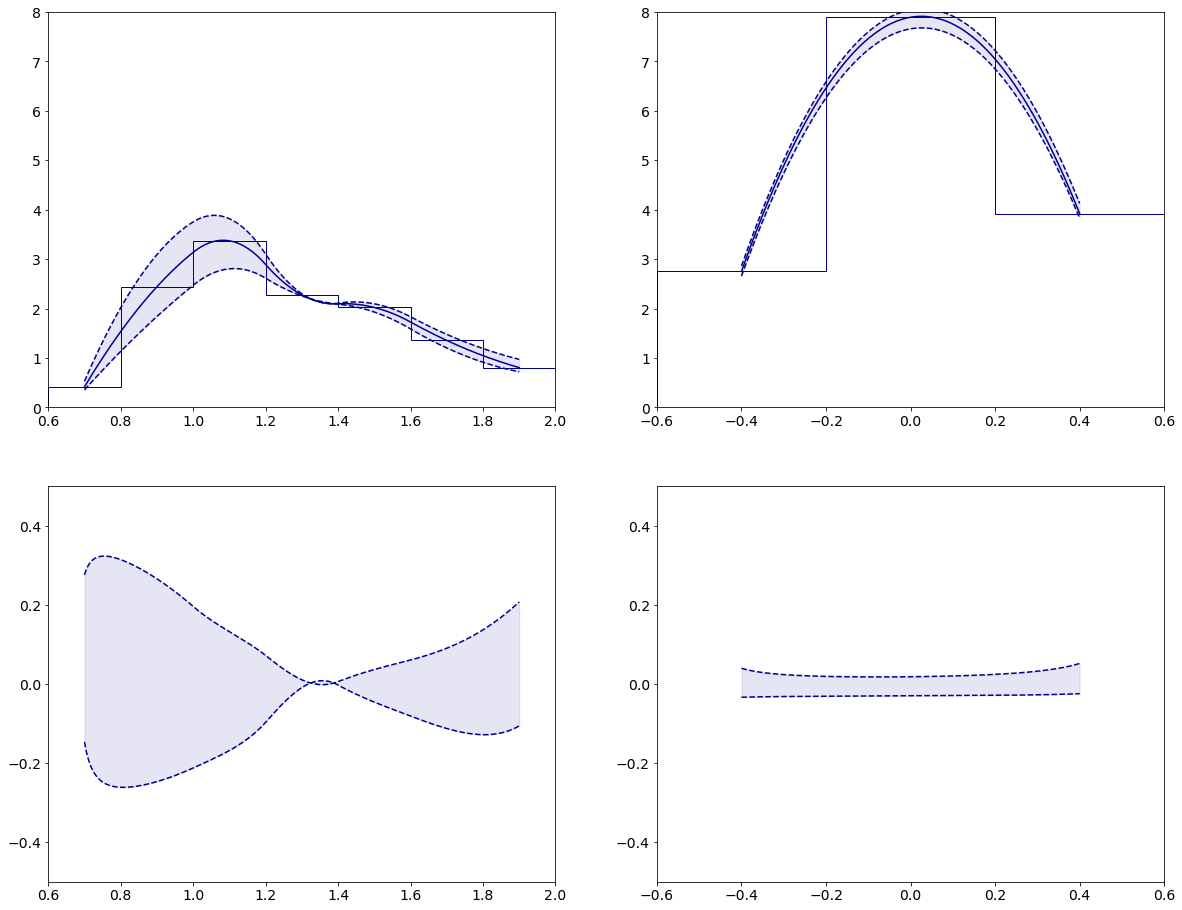

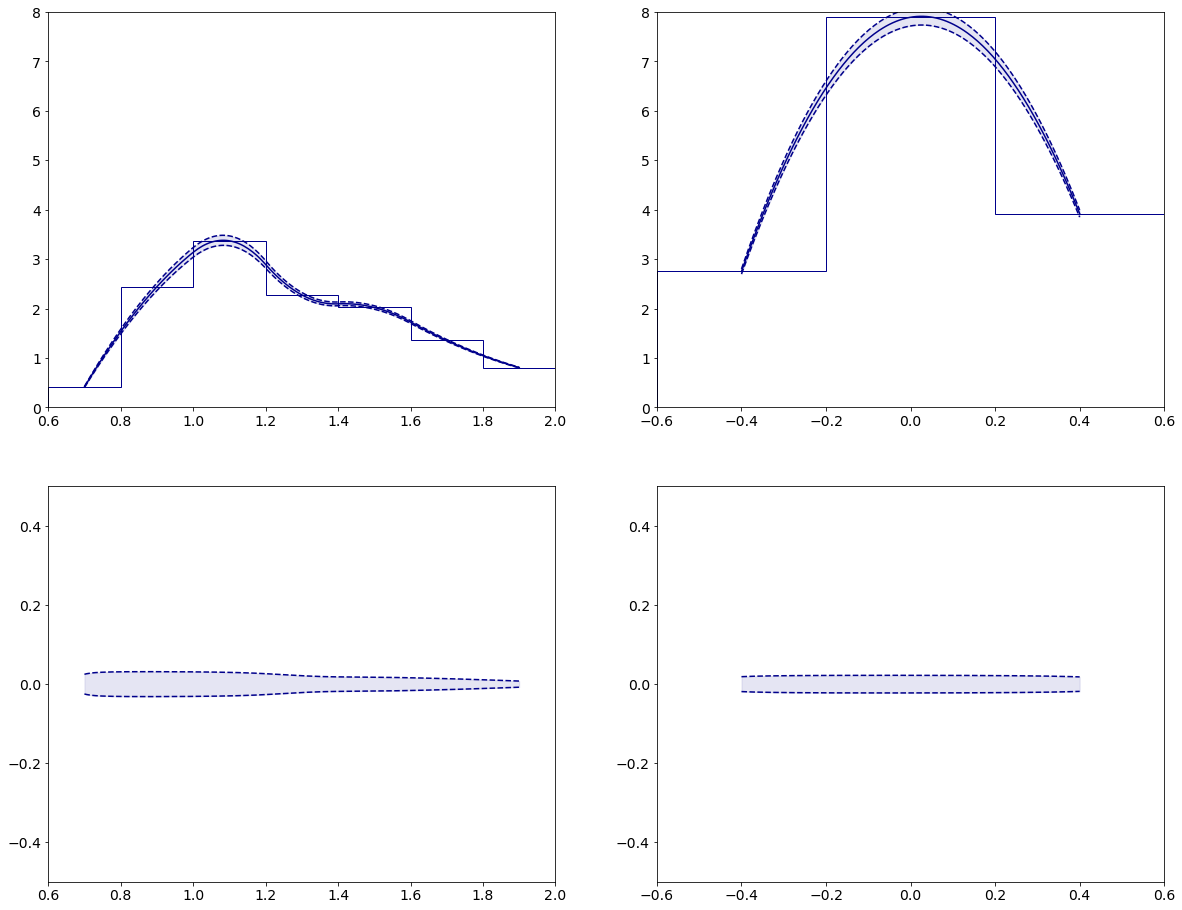

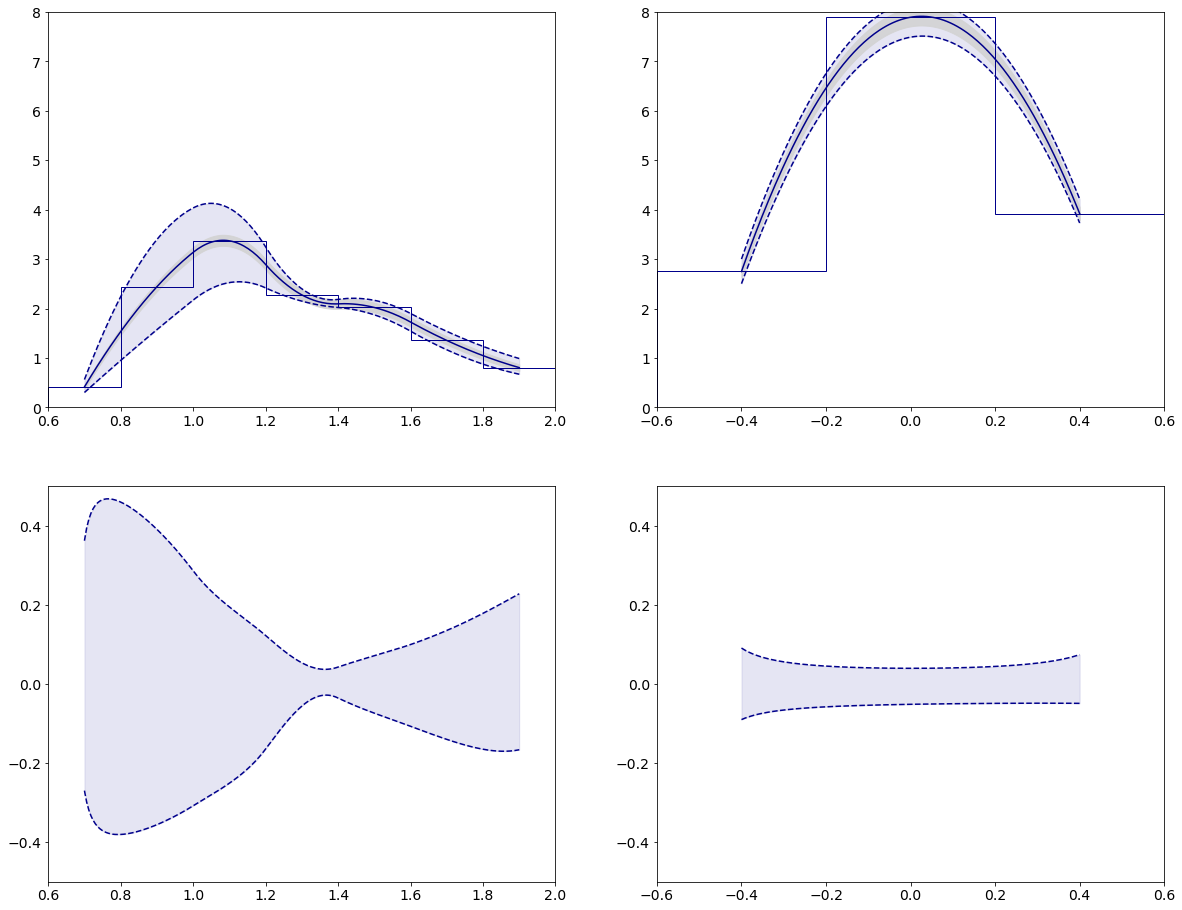

In [124]:
label_ = "GGToWW-AQGC-A0W5e-6"
# ylim_ = (0.,3.)
# ylim_ = (0.,5.)
ylim_ = (0.,8.)
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )

In [125]:
print ( counts )
print ( err )
print ( bins )
print ( max_variations_total )
print ( min_variations_total )

{'GGToWW-AQGC-A0W1e-6': {'R_MWW_MX': array([0.03263649, 0.13540762, 0.17980504, 0.12514508, 0.09211946,
       0.05881167, 0.03520951]), 'Diff_YWW_YX': array([0.17255638, 0.40526902, 0.20830449])}, 'GGToWW-AQGC-A0W2e-6': {'R_MWW_MX': array([0.07423491, 0.47085302, 0.55799856, 0.40092216, 0.28891658,
       0.21464278, 0.1265746 ]), 'Diff_YWW_YX': array([0.44746509, 1.30026175, 0.69628388])}, 'GGToWW-AQGC-A0W5e-6': {'R_MWW_MX': array([0.41354012, 2.44126391, 3.37047559, 2.27623418, 2.02152907,
       1.35470131, 0.8048241 ]), 'Diff_YWW_YX': array([2.75010498, 7.89471262, 3.92241584])}}
{'GGToWW-AQGC-A0W1e-6': {'R_MWW_MX': array([0.00627468, 0.01182559, 0.01447294, 0.01301002, 0.01170909,
       0.00980787, 0.00768192]), 'Diff_YWW_YX': array([0.0158692 , 0.02303673, 0.01707934])}, 'GGToWW-AQGC-A0W2e-6': {'R_MWW_MX': array([0.0116923 , 0.0264607 , 0.03033644, 0.02773749, 0.02440096,
       0.0215055 , 0.01748013]), 'Diff_YWW_YX': array([0.03105931, 0.04879751, 0.03742345])}, 'GGToWW-AQGC-

### Background

In [126]:
# # resample_factor = 20
# resample_factor = 50
# # label = "data-random-resample_20"
# label = "data-random-resample_50-single-arm"

# df_counts_bkg = None
# df_protons_multiRP_bkg_index = None
# df_protons_multiRP_bkg_events = None

# base_path_ = "output"
# file_path_ = "{}/data-store-{}.h5".format( base_path_, label )
# print ( file_path_ )
# with pd.HDFStore( file_path_, 'r' ) as store_:
#     print ( list( store_ ) )
#     df_counts_bkg = store_[ "counts" ]
# #     df_protons_multiRP_bkg_index = store_[ "protons_multiRP" ]
#     df_protons_multiRP_bkg_events = store_[ "events_multiRP" ]

In [127]:
# resample_factor = 20
resample_factor = 50

# label = "data-random-resample_20"
# label = "data-random-resample_50-single-arm"

labels_background = [
    "data-random-resample_50-single-arm-2017B",
    "data-random-resample_50-single-arm-2017C",
    "data-random-resample_50-single-arm-2017D",
    "data-random-resample_50-single-arm-2017E",
    "data-random-resample_50-single-arm-2017F"
]
fileNames_bkg = {
    "data-random-resample_50-single-arm-2017B": "data-store-data-random-resample_50-single-arm-2017B.h5",
    "data-random-resample_50-single-arm-2017C": "data-store-data-random-resample_50-single-arm-2017C.h5",
    "data-random-resample_50-single-arm-2017D": "data-store-data-random-resample_50-single-arm-2017D.h5",
    "data-random-resample_50-single-arm-2017E": "data-store-data-random-resample_50-single-arm-2017E.h5",
    "data-random-resample_50-single-arm-2017F": "data-store-data-random-resample_50-single-arm-2017F.h5"
}
base_path_ = "output"
for label_ in fileNames_bkg:
    fileNames_bkg[ label_ ] = "{}/{}".format( base_path_, fileNames_bkg[ label_ ] )
print ( fileNames_bkg )
# file_path_ = "{}/data-store-{}.h5".format( base_path_, label )
# print ( file_path_ )

df_counts_bkg = None
# df_protons_multiRP_bkg_index = None
df_protons_multiRP_bkg_events = None

df_counts_bkg_list_ = []
# df_protons_multiRP_bkg_index_list_ = []
df_protons_multiRP_bkg_events_list_ = []
for label_ in labels_background:
    print ( label_ )
    file_path_ = fileNames_bkg[ label_ ]
    print ( file_path_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )
        
        df_counts_bkg__ = store_[ "counts" ]
#         df_protons_multiRP_bkg_index__  = store_[ "protons_multiRP" ]
        df_protons_multiRP_bkg_events__ = store_[ "events_multiRP" ]
        df_counts_bkg_list_.append( df_counts_bkg__ )
#         df_protons_multiRP_bkg_index_list_.append( df_protons_multiRP_bkg_index__ )
        df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events__ )

df_counts_bkg = df_counts_bkg_list_[0]
for idx_ in range( 1, len( df_counts_bkg_list_ ) ):
    df_counts_bkg = df_counts_bkg.add( df_counts_bkg_list_[ idx_ ] )

# df_protons_multiRP_bkg_index = pd.concat( df_protons_multiRP_bkg_index_list_ )
df_protons_multiRP_bkg_events = pd.concat( df_protons_multiRP_bkg_events_list_ )

{'data-random-resample_50-single-arm-2017B': 'output/data-store-data-random-resample_50-single-arm-2017B.h5', 'data-random-resample_50-single-arm-2017C': 'output/data-store-data-random-resample_50-single-arm-2017C.h5', 'data-random-resample_50-single-arm-2017D': 'output/data-store-data-random-resample_50-single-arm-2017D.h5', 'data-random-resample_50-single-arm-2017E': 'output/data-store-data-random-resample_50-single-arm-2017E.h5', 'data-random-resample_50-single-arm-2017F': 'output/data-store-data-random-resample_50-single-arm-2017F.h5'}
data-random-resample_50-single-arm-2017B
output/data-store-data-random-resample_50-single-arm-2017B.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-random-resample_50-single-arm-2017C
output/data-store-data-random-resample_50-single-arm-2017C.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-random-resample_50-single-arm-2017D
output/data-store-data-random-resample_50-single-arm-2017D.h5
['/counts', '/events_multiRP', '/protons_mu

In [128]:
df_counts_bkg

All          59533850
Jet          59533850
Muon         58523950
ProtonRnd    21462400
dtype: int64

In [129]:
df_protons_multiRP_bkg_events

crossingAngle  betaStar   instLumi  \
run    lumiblock event      slice                                       
297101 489       649856256  0              140.0       0.4   6.621413   
297050 476       580449216  0              140.0       0.4   5.757312   
       549       661334464  0              140.0       0.4   5.576218   
297411 315       507676576  0              150.0       0.4  10.520432   
       316       508349216  0              150.0       0.4  10.515504   
...                                          ...       ...        ...   
306459 2172      2374756864 49             120.0       0.3   3.903724   
       2175      2377447680 49             120.0       0.3   3.897798   
       2180      2382112256 49             120.0       0.3   3.890181   
       2230      2426953984 49             120.0       0.3   3.819074   
       2039      2252250624 49             120.0       0.3   4.088757   

                                      jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
297101 489       649856256  0      260.342468  0.901040 -1.733695   
297050 476       580449216  0      206.656708 -1.669699 -1.594690   
       549       661334464  0      221.260986  0.161510  2.070358   
297411 315       507676576  0      303.093658 -0.904305  0.451934   
       316       508349216  0      236.744904 -1.145817  2.867361   
...                                       ...       ...       ...   
306459 2172      2374756864 49     205.549500 -0.310250  1.536543   
       2175      2377447680 49     208.741852 -1.005300  2.136725   
       2180      2382112256 49     245.102676 -1.294466 -2.965575   
       2230      2426953984 49     423.929474  1.713460 -1.028674   
       2039      2252250624 49     259.576355  1.349576 -1.642475   

                                   jet0_energy   jet0_mass  jet0_corrmass  \
run    lumiblock event      slice                                           
297101 489       649856256  0       377.446045   12.330968      13.377403   
297050 476       580449216  0       572.327148   52.257484      57.996189   
       549       661334464  0       230.003281   11.784620      12.678056   
297411 315       507676576  0       444.836426   59.398434      64.273888   
       316       508349216  0       415.384155   25.581654      28.535761   
...                                        ...         ...            ...   
306459 2172      2374756864 49      219.208771   11.278280      12.264607   
       2175      2377447680 49      327.381104   24.617041      27.211931   
       2180      2382112256 49      496.497986  105.625381     120.134750   
       2230      2426953984 49     1215.827515   14.618107      16.016836   
       2039      2252250624 49      547.225220   99.017159     112.423164   

                                   jet0_tau1  ...           MX        YX  \
run    lumiblock event      slice             ...                          
297101 489       649856256  0       0.126621  ...  1094.381470 -0.123946   
297050 476       580449216  0       0.221515  ...   897.169678 -0.648630   
       549       661334464  0       0.125612  ...  1144.074829  0.052112   
297411 315       507676576  0       0.241436  ...   929.553772  0.302069   
       316       508349216  0       0.226026  ...  1503.171631  0.001448   
...                                      ...  ...          ...       ...   
306459 2172      2374756864 49      0.113095  ...   932.464966 -0.815600   
       2175      2377447680 49      0.188907  ...   932.464966 -0.815600   
       2180      2382112256 49      0.550940  ...  1101.929199  0.154001   
       2230      2426953984 49      0.066590  ...   932.464966 -0.815600   
       2039      2252250624 49      0.528974  ...  1414.482422 -0.125873   

                                   diffMWW_MX  ratioMWW_MX  \
run    lumiblock event      slice                            
297101 489       649856256  0     -515.642151     0.528828   
297050 476

### Select events

In [130]:
print ( df_protons_multiRP_bkg_events.shape[0] )
df_protons_multiRP_bkg_events, selection_keys_, selections_ = select_events( df_protons_multiRP_bkg_events )
print ( df_protons_multiRP_bkg_events.shape[0] )
print ( selection_keys_ )
print ( selections_ )

2299273
347
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 2299273, 'Muon': 2295752, 'Jet': 1648305, 'Jet_Muon': 1629767, 'MET': 1271110, 'Jet_MET': 1129904, 'PrunedMass': 317726, 'Tau21': 215475, 'BJet_Veto': 171211, 'Xi_CMS': 154294, 'WLeptonic': 102409, 'Jet_WLeptonic': 100096, 'MWW': 94248, 'ExtraTracks': 347}


In [131]:
norm_factors['Bkg'] = np.array( [ ( 1. / resample_factor ) ] )
df_protons_multiRP_bkg_events[ "norm" ] = np.product( norm_factors['Bkg'] )

<ipython-input-131-9d6e3778a4a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_protons_multiRP_bkg_events[ "norm" ] = np.product( norm_factors['Bkg'] )


In [132]:
df_protons_multiRP_bkg_events

crossingAngle  betaStar   instLumi  \
run    lumiblock event      slice                                       
299149 141       163434384  2              150.0       0.4  12.681488   
297425 30        47257416   11             150.0       0.4  11.871425   
                            12             150.0       0.4  11.871425   
299149 441       634672320  14             140.0       0.4  11.547543   
297178 999       1189016576 16             120.0       0.4   5.719876   
...                                          ...       ...        ...   
306154 441       717747840  14             140.0       0.3  14.468351   
                            19             140.0       0.3  14.468351   
306432 114       193046544  22             120.0       0.3   9.411917   
306154 441       717747840  36             140.0       0.3  14.468351   
306432 114       193046544  44             120.0       0.3   9.411917   

                                      jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
299149 141       163434384  2      229.961319 -1.724816 -2.302326   
297425 30        47257416   11     334.367828 -1.154163  2.112808   
                            12     334.367828 -1.154163  2.112808   
299149 441       634672320  14     399.412415  1.124192  2.012682   
297178 999       1189016576 16     489.812469 -0.969985  1.165963   
...                                       ...       ...       ...   
306154 441       717747840  14     272.674744  1.581074 -2.510293   
                            19     272.674744  1.581074 -2.510293   
306432 114       193046544  22     359.264526 -1.569778 -2.814619   
306154 441       717747840  36     272.674744  1.581074 -2.510293   
306432 114       193046544  44     359.264526 -1.569778 -2.814619   

                                   jet0_energy  jet0_mass  jet0_corrmass  \
run    lumiblock event      slice                                          
299149 141       163434384  2       673.956543  75.720802      83.915443   
297425 30        47257416   11      593.106995  78.565102      87.288094   
                            12      593.106995  78.565102      87.288094   
299149 441       634672320  14      688.711792  76.072495      83.976440   
297178 999       1189016576 16      744.902893  60.767780      65.960884   
...                                        ...        ...            ...   
306154 441       717747840  14      696.206116  60.121838      66.612709   
                            19      696.206116  60.121838      66.612709   
306432 114       193046544  22      905.888550  64.935661      71.425850   
306154 441       717747840  36      696.206116  60.121838      66.612709   
306432 114       193046544  44      905.888550  64.935661      71.425850   

                                   jet0_tau1  ...        YX  diffMWW_MX  \
run    lumiblock event      slice             ...                         
299149 141       163434384  2       0.512351  ...  0.415170 -351.275208   
297425 30        47257416   11      0.259159  ... -0.358218  382.282043   
                            12      0.259159  ... -0.243344  753.770996   
299149 441       634672320  14      0.274408  ...  0.000223 -246.340942   
297178 999       1189016576 16      0.204474  ... -0.018404 -248.457153   
...                                      ...  ...       ...         ...   
306154 441       717747840  14      0.222571  ...  0.092028 -473.295593   
                            19      0.222571  ... -0.038116   -0.417175   
306432 114       193046544  22      0.219543  ...  0.179112 -184.212952   
306154 441       717747840  36      0.222571  ... -0.517004 -452.445862   
306432 114       193046544  44      0.219543  ... -0.143382   59.406738   

                                   ratioMWW_MX  shiftedRatioMWW_MX  \
run    lumiblock event      slice                                    
299149 141       163434384  2         0.591017           -0.408983   
297425 30   

Number of events: 6.9399999999999995 +/- 0.3725587202039432
Number of events (A): 1.3 +/- 0.161245154965971
Number of events (B): 1.9399999999999997 +/- 0.1969771560359221
Number of events (C): 0.9200000000000002 +/- 0.1356465996625054
Number of events (D): 2.7800000000000002 +/- 0.23579652245103194


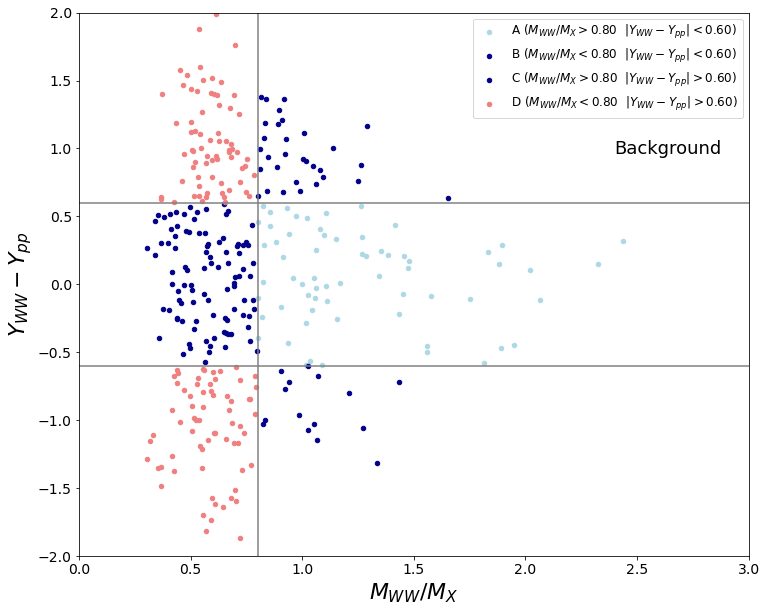

In [133]:
df__ = df_protons_multiRP_bkg_events
weights__ = ( df_protons_multiRP_bkg_events[ "norm" ] )
var1__ = ( "R_MWW_MX" + "_nom" )
var2__ = ( "Diff_YWW_YX" + "_nom" )

msk_bkg_cut1 = ( df__[ var1__ ] >= 0.80  )
msk_bkg_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
msk_bkg_A =  msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_B = ~msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_C =  msk_bkg_cut1 & ~msk_bkg_cut2
msk_bkg_D = ~msk_bkg_cut1 & ~msk_bkg_cut2

n_events_bkg   = np.sum( weights__ )
err_n_events_bkg = np.sqrt( np.sum( weights__ ** 2 ) )
n_events_bkg_A = np.sum( weights__[ msk_bkg_A ] )
err_n_events_bkg_A = np.sqrt( np.sum( weights__[ msk_bkg_A ] ** 2 ) )
n_events_bkg_B = np.sum( weights__[ msk_bkg_B ] )
err_n_events_bkg_B = np.sqrt( np.sum( weights__[ msk_bkg_B ] ** 2 ) )
n_events_bkg_C = np.sum( weights__[ msk_bkg_C ] )
err_n_events_bkg_C = np.sqrt( np.sum( weights__[ msk_bkg_C ] ** 2 ) )
n_events_bkg_D = np.sum( weights__[ msk_bkg_D ] )
err_n_events_bkg_D = np.sqrt( np.sum( weights__[ msk_bkg_D ] ** 2 ) )

print ( "Number of events: {} +/- {}".format( n_events_bkg, err_n_events_bkg ) )
print ( "Number of events (A): {} +/- {}".format( n_events_bkg_A, err_n_events_bkg_A ) )
print ( "Number of events (B): {} +/- {}".format( n_events_bkg_B, err_n_events_bkg_B ) )
print ( "Number of events (C): {} +/- {}".format( n_events_bkg_C, err_n_events_bkg_C ) )
print ( "Number of events (D): {} +/- {}".format( n_events_bkg_D, err_n_events_bkg_D ) )

x_min =  0.
x_max =  3.0
y_min = -2.0
y_max =  2.0
x_cut = 0.80
y_cut = 0.60

fig = plt.figure( figsize=(12,10) )
plt.plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
plt.plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
plt.plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
ax = plt.gca()
label_str_ = r"A ($M_{WW} / M_{X} > 0.80$  $|Y_{WW} - Y_{pp}| < 0.60$)"
df__[ msk_bkg_A ].plot( var1__, var2__, 'scatter', ax=ax, color='lightblue', label=label_str_ )
label_str_ = r"B ($M_{WW} / M_{X} < 0.80$  $|Y_{WW} - Y_{pp}| < 0.60$)"
df__[ msk_bkg_B ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
label_str_ = r"C ($M_{WW} / M_{X} > 0.80$  $|Y_{WW} - Y_{pp}| > 0.60$)"
df__[ msk_bkg_C ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
label_str_ = r"D ($M_{WW} / M_{X} < 0.80$  $|Y_{WW} - Y_{pp}| > 0.60$)"
df__[ msk_bkg_D ].plot( var1__, var2__, 'scatter', ax=ax, color='lightcoral', label=label_str_ )
plt.legend( loc='best', fontsize=12 )
ax.text( 0.80, 0.75, "Background", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=18 )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel( r"$M_{WW} / M_{X}$", fontsize=22 )
plt.ylabel( r"$Y_{WW} - Y_{pp}$", fontsize=22 )

if save_figures:
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background.png", bbox_inches='tight' )

### Data

In [134]:
label_data = "data-single-arm"
base_path_ = 'output'
file_path_ = "{}/data-store-{}.h5".format( base_path_, label_data )
df_counts_data = None
# df_protons_multiRP_data_index = None
df_protons_multiRP_data_events = None
with pd.HDFStore( file_path_, 'r' ) as store_:
    print ( list( store_ ) )
    df_counts_data = store_[ "counts" ]
#     df_protons_multiRP_data_index = store_[ "protons_multiRP" ]
    df_protons_multiRP_data_events = store_[ "events_multiRP" ]

['/counts', '/events_multiRP', '/protons_multiRP']


In [135]:
df_counts_data

All       1190677
Jet       1190677
Muon      1170479
Proton     429248
dtype: int64

In [136]:
df_protons_multiRP_data_events

crossingAngle  betaStar   instLumi  \
run    lumiblock event      slice                                       
297050 56        67470672   0              150.0       0.4   6.679657   
297292 69        129538808  0              150.0       0.4  11.504112   
       87        163111984  0              150.0       0.4  11.395494   
297308 10        8493683    0              120.0       0.4   7.113605   
297411 315       507163776  0              150.0       0.4  10.520432   
...                                          ...       ...        ...   
306459 2155      2359360768 0              120.0       0.3   3.922798   
       2162      2365128448 0              120.0       0.3   3.916059   
                 2365121280 0              120.0       0.3   3.916059   
       2175      2377627648 0              120.0       0.3   3.897798   
       2038      2251110400 0              120.0       0.3   4.090506   

                                      jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
297050 56        67470672   0      202.515182  0.893716 -0.328976   
297292 69        129538808  0      288.628693 -0.788394 -1.141097   
       87        163111984  0      203.507202 -1.973928  1.850590   
297308 10        8493683    0      290.445282 -2.193158 -0.117516   
297411 315       507163776  0      277.914886 -0.270154  2.725810   
...                                       ...       ...       ...   
306459 2155      2359360768 0      218.009674 -0.118450 -0.200599   
       2162      2365128448 0      363.567780 -0.267622 -1.886698   
                 2365121280 0      364.721130  1.514884  1.548793   
       2175      2377627648 0      290.310211  0.855684  2.703330   
       2038      2251110400 0      215.838776 -0.383308 -0.542665   

                                   jet0_energy  jet0_mass  jet0_corrmass  \
run    lumiblock event      slice                                          
297050 56        67470672   0       293.086853  33.124821      36.013985   
297292 69        129538808  0       388.141937   9.830454      10.636863   
       87        163111984  0       748.566223   7.932750       9.116489   
297308 10        8493683    0      1320.782349  19.336693      21.763872   
297411 315       507163776  0       300.506866  59.073338      63.414124   
...                                        ...        ...            ...   
306459 2155      2359360768 0       222.827744  11.701286      12.775053   
       2162      2365128448 0       384.151123  17.664539      19.221556   
                 2365121280 0       872.109985  23.630486      26.488623   
       2175      2377627648 0       410.676880  45.042587      49.380253   
       2038      2251110400 0       236.948059   6.026716       6.558581   

                                   jet0_tau1  ...           MX        YX  \
run    lumiblock event      slice             ...                          
297050 56        67470672   0       0.151150  ...   620.507629  0.018511   
297292 69        129538808  0       0.112030  ...  1287.862671 -0.320066   
       87        163111984  0       0.136313  ...   784.684448 -0.058811   
297308 10        8493683    0       0.184098  ...   904.361084 -0.417970   
297411 315       507163776  0       0.187254  ...   969.568359 -0.603819   
...                                      ...  ...          ...       ...   
306459 2155      2359360768 0       0.103089  ...   607.890930  0.118389   
       2162      2365128448 0       0.115801  ...   875.904907 -0.281252   
                 2365121280 0       0.155220  ...  1101.929199  0.154001   
       2175      2377627648 0       0.214744  ...   932.464966 -0.815600   
       2038      2251110400 0       0.149756  ...   929.972046 -0.199122   

                                   diffMWW_MX  ratioMWW_MX  \
run    lumiblock event      slice                            
297050 56        67470672   0     -210.349854     0.661004   
297292 69        129538

### Select events

In [137]:
print ( df_protons_multiRP_data_events.shape[0] )
df_protons_multiRP_data_events, selection_keys_, selections_ = select_events( df_protons_multiRP_data_events )
print ( df_protons_multiRP_data_events.shape[0] )
print ( selection_keys_ )
print ( selections_ )

45981
4
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 45981, 'Muon': 45906, 'Jet': 32879, 'Jet_Muon': 32542, 'MET': 25375, 'Jet_MET': 22528, 'PrunedMass': 6246, 'Tau21': 4319, 'BJet_Veto': 3412, 'Xi_CMS': 3076, 'WLeptonic': 2064, 'Jet_WLeptonic': 2019, 'MWW': 1877, 'ExtraTracks': 4}


Number of events: 4 - Ratio: 0.5763688760806917
Number of events (B): 0 - Ratio: 0.0
Number of events (C): 0 - Ratio: 0.0
Number of events (D): 3 - Ratio: 1.079136690647482


Text(0, 0.5, '$Y_{WW} - Y_{pp}$')

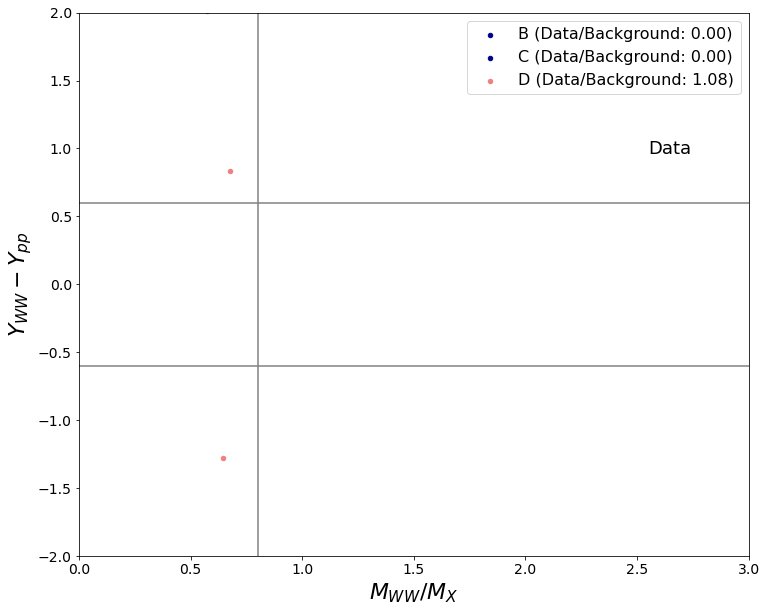

In [138]:
df__ = df_protons_multiRP_data_events
var1__ = ( "R_MWW_MX" + "_nom" )
var2__ = ( "Diff_YWW_YX" + "_nom" )

msk_data_cut1 = ( df__[ var1__ ] >= 0.80  )
msk_data_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
# msk_data_A =  msk_data_cut1 &  msk_data_cut2
msk_data_B = ~msk_data_cut1 &  msk_data_cut2
msk_data_C =  msk_data_cut1 & ~msk_data_cut2
msk_data_D = ~msk_data_cut1 & ~msk_data_cut2

n_events_data = df__.shape[0]
# n_events_data_A = df__[ msk_data_A ].shape[0]
n_events_data_B = df__[ msk_data_B ].shape[0]
n_events_data_C = df__[ msk_data_C ].shape[0]
n_events_data_D = df__[ msk_data_D ].shape[0]

print ( "Number of events: {} - Ratio: {}".format( n_events_data, ( n_events_data / ( n_events_bkg ) ) ) )
# print ( "Number of events (A): {} - Ratio: {}".format( n_events_data_A, ( n_events_data_A / ( n_events_bkg_A ) ) ) )
print ( "Number of events (B): {} - Ratio: {}".format( n_events_data_B, ( n_events_data_B / ( n_events_bkg_B ) ) ) )
print ( "Number of events (C): {} - Ratio: {}".format( n_events_data_C, ( n_events_data_C / ( n_events_bkg_C ) ) ) )
print ( "Number of events (D): {} - Ratio: {}".format( n_events_data_D, ( n_events_data_D / ( n_events_bkg_D ) ) ) )

x_min =  0.
x_max =  3.0
y_min = -2.0
y_max =  2.0
x_cut = 0.80
y_cut = 0.60

fig = plt.figure( figsize=(12,10) )
plt.plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
plt.plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
plt.plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
ax = plt.gca()
# label_str_ = "A (Data/Background: {:.2f})".format( ( n_events_data_A / ( n_events_bkg_A ) ) )
# label_str_ = r"{}".format( label_str_ )
# df__[ msk_data_A ].plot( var1__, var2__, 'scatter', ax=ax, color='lightblue', label=label_str_ )
label_str_ = "B (Data/Background: {:.2f})".format( ( n_events_data_B / ( n_events_bkg_B ) ) )
label_str_ = r"{}".format( label_str_ )
df__[ msk_data_B ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
label_str_ = "C (Data/Background: {:.2f})".format( ( n_events_data_C / ( n_events_bkg_C ) ) )
label_str_ = r"{}".format( label_str_ )
df__[ msk_data_C ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
label_str_ = "D (Data/Background: {:.2f})".format( ( n_events_data_D / ( n_events_bkg_D ) ) )
label_str_ = r"{}".format( label_str_ )
df__[ msk_data_D ].plot( var1__, var2__, 'scatter', ax=ax, color='lightcoral', label=label_str_ )
plt.legend( loc='best', fontsize=16 )
# leg_ = plt.legend( loc='best', fontsize=16 )
# leg_.set_title( title_str_, prop={'size': 16} )
# leg_._legend_box.align = "right"
ax.text( 0.85, 0.75, "Data", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=18 )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel( r"$M_{WW} / M_{X}$", fontsize=22 )
plt.ylabel( r"$Y_{WW} - Y_{pp}$", fontsize=22 )

GGToWW-AQGC-A0W5e-6
R_MWW_MX
0      0.362780
1      0.394691
2      0.416814
3      0.432614
4      0.444085
         ...   
195    0.216359
196    0.219414
197    0.222474
198    0.225536
199    0.228597
Length: 200, dtype: float64 0.19783133718486995
0     -0.269391
1     -0.297998
2     -0.318324
3     -0.333304
4     -0.344632
         ...   
195   -0.169093
196   -0.168562
197   -0.167871
198   -0.167011
199   -0.165974
Length: 200, dtype: float64 -0.19051610603640584
Diff_YWW_YX
0      0.091320
1      0.088591
2      0.086065
3      0.083721
4      0.081541
         ...   
195    0.069369
196    0.070585
197    0.071864
198    0.073211
199    0.074631
Length: 200, dtype: float64 0.0497771596800351
0     -0.089707
1     -0.087843
2     -0.086116
3     -0.084512
4     -0.083017
         ...   
195   -0.048474
196   -0.048510
197   -0.048549
198   -0.048592
199   -0.048639
Length: 200, dtype: float64 -0.0549437033333513
GGToWW-AQGC-A0W2e-6
R_MWW_MX
0      0.373122
1      0.367319
2 

<ipython-input-154-ad0a66344b8b>:92: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[idx_row_,idx_col_].set_ylim( ylim_ )
<ipython-input-154-ad0a66344b8b>:92: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[idx_row_,idx_col_].set_ylim( ylim_ )
<ipython-input-154-ad0a66344b8b>:92: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[idx_row_,idx_col_].set_ylim( ylim_ )
<ipython-input-154-ad0a66344b8b>:92: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[idx_row_,idx_col_].set_ylim( ylim_ )


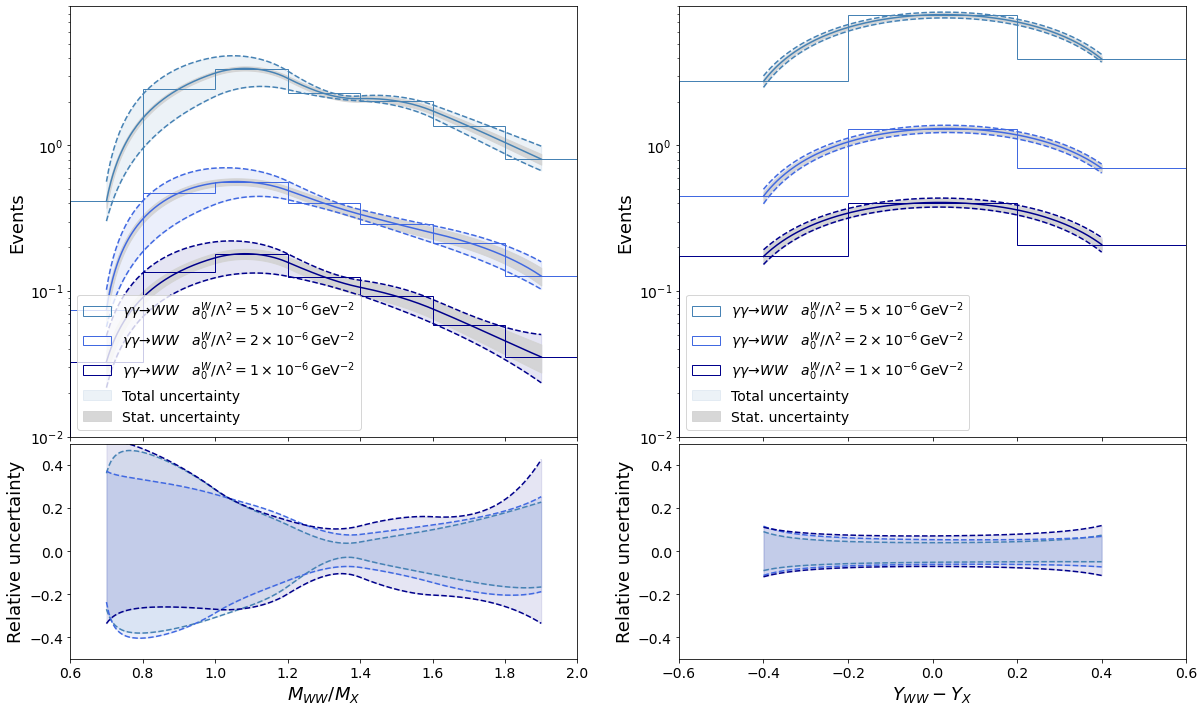

In [154]:
relative_uncertainty_ = True

# ylim_ = (0.,5.)
# ylim_ = (0.,8.)
ylim_ = (0.,9.)
# ylim_ = (0.,3.)
# ylim_ = (0.,0.60)
ylim_ratio_ = (-0.50,0.50)

yscale_=None
# yscale_='log'

colors = [ "steelblue", "royalblue", "darkblue" ]

# fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )
fig, axes_ = plt.subplots( 1, 2, figsize=( 2*10,( 1.5*8 ) ) )

class Obj2D:
    def __init__( self ):
        self.obj_ = [ [], [] ]
    def __getitem__( self, idx ):
        if isinstance( idx, tuple ): return self.obj_[ idx[0] ][ idx[1] ]
        else : return self.obj_[ idx ]

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider0_ = make_axes_locatable( axes_[ 0 ] )
divider1_ = make_axes_locatable( axes_[ 1 ] )
axes = Obj2D()
axes.obj_[0].append( axes_[ 0 ] )
axes.obj_[0].append( axes_[ 1 ] )
axes.obj_[1].append( divider0_.append_axes( "bottom", size="50%", pad=0.10 ) )
axes.obj_[1].append( divider1_.append_axes( "bottom", size="50%", pad=0.10 ) )

def plot_signal( axes ):
    for idx_label_, label_ in enumerate( labels_signals[::-1] ):
        print ( label_ )
        color_ = colors[ idx_label_ ]

        spline_nom_ = {}
        spline_max_ = {}
        spline_min_ = {}
        spline_max_err_ = {}
        spline_min_err_ = {}
        spline_nom_arr_ = {}
        spline_max_arr_ = {}
        spline_min_arr_ = {}
        spline_max_err_arr_ = {}
        spline_min_err_arr_ = {}

        idx_row_ = 0
        idx_col_ = 0
        for var__ in vars_:
            print ( var__ )
            idx_row_ = 0
            counts_ = counts[ label_ ][ var__ ]
            err_ = err[ label_ ][ var__ ]
            bins_ = bins[ label_ ][ var__ ]
            __max_err__ = ( counts_ + err_ )
            __min_err__ = ( counts_ - err_ )
            __max__ = max_variations_total[ label_ ][ var__ ]
            __min__ = min_variations_total[ label_ ][ var__ ]

            bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

            axes[idx_row_,idx_col_].hist( bin_centers_, weights=counts_,
                                          histtype='step', color=color_, linestyle="-", label=labels_samples[ label_ ],
                                          bins=bins_ )

            spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
            spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
            spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
            spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
            spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
            x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
            spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
            spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
            spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
            spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
            spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

            axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
            axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
            __label_0 = None
            __label_1 = None
            if idx_label_ == 0:
                __label_0 = "Total uncertainty"
                __label_1 = "Stat. uncertainty"
            axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10, label=__label_0 )
            axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90, label=__label_1 )
            axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
            axes[idx_row_,idx_col_].set_ylim( ylim_ )
    #         axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
            axes[idx_row_,idx_col_].get_xaxis().set_ticklabels( [] )
            axes[idx_row_,idx_col_].set_ylabel( "Events", fontsize=18 )
            if yscale_:
                axes[idx_row_,idx_col_].set_ylim( bottom=0.01 )
                axes[idx_row_,idx_col_].set_yscale( yscale_ )
            axes[idx_row_,idx_col_].legend( loc='best', fontsize=14 )

            idx_row_ = 1
            if relative_uncertainty_:
                ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
                ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
                ratio_max_sel_ = pd.Series( ratio_max_ )
                ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
                ratio_min_sel_ = pd.Series( ratio_min_ )
                ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
                print ( ratio_max_sel_, ratio_max_sel_.mean() )
                print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
                axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
                axes[idx_row_,idx_col_].set_ylabel( "Relative uncertainty", fontsize=18 )
            else:
                diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
                diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
                axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
                axes[idx_row_,idx_col_].set_ylabel( "Uncertainty", fontsize=18 )
        #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
            axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
            axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
            axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
            idx_col_ += 1

plot_signal( axes=axes )

if save_figures:
    if yscale_:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-log.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-log.png", bbox_inches='tight' )
    else:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics.png", bbox_inches='tight' )

GGToWW-AQGC-A0W5e-6
R_MWW_MX
0      0.362780
1      0.394691
2      0.416814
3      0.432614
4      0.444085
         ...   
195    0.216359
196    0.219414
197    0.222474
198    0.225536
199    0.228597
Length: 200, dtype: float64 0.19783133718486995
0     -0.269391
1     -0.297998
2     -0.318324
3     -0.333304
4     -0.344632
         ...   
195   -0.169093
196   -0.168562
197   -0.167871
198   -0.167011
199   -0.165974
Length: 200, dtype: float64 -0.19051610603640584
Diff_YWW_YX
0      0.091320
1      0.088591
2      0.086065
3      0.083721
4      0.081541
         ...   
195    0.069369
196    0.070585
197    0.071864
198    0.073211
199    0.074631
Length: 200, dtype: float64 0.0497771596800351
0     -0.089707
1     -0.087843
2     -0.086116
3     -0.084512
4     -0.083017
         ...   
195   -0.048474
196   -0.048510
197   -0.048549
198   -0.048592
199   -0.048639
Length: 200, dtype: float64 -0.0549437033333513
GGToWW-AQGC-A0W2e-6
R_MWW_MX
0      0.373122
1      0.367319
2 

<ipython-input-154-ad0a66344b8b>:92: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[idx_row_,idx_col_].set_ylim( ylim_ )
<ipython-input-154-ad0a66344b8b>:92: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[idx_row_,idx_col_].set_ylim( ylim_ )
<ipython-input-154-ad0a66344b8b>:92: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[idx_row_,idx_col_].set_ylim( ylim_ )
<ipython-input-154-ad0a66344b8b>:92: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[idx_row_,idx_col_].set_ylim( ylim_ )


Diff_YWW_YX
[0.84 1.08 1.32]
[0.96961481 1.22696938 1.48248077]
[0.71038519 0.93303062 1.15751923]
[0.96961481 1.22696938 1.48248077]
[0.71038519 0.93303062 1.15751923]
0      0.154303
1      0.154079
2      0.153857
3      0.153635
4      0.153414
         ...   
195    0.123549
196    0.123434
197    0.123320
198    0.123205
199    0.123091
Length: 200, dtype: float64 0.1369455748367758
0     -0.154303
1     -0.154079
2     -0.153857
3     -0.153635
4     -0.153414
         ...   
195   -0.123549
196   -0.123434
197   -0.123320
198   -0.123205
199   -0.123091
Length: 200, dtype: float64 -0.13694557483677589


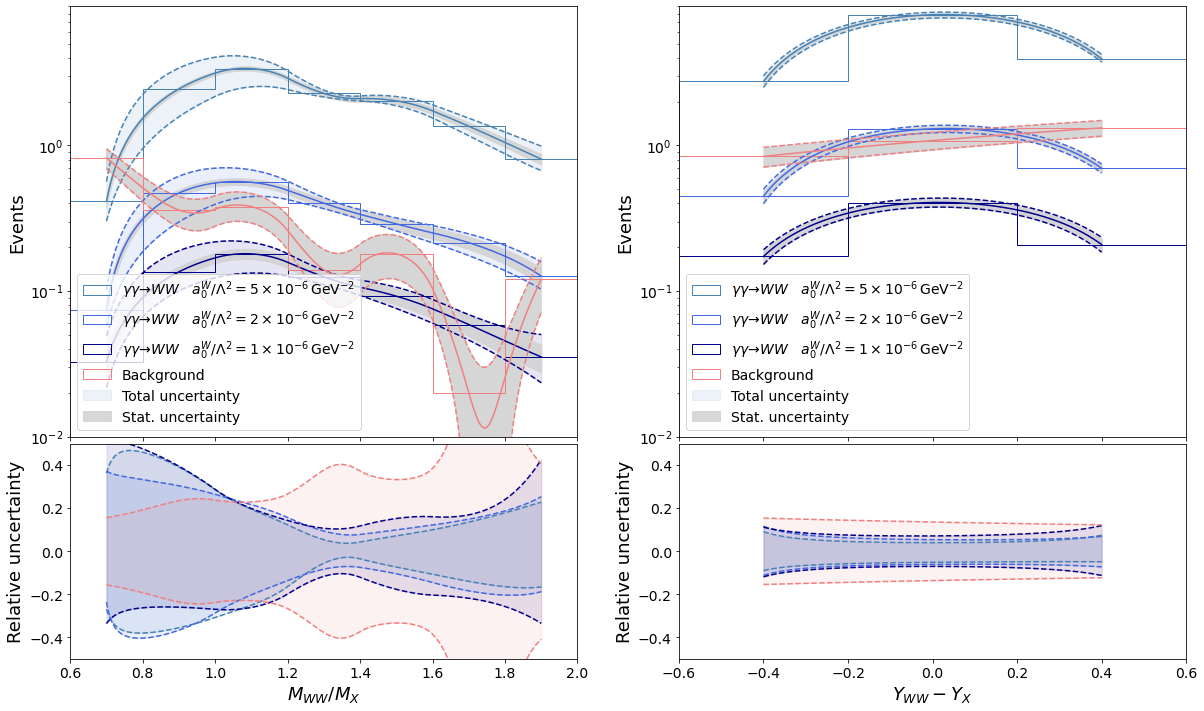

In [155]:
fig, axes_ = plt.subplots( 1, 2, figsize=( 2*10,( 1.5*8 ) ) )

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider0_ = make_axes_locatable( axes_[ 0 ] )
divider1_ = make_axes_locatable( axes_[ 1 ] )
axes = Obj2D()
axes.obj_[0].append( axes_[ 0 ] )
axes.obj_[0].append( axes_[ 1 ] )
axes.obj_[1].append( divider0_.append_axes( "bottom", size="50%", pad=0.10 ) )
axes.obj_[1].append( divider1_.append_axes( "bottom", size="50%", pad=0.10 ) )

plot_signal( axes=axes )

color_ = 'lightcoral'

# counts__ = None
# err__ = None
# bins__ = None
# max_variations_total__ = None
# min_variations_total__ = None
idx_row_ = 0
idx_col_ = 0
for var__ in vars_:
    print ( var__ )
    idx_row_ = 0
    df__ = df_protons_multiRP_bkg_events
    weights__ = ( df_protons_multiRP_bkg_events[ "norm" ] )
    arr__ = df__[ var__ + "_nom" ]

    arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
    msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
    arr__ = arr__.loc[ msk__ ]
    weights__ = weights__.loc[ msk__ ]
    sum_w_, bins_ = np.histogram( arr__, weights=weights__,
                                  bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
    sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ),
                                bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

    __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
    __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

    __max__ = ( sum_w_ + np.sqrt( sum_w2_ ) ) 
    __min__ = ( sum_w_ - np.sqrt( sum_w2_ ) )
    
    print ( sum_w_ )
    print ( __max_err__ )
    print ( __min_err__ )
    print ( __max__ )
    print ( __min__ )
#     counts__[ var__ ] = sum_w_
#     err__[ var__ ] = np.sqrt( sum_w2_ )
#     bins__[ var__ ] = bins_
#     max_variations_total__[ var__ ] = __max__
#     min_variations_total__[ var__ ] = __min__

    bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

    axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                  histtype='step', color=color_, linestyle="-",
                                  bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ], label="Background" )

    spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
    spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
    spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
    spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
    spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
    x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
    spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
    spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
    spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
    spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
    spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

    axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
#     axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10, label="Background" )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
#     axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
#     axes[idx_row_,idx_col_].set_ylim( ylim_ )
#     axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
#     axes[idx_row_,idx_col_].set_ylabel( "Events", fontsize=18 )
    axes[idx_row_,idx_col_].legend( loc='best', fontsize=14 )
    
    idx_row_ = 1
    if relative_uncertainty_:
        ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_max_sel_ = pd.Series( ratio_max_ )
        ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        ratio_min_sel_ = pd.Series( ratio_min_ )
        ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        print ( ratio_max_sel_, ratio_max_sel_.mean() )
        print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
#         axes[idx_row_,idx_col_].set_ylabel( "Relative uncertainty", fontsize=18 )
    else:
        diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
#         axes[idx_row_,idx_col_].set_ylabel( "Uncertainty", fontsize=18 )
#     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
#     axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
#     axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
#     axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
    idx_col_ += 1
    
if save_figures:
    if yscale_:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-log.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-log.png", bbox_inches='tight' )
    else:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.png", bbox_inches='tight' )

In [141]:
# axes[0,0].set_xlim( 0.6, 2.0 )
# axes[1,0].set_xlim( 0.6, 2.0 )
# axes[0,1].set_xlim( -1., 1. )
# axes[1,1].set_xlim( -1., 1. )
# axes[0,1].set_xlim( -0.60, 0.60 )
# axes[1,1].set_xlim( -0.60, 0.60 )
# axes[0,0].set_ylim( 0., 5. )
# axes[0,0].set_ylim( 0., 9. )
# axes[0,1].set_ylim( 0., 5. )
# axes[0,1].set_ylim( 0., 8. )
# axes[0,1].set_ylim( 0., 9. )
# axes[0,0].set_ylim( 0., 1. )
# axes[0,1].set_ylim( 0., 1. )
# axes[0,0].set_yscale( 'log' )
# axes[0,1].set_yscale( 'log' )
# axes[0,0].set_ylim( 0.01, 5. )
# # axes[0,1].set_ylim( 0.01, 5. )
# axes[0,1].set_ylim( 0.01, 8. )
# fig

In [142]:
# if save_figures:
#     plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.pdf", bbox_inches='tight' )
#     plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.png", bbox_inches='tight' )

In [143]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_total" ]    =  np.sqrt( sum_weights[ label_ ][ "syst_up_jes" ] ** 2 +
                                                            sum_weights[ label_ ][ "syst_up_jer" ] ** 2 +
                                                            sum_weights[ label_ ][ "syst_up_sf_muon_id" ] ** 2 +
                                                            sum_weights[ label_ ][ "syst_up_proton_scale" ] ** 2 +
                                                            sum_weights[ label_ ][ "syst_up_proton_eff" ] ** 2
                                                          )
    sum_weights[ label_ ][ "syst_dw_total" ]    = -np.sqrt( sum_weights[ label_ ][ "syst_dw_jes" ] ** 2 +
                                                            sum_weights[ label_ ][ "syst_dw_jer" ] ** 2 +
                                                            sum_weights[ label_ ][ "syst_dw_sf_muon_id" ] ** 2 +
                                                            sum_weights[ label_ ][ "syst_dw_proton_scale" ] ** 2 +
                                                            sum_weights[ label_ ][ "syst_dw_proton_eff" ] ** 2
                                                          )
print ( sum_weights )

{'GGToWW-AQGC-A0W1e-6': {'central': 0.7251809904951909, 'stat': 0.031558294852632535, 'syst_up_jes': 0.0006423775003112642, 'syst_dw_jes': 0.00041493218902999285, 'syst_up_jer': 0.00033838493724758223, 'syst_dw_jer': -0.0010784210725038879, 'syst_up_sf_muon_id': 0.002269535664552569, 'syst_dw_sf_muon_id': -0.002269535664552458, 'syst_up_proton_scale_arm0': 0.013887256043893514, 'syst_dw_proton_scale_arm0': -0.020533659958763884, 'syst_up_proton_scale_arm1': 0.013594340676454708, 'syst_dw_proton_scale_arm1': -0.009280865821654216, 'syst_up_proton_scale': 0.019433527185155248, 'syst_dw_proton_scale': -0.02253365619915447, 'syst_up_proton_eff': 0.015989496079984677, 'syst_dw_proton_eff': -0.015989496079984455, 'syst_up_total': 0.025278526640201002, 'syst_dw_total': -0.027747353017131566}, 'GGToWW-AQGC-A0W2e-6': {'central': 2.3410995820707177, 'stat': 0.06756109847375802, 'syst_up_jes': 0.002324799528209631, 'syst_dw_jes': -0.007282767303832927, 'syst_up_jer': 0.002117693983089808, 'syst_d

In [144]:
df_sum_weights__ = pd.DataFrame( sum_weights )
df_sum_weights__

GGToWW-AQGC-A0W1e-6  GGToWW-AQGC-A0W2e-6  \
central                               0.725181             2.341100   
stat                                  0.031558             0.067561   
syst_up_jes                           0.000642             0.002325   
syst_dw_jes                           0.000415            -0.007283   
syst_up_jer                           0.000338             0.002118   
syst_dw_jer                          -0.001078            -0.002901   
syst_up_sf_muon_id                    0.002270             0.007430   
syst_dw_sf_muon_id                   -0.002270            -0.007430   
syst_up_proton_scale_arm0             0.013887             0.016554   
syst_dw_proton_scale_arm0            -0.020534            -0.023937   
syst_up_proton_scale_arm1             0.013594             0.030857   
syst_dw_proton_scale_arm1            -0.009281            -0.050712   
syst_up_proton_scale                  0.019434             0.035017   
syst_dw_proton_scale                 -0.022534            -0.056077   
syst_up_proton_eff                    0.015989             0.051095   
syst_dw_proton_eff                   -0.015989            -0.051095   
syst_up_total                         0.025279             0.062466   
syst_dw_total                        -0.027747            -0.076629   

                           GGToWW-AQGC-A0W5e-6  
central                              14.078390  
stat                                  0.251231  
syst_up_jes                           0.038560  
syst_dw_jes                          -0.075425  
syst_up_jer                           0.026046  
syst_dw_jer                          -0.037741  
syst_up_sf_muon_id                    0.041439  
syst_dw_sf_muon_id                   -0.041439  
syst_up_proton_scale_arm0             0.154064  
syst_dw_proton_scale_arm0            -0.171226  
syst_up_proton_scale_arm1             0.243978  
syst_dw_proton_scale_arm1            -0.237340  
syst_up_proton_scale                  0.288550  
syst_dw_proton_scale                 -0.292658  
syst_up_proton_eff                    0.287281  
syst_dw_proton_eff                   -0.287281  
syst_up_total                         0.411915  
syst_dw_total                        -0.420725

In [145]:
# df_sum_weights__.iloc[ 1:, : ].divide( df_sum_weights__.iloc[ 0 ] ) * 100.

In [146]:
df__ = df_protons_multiRP_bkg_events
weights__ = ( df_protons_multiRP_bkg_events[ "norm" ] )
weights_squared__ = ( weights__ ** 2 )
arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + "_nom" ]
arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + "_nom" ]
msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
sum_weights_squared_cut__ = np.sum( weights_squared__.loc[ msk__ ] )
print ( "{} ± {}".format( sum_weights_cut__, np.sqrt( sum_weights_squared_cut__ ) ) )

1.3 ± 0.161245154965971


In [147]:
df_sum_weights__[ "Background" ] = -1.
df_sum_weights__[ "Background" ][ "central" ] = sum_weights_cut__
df_sum_weights__[ "Background" ][ "stat" ] = np.sqrt( sum_weights_squared_cut__ )
df_sum_weights__

GGToWW-AQGC-A0W1e-6  GGToWW-AQGC-A0W2e-6  \
central                               0.725181             2.341100   
stat                                  0.031558             0.067561   
syst_up_jes                           0.000642             0.002325   
syst_dw_jes                           0.000415            -0.007283   
syst_up_jer                           0.000338             0.002118   
syst_dw_jer                          -0.001078            -0.002901   
syst_up_sf_muon_id                    0.002270             0.007430   
syst_dw_sf_muon_id                   -0.002270            -0.007430   
syst_up_proton_scale_arm0             0.013887             0.016554   
syst_dw_proton_scale_arm0            -0.020534            -0.023937   
syst_up_proton_scale_arm1             0.013594             0.030857   
syst_dw_proton_scale_arm1            -0.009281            -0.050712   
syst_up_proton_scale                  0.019434             0.035017   
syst_dw_proton_scale                 -0.022534            -0.056077   
syst_up_proton_eff                    0.015989             0.051095   
syst_dw_proton_eff                   -0.015989            -0.051095   
syst_up_total                         0.025279             0.062466   
syst_dw_total                        -0.027747            -0.076629   

                           GGToWW-AQGC-A0W5e-6  Background  
central                              14.078390    1.300000  
stat                                  0.251231    0.161245  
syst_up_jes                           0.038560   -1.000000  
syst_dw_jes                          -0.075425   -1.000000  
syst_up_jer                           0.026046   -1.000000  
syst_dw_jer                          -0.037741   -1.000000  
syst_up_sf_muon_id                    0.041439   -1.000000  
syst_dw_sf_muon_id                   -0.041439   -1.000000  
syst_up_proton_scale_arm0             0.154064   -1.000000  
syst_dw_proton_scale_arm0            -0.171226   -1.000000  
syst_up_proton_scale_arm1             0.243978   -1.000000  
syst_dw_proton_scale_arm1            -0.237340   -1.000000  
syst_up_proton_scale                  0.288550   -1.000000  
syst_dw_proton_scale                 -0.292658   -1.000000  
syst_up_proton_eff                    0.287281   -1.000000  
syst_dw_proton_eff                   -0.287281   -1.000000  
syst_up_total                         0.411915   -1.000000  
syst_dw_total                        -0.420725   -1.000000

In [148]:
df_sum_weights__.iloc[ 1:, : ].where( ~( df_sum_weights__.iloc[ 1:, : ] > -1. ) , df_sum_weights__.iloc[ 1:, : ].divide( df_sum_weights__.iloc[ 0 ] ) * 100. )

GGToWW-AQGC-A0W1e-6  GGToWW-AQGC-A0W2e-6  \
stat                                  4.351782             2.885870   
syst_up_jes                           0.088582             0.099304   
syst_dw_jes                           0.057218            -0.311083   
syst_up_jer                           0.046662             0.090457   
syst_dw_jer                          -0.148711            -0.123899   
syst_up_sf_muon_id                    0.312961             0.317374   
syst_dw_sf_muon_id                   -0.312961            -0.317374   
syst_up_proton_scale_arm0             1.915006             0.707084   
syst_dw_proton_scale_arm0            -2.831522            -1.022466   
syst_up_proton_scale_arm1             1.874613             1.318073   
syst_dw_proton_scale_arm1            -1.279800            -2.166143   
syst_up_proton_scale                  2.679818             1.495755   
syst_dw_proton_scale                 -3.107315            -2.395332   
syst_up_proton_eff                    2.204897             2.182511   
syst_dw_proton_eff                   -2.204897            -2.182511   
syst_up_total                         3.485823             2.668222   
syst_dw_total                        -3.826266            -3.273197   

                           GGToWW-AQGC-A0W5e-6  Background  
stat                                  1.784513   12.403473  
syst_up_jes                           0.273894   -1.000000  
syst_dw_jes                          -0.535750   -1.000000  
syst_up_jer                           0.185004   -1.000000  
syst_dw_jer                          -0.268076   -1.000000  
syst_up_sf_muon_id                    0.294346   -1.000000  
syst_dw_sf_muon_id                   -0.294346   -1.000000  
syst_up_proton_scale_arm0             1.094328   -1.000000  
syst_dw_proton_scale_arm0            -1.216233   -1.000000  
syst_up_proton_scale_arm1             1.732997   -1.000000  
syst_dw_proton_scale_arm1            -1.685844   -1.000000  
syst_up_proton_scale                  2.049593   -1.000000  
syst_dw_proton_scale                 -2.078772   -1.000000  
syst_up_proton_eff                    2.040583   -1.000000  
syst_dw_proton_eff                   -2.040583   -1.000000  
syst_up_total                         2.925866   -1.000000  
syst_dw_total                        -2.988445   -1.000000

In [149]:
with pd.HDFStore( "table_systematics.h5", 'w' ) as store_:
    store_[ "table_systematics" ] = df_sum_weights__

In [150]:
with pd.HDFStore( "table_systematics.h5", 'r' ) as store_:
    print ( list( store_ ) )

['/table_systematics']


In [151]:
# arrays = [
#     ["bar","bar","foo","foo","baz","baz"],
#     ["one","one","two","two","one","one"]
# ]
# index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
# df = pd.DataFrame( np.arange( 6*2 ).reshape( 6, 2 ), index=index, columns=['A','B'] )
# df_groupby = df.groupby( ["first","second"] )
# for name, group in df_groupby:
#     print ( name )
#     print ( group )
# df_groupby_apply_ = df_groupby.apply( lambda df__: ( df__['A'].iloc[0] * df__['B'].iloc[1] ) )
# print ( df_groupby_apply_ )
# df_nonduplicated = df[ ~df.index.duplicated(keep='first') ]
# df_nonduplicated.loc[ :, 'C' ] = df_groupby_apply_
# df_nonduplicated

In [152]:
# from scipy.interpolate import make_interp_spline
# np.info( make_interp_spline )

In [153]:
# import mpl_toolkits.axes_grid1
# dir( mpl_toolkits.axes_grid1 )
# fig_ = plt.figure()
# divider_ = mpl_toolkits.axes_grid1.make_axes_locatable( plt.gca() )
# divider_
# help( mpl_toolkits.axes_grid1.axes_divider.AxesDivider )